# Image classification

This notebook is a documentation of all the code that I am writing for my Year 11 Personal Project, which revolves around building a machine learning (ML) model to be able to predict the *type of object* present in a given image.

In this directory there is a large (2GB) dataset with images, which has a total of 256 different categories. Each category corresponds to a specific object. Soon enough, this dataset will be split into training, validation, and test sets. There will also be additional testing data consisting of pictures taken by me.

The first step required is to load the dataset.

## Loading the dataset

As written above, there is a large dataset in this directory. I will need to load the dataset so that it is of a format that is more suitable for data analysis (more about this part later) and ML.

An issue that I did not previously identify is that I do not know how to load images into numpy arrays (which are much more suitable formats to work with). Numpy arrays can easily be converted into Pandas data frames for the exploratory data analysis (EDA) and can be used for many other different purposes.

As a result, I have done some research about this.

In [3]:
# Loading all necessary modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import imageio
import utils # some utility functions that I wrote

In [2]:
# This just makes it easier for me later so I don't need to retype this name
DATAPATH = "./256_ObjectCategories"

#### Finding a module to load images

It only took a few minutes before I found a useful module. The `imageio` module provides functionality to load an image into a `np.array` format, which is precisely what I needed!

I found it on this website[1] which presents tutorials using `scipy`. It made use of `imageio` as an auxiliary module. According to its PyPi page[2], `imageio` is quite a popular module, with 1322 stars on GitHub at the time of writing. It is also actively maintained - its latest version was released on October 2, 2023.

In the cell below, I load one of the images from the dataset into a `np.array`.

[1] http://scipy-lectures.org/advanced/image_processing/

[2] https://pypi.org/project/imageio/

In [3]:
test_arr = imageio.imread(DATAPATH + '/001.ak47/001_0001.jpg')

In [4]:
# Explore some basic properties of `test_arr`
utils.output({
    'Total number of elements': test_arr.size,
    'Shape': test_arr.shape,
    'Example element': test_arr[0][0]
})

Total number of elements: 416166
Shape: (278, 499, 3)
Example element: [ 94 107 115]


From the above we can get that the image `001_0001.jpg`, which is an image of an AK-47 gun, has dimensions of 278 by 499 pixels. The fact that the shape is `(278, 499, 3)` - note the `3` at the end - confirms that we have in fact been able to receive all three colors (red, green, blue) from the image.

Let's try another image.

In [5]:
other_arr = imageio.imread(DATAPATH + '/006.basketball-hoop/006_0005.jpg')

In [6]:
# Explore some basic properties of `other_arr`
utils.output({
    'Total number of elements': other_arr.size,
    'Shape': other_arr.shape,
    'Example element': other_arr[0][0]
})

Total number of elements: 54960
Shape: (229, 240)
Example element: 0


This is problematic.

The two main problems that I can identify are:

- The sizes of the images in the dataset are not all the same. So it is very difficult to achieve uniformity with respect to the sizes of the input data in order for the machine learning model to learn properly, without having to sacrifice some of the images' quality.
- This image is grayscale - as evidenced by the fact that only two dimensions are shown in the shape. So some images are grayscale whereas others are colored.

From this I can conclude that my selected dataset is not great for ML purposes.

### Finding a new dataset

After a bit of hunting around, I found the **CIFAR-100** dataset.[1] This dataset contains 60000 32x32 images. The low resolution is slightly disappointing because I was hoping to be able to use this model at the exhibition and allow people to give it images, but I suppose it is a necessary evil to ensure that training does not take too long. This dataset is suitable because there are 100 categories organized into 20 higher-level "superclasses".

[1] https://www.kaggle.com/datasets/fedesoriano/cifar100/data

Let us load the dataset. Its format is different from the other one. I am using a method described on the kaggle page. (kaggle is a website where people can host datasets for data analysis and ML.)

In [4]:
import pickle
with open('train', 'rb') as file:
    dataset = pickle.load(file, encoding='bytes')

In [5]:
all_data = dataset[b'data']

In [6]:
# Explore some basic properties of `all_data`
utils.output({
    'Total number of elements': all_data.size,
    'Shape': all_data.shape,
    'Example element': all_data[0]
})

Total number of elements: 153600000
Shape: (50000, 3072)
Example element: [255 255 255 ...  10  59  79]


#### Observations

It is clear that this dataset is organized in a different manner from the other dataset (the one with 256 categories).

One key thing to note is that they have split the dataset into a training set and a test set in a 5:1 split. My machine learning work method requires a validation set.

I have decided on the following distribution:

- 40000 *training* images
- 10000 *validation* images
- 10000 *test* images

In order to ensure that all classes are represented across all sets, I need to write some code to distribute them.

In [7]:
# Step 1: Transform the objects' dimensions.
all_data = all_data.reshape([50000, 3, 32, 32])

Before proceeding, let us check the images to see whether they are up to our standards for machine learning training.

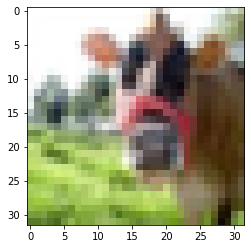

In [8]:
plt.imshow(np.transpose(all_data[0], (1, 2, 0)))

As I already said, that the 32x32 dimensions are problematic for us.

It's time to split the dataset into training and validation sets. Further, the shape of this dataset is quite inconvenient, so I need to reshape all of the arrays.

In [9]:
reshaped_data = np.zeros((50000, 32, 32, 3))

In [10]:
for i in range(50000):
    if i % 100 == 0: print(i, end=" ")
    for j in range(32):
        for k in range(32):
            for l in range(3):
                reshaped_data[i][j][k][l] = all_data[i][l][j][k]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

In [10]:
# Testing
reshaped_data[0][0]

array([[255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 252., 248.],
       [231., 222., 213.],
       [176., 168., 163.],
       [237., 236., 235.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [255., 255., 255.],
       [252., 255., 255.],
       [242., 252., 252.],
       [229., 240., 234.],
       [195., 205., 193.],
       [212., 224., 204.],
       [182., 194., 167.]])

#### Train-validation split

I need to understand how the dataset is organized in order to properly split the dataset so that all classes are represented. Reminder: 100x400 images in training, 100x100 images in validation.

In [11]:
dataset[b'coarse_labels'][:10]

[11, 15, 4, 14, 1, 5, 18, 3, 10, 11]

As can be seen, the dataset is pretty disorganized, so it is necessary to populate the train and validation sets carefully so that each class is represented 400 times in training, and 100 times in validation.

This is a program to create the proper sets.

In [11]:
classified_data = np.zeros((20, 2500, 32, 32, 3))
__sizes = [0] * 100
for i in range(50000):
    label = dataset[b'coarse_labels'][i]
    classified_data[label][__sizes[label]] = reshaped_data[i]
    __sizes[label] += 1
    
train_data = np.zeros((20, 2000, 32, 32, 3))
valid_data = np.zeros((20, 500, 32, 32, 3))
for i in range(20):
    for j in range(2500):
        if j < 2000: train_data[i][j] = classified_data[i][j]
        else: valid_data[i][j - 2000] = classified_data[i][j]

In [17]:
"""
1) aquatic animals (classes 1-10)
3) flowers (classes 11-15)
4) food containers (classes 16-20)
5) fruit and vegetables (classes 21-25)
6) household electrical devices (classes 26-30)
7) household furniture (classes 31-35)
8) insects (classes 36-40)
9) large carnivores (classes 41-45)
10) large man-made outdoor things (classes 46-50) NOT INCLUDED
11) large natural outdoor scenes (classes 51-55) NOT INCLUDED
12) large omnivores and herbivores (classes 56-60)
13) small to medium sized mammals (classes 61-65, 81-85)
14) non-insect invertebrates (classes 66-70)
15) people (classes 71-75)
16) reptiles (classes 76-80)
17) trees (classes 86-90)
18) vehicles (classes 91-100)
"""
None

Above, you can see that I have made some choices about which classes to keep and I have also merged some classes together. These are based on considerations related to the feasibility of distinguishing between similar classes (e.g. small vs. medium sized mammals). I'm not sure whether large carnivores should me merged with large omnivores/herbivores but I have decided to leave them separate.

In [18]:
df = pd.DataFrame(columns=[*range(3073)])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072


In [19]:
df = pd.DataFrame(columns=[*range(3073)], index=[*range(45000)])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
ranges = [[0, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [11, 11], [12 ,12, 16, 16], [13, 13], [14, 14], [15, 15],
          [17, 17], [18, 19]]

In [13]:
assignments = [-1] * 20
i = 0
for r in ranges:
    if len(r) == 4:
        for k in [12, 16]:
            assignments[k] = i
    else:
        for k in range(r[0], r[1] + 1):
            assignments[k] = i
    i += 1

In [14]:
'''y = 0
for i in range(100):
    print(i)
    for j in range(400):
        x = 0
        for k in range(32):
            for l in range(32):
                for m in range(3):
                    df[x][y] = train_data[i][j][k][l][m]
                    x += 1
        df[3072][y] = assignments[i]
        y += 1'''
lengths = [2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500, 2500]
classified_data_2 = np.zeros((37500, 1, 32, 32, 3), dtype=np.uint8)
y_data = np.zeros((37500))
ptrs = []
train_ptr = 0
valid_ptr = 30000

for i in range(20):
    print(i, end=" ")
    if assignments[i] == -1: continue
    length = len(classified_data[i]) // 2 if i in [0, 1, 12, 16, 18, 19] else len(classified_data[i])
    for j in range(length):
        if j >= length * 4 // 5:
            for k in range(32):
                for l in range(32):
                    for m in range(3):
                        classified_data_2[valid_ptr][0][k][l][m] = classified_data[i][j][k][l][m]
            y_data[valid_ptr] = assignments[i]
            valid_ptr += 1
        else:
            for k in range(32):
                for l in range(32):
                    for m in range(3):
                        classified_data_2[train_ptr][0][k][l][m] = classified_data[i][j][k][l][m]
            y_data[train_ptr] = assignments[i]
            train_ptr += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

In [23]:
s = 0
for i in range(15):
    print(i, end=" ")
    for j in range(lengths[i]):
        x = 0
        for k in range(32):
            for l in range(32):
                for m in range(3):
                    reshaped_tr[s + j if j < lengths[i] * 4 // 5 else 36000 + s // 4 + (j - lengths[i] * 4 // 5)][x] = classified_data_2[i][j][k][l][m]
                    x += 1
        reshaped_tr[s + j if j < lengths[i] * 4 // 5 else 36000 + s // 4 + (j - lengths[i] * 4 // 5)][3072] = i
    s += lengths[i] * 4 // 5

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

In [24]:
df = pd.DataFrame(reshaped_tr)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3063,3064,3065,3066,3067,3068,3069,3070,3071,3072
0,236.0,238.0,235.0,213.0,215.0,212.0,180.0,182.0,179.0,159.0,...,175.0,174.0,163.0,184.0,184.0,171.0,215.0,216.0,199.0,0.0
1,72.0,112.0,208.0,71.0,110.0,205.0,70.0,110.0,205.0,71.0,...,197.0,198.0,200.0,206.0,208.0,205.0,176.0,180.0,190.0,0.0
2,185.0,200.0,241.0,185.0,200.0,238.0,188.0,204.0,238.0,192.0,...,51.0,60.0,89.0,45.0,56.0,77.0,35.0,46.0,66.0,0.0
3,151.0,144.0,86.0,145.0,138.0,80.0,141.0,134.0,76.0,150.0,...,135.0,117.0,71.0,115.0,99.0,55.0,118.0,102.0,63.0,0.0
4,236.0,221.0,200.0,230.0,215.0,194.0,240.0,224.0,203.0,248.0,...,76.0,87.0,91.0,83.0,94.0,100.0,88.0,98.0,107.0,0.0


<AxesSubplot:>

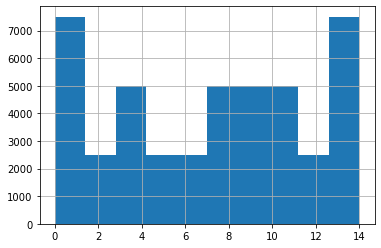

In [25]:
# Time for some exploratory data analysis (EDA).
df[3072].hist()

Some classes contain more images than others, so that is something to watch out for.

In [26]:
'''# Plotting images from each class
indices = [0, 5000, 6500, 9800, 11000, 13500, 15000, 17000, 19980, 20198, 22000, 24890, 26500, 30500, 34000]
distinct = set()
for i in indices:
    distinct.add(df[3072][i])
assert len(distinct) == len(indices)''';

In [27]:
for i in indices[1:2]:
    row = df.drop(3072, axis=1)[i:i+1]
    print(df[i:i+1][3072])
    new_np_array = np.zeros((32, 32, 3), dtype=np.uint8)
    for a in range(32):
        for b in range(32):
            for c in range(3):
                new_np_array[a][b][c] = row[96 * a + 3 * b + c]
    plt.imshow(new_np_array)

NameError: name 'indices' is not defined

I aim to construct a full convolutional neural network architecture and then tune it based on the results.

Reminder: the classes are:

1) aquatic animals (classes 1-10)
3) flowers (classes 11-15)
4) food containers (classes 16-20)
5) fruit and vegetables (classes 21-25)
6) household electrical devices (classes 26-30)
7) household furniture (classes 31-35)
8) insects (classes 36-40)
9) large carnivores (classes 41-45)
10) large man-made outdoor things (classes 46-50) NOT INCLUDED
11) large natural outdoor scenes (classes 51-55) NOT INCLUDED
12) large omnivores and herbivores (classes 56-60)
13) small to medium sized mammals (classes 61-65, 81-85)
14) non-insect invertebrates (classes 66-70)
15) people (classes 71-75)
16) reptiles (classes 76-80)
17) trees (classes 86-90)
18) vehicles (classes 91-100)

Source: https://www.researchgate.net/publication/365130408_Optimal_Design_of_Convolutional_Neural_Network_Architectures_Using_Teaching-Learning-Based_Optimization_for_Image_Classification
https://medium.com/analytics-vidhya/how-relu-works-f317a947bdc6

**Convolutional layer**

The convolutional layer's job is to detect low-level features in the image data. In our specific case, these low-level features are important because, for instance, they can help to distinguish between household furniture (which are characterized by straight lines and right angles) and reptiles (characterized by curves).

The features can be very subtle in some cases, e.g. reptiles vs. invertebrates, so I think I will use a small kernel (3x3). This is also done to ensure that training doesn't take too long. The stride will be 1x1 to ensure that I don't miss anything.

For the activation function, I will use the ReLU function. This is because I don't think that the vanishing gradient problem is particularly problematic for this task, since the types of predictions made are quite high-level anyway. Also, as a result it wouldn't take too long for the ReLU to cause the parameters to converge (comparatively).

After the conv layer there will be pooling. Max-pooling is what I intend to use (because that way only the most important features are kept). The dimensionality of the output will be 16x16 so a 2x2 kernel will be used.

It is common in CNNs to have multiple conv layers (with multiple pooling layers as well). For this reason (and for reasons related to the data that I have observed) I will add another convolutional layer. Reason being, only the "type of object" is being predicted, so there need not be too many features. It's better to lower the number of features to prevent overfitting.

So, another convolutional layer with a 3x3 kernel and 1x1 stride, and we activate with the *logistic function* this time. This is to prevent there being too much dichotomy and there is the possibility for features to be "half detected". Another max-pooling afterwards.

Now come the fully connected layers. There will be three fully connected layers in the neural network.

- 768 nodes in the first (because there are 16x16x3 inputs)
- 64 nodes in the second
- 15 nodes in the third (output layer)

In [201]:
from tensorflow.keras import layers, models
initial_cnn = models.Sequential()
# https://www.tensorflow.org/api_docs/python/tf/keras/layers

In [202]:
initial_cnn.add(layers.InputLayer(input_shape=(1, 3, 32, 32)))
initial_cnn.add(layers.Conv3D(activation='relu', kernel_size=3, filters=3, strides=1, padding='same'))
initial_cnn.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
initial_cnn.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=3, strides=1, padding='same'))
initial_cnn.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
initial_cnn.add(layers.Flatten())
initial_cnn.add(layers.Dense(units=64, input_dim=192, activation='relu'))
initial_cnn.add(layers.Dense(units=16, input_dim=64, activation='softmax'))
initial_cnn.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

In [203]:
initial_cnn.compile('sgd', 'sparse_categorical_crossentropy', ['acc'])

In [204]:
input_data = np.zeros((45000, 1, 3, 32, 32), dtype=np.uint8)
columns = []
for i in range(3072): columns.append(np.array(df[i]))
for i in range(45000):
    x = 0
    for k in range(32):
        for l in range(32):
            for m in range(3):
                input_data[i][0][m][k][l] = columns[x][i]
                x += 1
    if i % 100 == 0: print(i, end=" ")

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

In [205]:
def one_hot_encode(arr):
    res=np.zeros((45000, 15), dtype=np.uint8)
    for i in range(45000):
        res[i][int(arr[i])]=1
    return res
initial_cnn.fit(input_data, (np.array(df[3072])), batch_size=10, epochs=5, validation_split=0.2)

Train on 36000 samples, validate on 9000 samples
Epoch 1/5
 7970/36000 [=====>........................] - ETA: 51s - loss: 2.6828 - acc: 0.1148

KeyboardInterrupt: 

In [92]:
initial_cnn.predict(input_data[:1])

array([[0.19197462, 0.0158524 , 0.04322896, 0.01739957, 0.06896571,
        0.03920421, 0.02945076, 0.03653134, 0.05463577, 0.06335519,
        0.04358657, 0.03378925, 0.05564197, 0.10888346, 0.19750026]],
      dtype=float32)

In [98]:
import tensorflow as tf

In [101]:
import tensorflow.keras as keras

In [110]:
max(initial_cnn.history.history['val_acc'])

0.1843333350204759

Slight issue: the best performance is 18.4%

We need to improve the neural network, and one thing that needs to be improved is to add a learning rate (which needs to be tuned) and change the architecture as well.

In [116]:
# Run a grid search with powers of 2 (goes into negative exponents)
search_space = []
for i in range(-5, 6):
    search_space.append(2**i)

accs = []
for val in search_space:
    cur_cnn = models.Sequential()
    cur_cnn.add(layers.InputLayer(input_shape=(32, 32, 3)))
    cur_cnn.add(layers.Conv2D(activation='relu', kernel_size=3, filters=3, strides=1, padding='same'))
    cur_cnn.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
    cur_cnn.add(layers.Conv2D(activation='softmax', kernel_size=3, filters=3, strides=1, padding='same'))
    cur_cnn.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
    cur_cnn.add(layers.Flatten())
    cur_cnn.add(layers.Dense(units=64, input_dim=192, activation='relu'))
    cur_cnn.add(layers.Dense(units=16, input_dim=64, activation='softmax'))
    cur_cnn.add(layers.Dense(units=15, input_dim=16, activation='softmax'))
    opt = keras.optimizers.SGD(lr=val)
    cur_cnn.compile(opt, 'sparse_categorical_crossentropy', ['acc'])
    cur_cnn.fit(input_data, (np.array(df[3072])), batch_size=100, epochs=5, validation_split=0.2)
    accs.append(max(cur_cnn.history.history['val_acc']))
print(accs)

Train on 36000 samples, validate on 9000 samples
Epoch 1/5
36000/36000 [==============================] - 10s 279us/step - loss: 2.6805 - acc: 0.1077 - val_loss: 2.6638 - val_acc: 0.1137
Epoch 2/5
36000/36000 [==============================] - 10s 285us/step - loss: 2.6611 - acc: 0.1160 - val_loss: 2.6598 - val_acc: 0.1190
Epoch 3/5
36000/36000 [==============================] - 12s 322us/step - loss: 2.6594 - acc: 0.1158 - val_loss: 2.6591 - val_acc: 0.1130
Epoch 4/5
36000/36000 [==============================] - 10s 288us/step - loss: 2.6586 - acc: 0.1191 - val_loss: 2.6586 - val_acc: 0.1250
Epoch 5/5
36000/36000 [==============================] - 10s 265us/step - loss: 2.6581 - acc: 0.1259 - val_loss: 2.6581 - val_acc: 0.1274
Train on 36000 samples, validate on 9000 samples
Epoch 1/5
36000/36000 [==============================] - 10s 276us/step - loss: 2.6726 - acc: 0.1067 - val_loss: 2.6601 - val_acc: 0.1176
Epoch 2/5
36000/36000 [==============================] - 10s 264us/step - 

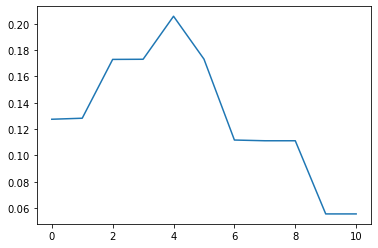

In [118]:
plt.plot(accs)

It can be seen that when mu (learning rate) is equal to 0.5, the model achieves the best accuracy. Notice how at higher learning rates, the model degrades to a dummy classifier (predicting the most frequent one), and at even higher learning rates it would appear that it bound itself to some infrequent category (for whatever reason). An accuracy of 0.21 is the best we have yet, which is still pretty bad but it can be improved through other means.

In [207]:
second_iteration = models.Sequential()

second_iteration.add(layers.InputLayer(input_shape=(1, 3, 32, 32)))
second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=3, strides=1, padding='same'))
second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=3, strides=1, padding='same'))
second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
second_iteration.add(layers.Flatten())
second_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.3) # following results from grid search, not necessarily best for this model

second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

second_iteration.fit(input_data, one_hot_encode(np.array(df[3072])), batch_size=100, epochs=20, validation_split=0.2)

Train on 36000 samples, validate on 9000 samples
Epoch 1/20
36000/36000 [==============================] - 19s 524us/step - loss: 2.6513 - acc: 0.1167 - val_loss: 2.6282 - val_acc: 0.1520
Epoch 2/20
36000/36000 [==============================] - 16s 434us/step - loss: 2.6254 - acc: 0.1377 - val_loss: 2.6264 - val_acc: 0.1386
Epoch 3/20
36000/36000 [==============================] - 17s 464us/step - loss: 2.6440 - acc: 0.1285 - val_loss: 2.6133 - val_acc: 0.1297
Epoch 4/20
36000/36000 [==============================] - 14s 402us/step - loss: 2.6013 - acc: 0.1480 - val_loss: 2.5909 - val_acc: 0.1440
Epoch 5/20
36000/36000 [==============================] - 15s 403us/step - loss: 2.6162 - acc: 0.1398 - val_loss: 2.6438 - val_acc: 0.1111
Epoch 6/20
20900/36000 [================>.............] - ETA: 5s - loss: 2.6337 - acc: 0.1356

KeyboardInterrupt: 

New best validation accuracy: 22.7%. It's a step in the right direction to replace "sparse_categorical_crossentropy" with "categorical_crossentropy" to ensure that the relative probabilities get taken into account, because objects can fall into "gray areas" and there are multiple different types that can look similar to each other. A goal is to get the model to predict the right "even higher-level" type of an object, and so this is better.

On a related note, I wonder whether there is a loss function that takes into account differing levels of similarity between "object types".

In [187]:
'''third_iteration = models.Sequential()

third_iteration.add(layers.InputLayer(input_shape=(32, 32, 3)))
third_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=3, strides=1, padding='same'))
third_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=3, strides=1, padding='same'))
third_iteration.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
third_iteration.add(layers.Flatten())
third_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
third_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.1) # following results from grid search, not necessarily best for this model

third_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

third_iteration.fit(input_data, one_hot_encode(np.array(df[3072])), batch_size=100, epochs=20, validation_split=0.2)'''
None

Quite frankly, no matter how I change the paramters, the accuracy is depressingly bad.

I have come to the conclusion that I have to examine the underlying architecture of the model and make changes according to the dataset. EDA is hard to do with this type of data, but I nevertheless found that:

- Images are taken in many different contexts, some are just object on a white background, some are taken in a room, or in a garden, etc.
- But the underlying features (lines, curves, bends) remain there.
- The objects are often translated and rotated.
- Contexts are not distinguished between different types of objects.
- Background is mostly just noise, but the key identifying features of the "type of object" are quite distinct and sharp.

We therefore need a convolutional step capable of detecting the rather sharp identifying features but not the noise. We need a sort of **dichotomy** in our feature extraction.

This could be achieved using, for instance, the sigmoid function. But this function is not suited for classification, so let's use softmax for activation in Conv2D.

In [194]:
'''third_iteration = models.Sequential()

third_iteration.add(layers.InputLayer(input_shape=(32, 32, 3)))
third_iteration.add(layers.Conv2D(activation='softmax', kernel_size=5, filters=3, strides=1, padding='same'))
third_iteration.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
third_iteration.add(layers.Flatten())
third_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
third_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

opt = keras.optimizers.SGD(lr=0.2) # following results from grid search, not necessarily best for this model

third_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

third_iteration.fit(input_data, one_hot_encode(np.array(df[3072])), batch_size=100, epochs=20, validation_split=0.2)''';

In [216]:
# EDA for "white spots"
cnt = []
for i in range(15):
    val = 0
    for j in range(lengths[i]):
        found = False
        for k in range(31):
            for l in range(31):
                if min(classified_data_2[i][j][k][l][0],classified_data_2[i][j][k][l][1],classified_data_2[i][j][k][l][2],\
                       classified_data_2[i][j][k+1][l][0],classified_data_2[i][j][k+1][l][1],classified_data_2[i][j][k+1][l][2],\
                      classified_data_2[i][j][k][l+1][0],classified_data_2[i][j][k][l+1][1],classified_data_2[i][j][k][l+1][2],\
                      classified_data_2[i][j][k+1][l+1][0],classified_data_2[i][j][k+1][l+1][1],classified_data_2[i][j][k+1][l+1][2])==255:
                    found = True
                    break
            if found: break
        if found: val += 1
        if j % 100 == 0: print(j, end=" ")
    cnt.append(val)
    print(i, end=" ")

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 0 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 1 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 3 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 4 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 5 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 6 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 16

In [219]:
cnt

[262, 73, 336, 394, 657, 456, 235, 55, 87, 133, 179, 191, 151, 164, 633]

It can be seen that each category has 50 or more images that contain a 2x2 white area. While this is not a perfect measure of whether or not the image has a white background, it is good enough for our purposes. If we took 50 per class we would have a dataset of 750 images which is far less than the 45000 we started with, but it's not nothing, and we could try fitting a CNN to it to see what would happen.

The reasoning is that CNN is picking up on far too much background noise (that's my hypothesis) so it would be nice to test it out.

In [222]:
good_data = np.zeros((825, 1, 3, 32, 32), dtype=np.uint8)
ptr = 0
for i in range(15):
    val = 0
    for j in range(lengths[i]):
        found = False
        for k in range(31):
            for l in range(31):
                if min(classified_data_2[i][j][k][l][0],classified_data_2[i][j][k][l][1],classified_data_2[i][j][k][l][2],\
                       classified_data_2[i][j][k+1][l][0],classified_data_2[i][j][k+1][l][1],classified_data_2[i][j][k+1][l][2],\
                      classified_data_2[i][j][k][l+1][0],classified_data_2[i][j][k][l+1][1],classified_data_2[i][j][k][l+1][2],\
                      classified_data_2[i][j][k+1][l+1][0],classified_data_2[i][j][k+1][l+1][1],classified_data_2[i][j][k+1][l+1][2])==255:
                    found = True
                    break
            if found: break
        if found:
            if val == 55: break
            val += 1
            for k in range(3):
                for l in range(32):
                    for m in range(32):
                        good_data[ptr][0][k][l][m] = classified_data_2[i][j][l][m][k]
            ptr += 1
        if j % 100 == 0: print(j, end=" ")
    print(i, end=" ")

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 0 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1 0 100 200 300 400 2 0 100 200 300 3 0 100 200 4 0 100 200 5 0 100 200 300 400 500 6 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 7 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 8 0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 9 0 100 200 300 400 500 600 700 800 10 0 100 200 300 400 500 600 700 11 0 100 200 300 400 500 600 700 800 900 1000 12 0 100 200 300 400 500 600 700 800 900 13 0 100 200 300 400 500 14 

In [268]:
white_tr = np.zeros((660, 1, 3, 32, 32), dtype=np.uint8)
white_valid = np.zeros((165, 1, 3, 32, 32), dtype=np.uint8)

ptr_tr = 0
ptr_valid = 0

for i in range(15):
    for j in range(55):
        if j >= 44:
            for k in range(3):
                for l in range(32):
                    for m in range(32):
                        white_valid[ptr_valid][0][k][l][m] = good_data[i * 55 + j][0][k][l][m]
            ptr_valid += 1
        else:
            for k in range(3):
                for l in range(32):
                    for m in range(32):
                        white_tr[ptr_tr][0][k][l][m] = good_data[i * 55 + j][0][k][l][m]
            ptr_tr += 1
    print(i, end=" ")
    
from random import shuffle
tr_shuffle = [*range(660)]
valid_shuffle = [*range(165)]
shuffle(tr_shuffle)
shuffle(valid_shuffle)

white_data = np.zeros((825, 1, 3, 32, 32), dtype=np.uint8)

for i in range(660):
    for k in range(3):
        for l in range(32):
            for m in range(32):
                white_data[tr_shuffle[i]][0][k][l][m] = white_tr[i][0][k][l][m]

for i in range(165):
    for k in range(3):
        for l in range(32):
            for m in range(32):
                white_data[valid_shuffle[i] + 660][0][k][l][m] = white_valid[i][0][k][l][m]

white_y = np.zeros(825, dtype=np.uint8)
for i in range(15):
    for j in range(44 * i, 44 * i + 44):
        white_y[tr_shuffle[j]] = i
    for j in range(660 + 11 * i, 660 + 11 * i + 11):
        white_y[valid_shuffle[j - 660] + 660] = i

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 

13

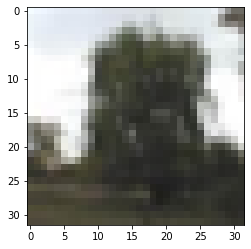

In [327]:
from random import randint
ind = randint(0, 660)
plt.imshow(np.transpose(white_data[ind][0], (1, 2, 0)))
white_y[ind]

In [442]:
transposed_white_data = np.zeros((825, 1, 32, 32, 3), dtype=np.uint8)

for i in range(825):
    for k in range(3):
        for l in range(32):
            for m in range(32):
                transposed_white_data[i][0][l][m][k] = 255 - white_data[i][0][k][l][m]
    if i % 100 == 0: print(i, end=" ")

0 100 200 300 400 500 600 700 800 

In [342]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 15), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

# Run a grid search with powers of 2 (goes into negative exponents)
search_space = []
for i in range(-5, 6):
    search_space.append(2**i)

accs = []
for val in search_space:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
    second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

    opt = keras.optimizers.SGD(lr=val)

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=10, validation_split=0.2)
    accs.append(max(second_iteration.history.history['val_acc']))
print(accs)

Train on 660 samples, validate on 165 samples
Epoch 1/10
660/660 [==============================] - 11s 17ms/step - loss: 2.7117 - acc: 0.0667 - val_loss: 2.7079 - val_acc: 0.0727
Epoch 2/10
660/660 [==============================] - 4s 6ms/step - loss: 2.7098 - acc: 0.0682 - val_loss: 2.7072 - val_acc: 0.0788
Epoch 3/10
660/660 [==============================] - 4s 6ms/step - loss: 2.7074 - acc: 0.0667 - val_loss: 2.7042 - val_acc: 0.0788
Epoch 4/10
660/660 [==============================] - 4s 7ms/step - loss: 2.7054 - acc: 0.0879 - val_loss: 2.7016 - val_acc: 0.0727
Epoch 5/10
660/660 [==============================] - 4s 6ms/step - loss: 2.7023 - acc: 0.0818 - val_loss: 2.6989 - val_acc: 0.0848
Epoch 6/10
660/660 [==============================] - 4s 6ms/step - loss: 2.6990 - acc: 0.0818 - val_loss: 2.6956 - val_acc: 0.0970
Epoch 7/10
660/660 [==============================] - 4s 7ms/step - loss: 2.6957 - acc: 0.0727 - val_loss: 2.6919 - val_acc: 0.0788
Epoch 8/10
660/660 [========

KeyboardInterrupt: 

In [458]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=16, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
    second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

    opt = keras.optimizers.SGD(lr=0.125)

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=10, validation_split=0.2, shuffle=False)

Train on 660 samples, validate on 165 samples
Epoch 1/10
660/660 [==============================] - 12s 19ms/step - loss: 2.7150 - acc: 0.0606 - val_loss: 2.7061 - val_acc: 0.0909
Epoch 2/10
660/660 [==============================] - 4s 6ms/step - loss: 2.7121 - acc: 0.0667 - val_loss: 2.7014 - val_acc: 0.0788
Epoch 3/10
660/660 [==============================] - 4s 5ms/step - loss: 2.7031 - acc: 0.0621 - val_loss: 2.6918 - val_acc: 0.1333
Epoch 4/10
660/660 [==============================] - 4s 5ms/step - loss: 2.6893 - acc: 0.0848 - val_loss: 2.6931 - val_acc: 0.1212
Epoch 5/10
660/660 [==============================] - 4s 5ms/step - loss: 2.6768 - acc: 0.0864 - val_loss: 2.6762 - val_acc: 0.1091
Epoch 6/10
660/660 [==============================] - 4s 6ms/step - loss: 2.6460 - acc: 0.1591 - val_loss: 2.6624 - val_acc: 0.1636
Epoch 7/10
660/660 [==============================] - 4s 6ms/step - loss: 2.6116 - acc: 0.1773 - val_loss: 2.6303 - val_acc: 0.1455
Epoch 8/10
660/660 [========

I will recollect my thoughts here.

I was able to make some progress with training a CNN on white-background-only images. My reasoning was that the background noise would not be detected, so a simple ReLU could eliminate all the background, and then the model could focus more on extracting actual features.

But its best training accuracy is only 22.8%, which is still very low. It might be useful to look at what the CNN is thinking (visualize a feature map).

In [449]:
from tensorflow.keras import Model
testing_features = Model(inputs=second_iteration.inputs, outputs=second_iteration.layers[1].output)

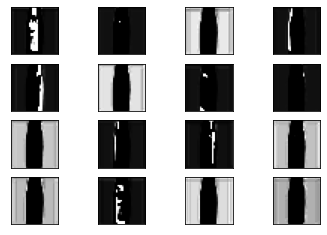

In [451]:
feature_maps = testing_features.predict(transposed_white_data[299:300])

ix = 1
for i in range(4):
    for j in range(4):
        # specify subplot and turn of axis
        ax = plt.subplot(4, 4, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(np.transpose(feature_maps[0][0], (2, 0, 1))[ix-1], cmap='gray')
        ix += 1
# show the figure
plt.show()

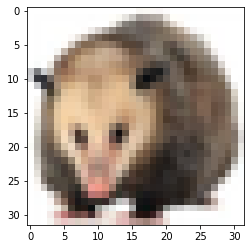

In [454]:
plt.imshow(np.transpose(white_data[306][0], (1, 2, 0)))

In [455]:
second_iteration.predict(transposed_white_data[306:307])

array([[0.06627624, 0.06007253, 0.05357749, 0.07312821, 0.06471668,
        0.06457517, 0.06810883, 0.08241225, 0.0668057 , 0.06880648,
        0.05880767, 0.06240244, 0.06656296, 0.06455852, 0.07918887]],
      dtype=float32)

I've noticed that a lot of the time the model fails to get past some distinct boundary (something like 20%) so I wonder if it is converging towards a local, but not global, minimum. The categorical cross entropy loss function is based on logarithms of the probabilities, so it penalizes the model for getting the right answer but not being confident about it. Nevertheless, the penalty is even more harsh when we apply a softmax transformation to the output vector before categorical cross-entropy. In my view, this should force the model to learn more because often, it is completely indecisive, as seen just above.

Overall, the loss function that I used seems rather unsatisfactory and doesn't seem to have forced the model into learning as much. Let's define our own loss. It is based on the "softmax loss" that comes from one of the sources I cited in my process journal.

In [467]:
import tensorflow.keras.losses as losses
import tensorflow.keras.activations as activations

In [492]:
def softmax_crossentropy(y_true, y_pred):
    return losses.categorical_crossentropy(y_true, activations.softmax(y_pred))

In [504]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=16, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
    second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=20, validation_split=0.2, shuffle=False)

Train on 660 samples, validate on 165 samples
Epoch 1/20
660/660 [==============================] - 12s 19ms/step - loss: 2.7116 - acc: 0.0682 - val_loss: 2.6937 - val_acc: 0.1152
Epoch 2/20
660/660 [==============================] - 3s 5ms/step - loss: 2.6769 - acc: 0.1106 - val_loss: 2.7051 - val_acc: 0.0909
Epoch 3/20
660/660 [==============================] - 4s 6ms/step - loss: 2.6732 - acc: 0.1242 - val_loss: 2.6595 - val_acc: 0.1212
Epoch 4/20
660/660 [==============================] - 4s 5ms/step - loss: 2.6170 - acc: 0.1955 - val_loss: 2.6400 - val_acc: 0.1636
Epoch 5/20
660/660 [==============================] - 4s 5ms/step - loss: 2.5862 - acc: 0.2227 - val_loss: 2.6366 - val_acc: 0.1273
Epoch 6/20
660/660 [==============================] - 3s 5ms/step - loss: 2.5562 - acc: 0.2288 - val_loss: 2.6113 - val_acc: 0.1697
Epoch 7/20
660/660 [==============================] - 4s 5ms/step - loss: 2.5083 - acc: 0.3015 - val_loss: 2.5843 - val_acc: 0.2485
Epoch 8/20
660/660 [========

As it would turn out, the solution to our problem is surprisingly simple: use the Adam optimizer!

The difference between SGD and Adam is that Adam dynamically computes learning rates as the training goes on. I decided to give it a go just after reading about it, because of my suspicion about what was happening with SGD, on account of the fact that setting an individual learning rate for various different levels of feature specificity (at a high-level, rigid lines probably means furniture/electronics, whereas lots of spikes could mean quite a few things) probably wouldn't work. And suddenly, after 20 epochs a 53% accuracy on the training set was achieved!

But for some reason its validation accuracy is 25%. Overfitting ever?

In [506]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=16, input_dim=768, activation='softmax'))
    second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=50, validation_split=0.2, shuffle=False)

Train on 660 samples, validate on 165 samples
Epoch 1/50
660/660 [==============================] - 17s 26ms/step - loss: 2.7130 - acc: 0.0848 - val_loss: 2.6932 - val_acc: 0.1152
Epoch 2/50
660/660 [==============================] - 5s 7ms/step - loss: 2.6837 - acc: 0.1242 - val_loss: 2.6700 - val_acc: 0.1333
Epoch 3/50
660/660 [==============================] - 3s 4ms/step - loss: 2.6497 - acc: 0.1197 - val_loss: 2.6439 - val_acc: 0.1091
Epoch 4/50
660/660 [==============================] - 3s 4ms/step - loss: 2.6101 - acc: 0.1636 - val_loss: 2.6248 - val_acc: 0.1818
Epoch 5/50
660/660 [==============================] - 2s 4ms/step - loss: 2.5716 - acc: 0.2227 - val_loss: 2.6084 - val_acc: 0.2061
Epoch 6/50
660/660 [==============================] - 3s 4ms/step - loss: 2.5438 - acc: 0.2652 - val_loss: 2.5859 - val_acc: 0.2303
Epoch 7/50
660/660 [==============================] - 3s 4ms/step - loss: 2.5063 - acc: 0.2909 - val_loss: 2.5766 - val_acc: 0.2303
Epoch 8/50
660/660 [========

The model is overfitting.

We can see that the validation accuracy is consistently hovering in the low 20s, while the training accuracy is increasing almost to 50%. I wonder why this is. Potentially, the extra dense layer.

In [526]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=768, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=50, validation_split=0.2, shuffle=False)

Train on 660 samples, validate on 165 samples
Epoch 1/50
660/660 [==============================] - 9s 13ms/step - loss: 2.6689 - acc: 0.1394 - val_loss: 2.4248 - val_acc: 0.2364
Epoch 2/50
660/660 [==============================] - 2s 4ms/step - loss: 2.2359 - acc: 0.2939 - val_loss: 2.3608 - val_acc: 0.2667
Epoch 3/50
660/660 [==============================] - 2s 4ms/step - loss: 2.0112 - acc: 0.3848 - val_loss: 2.3277 - val_acc: 0.2727
Epoch 4/50
660/660 [==============================] - 2s 4ms/step - loss: 1.8258 - acc: 0.4636 - val_loss: 2.3499 - val_acc: 0.2667
Epoch 5/50
660/660 [==============================] - 3s 4ms/step - loss: 1.5919 - acc: 0.5576 - val_loss: 2.3075 - val_acc: 0.2848
Epoch 6/50
660/660 [==============================] - 3s 4ms/step - loss: 1.3799 - acc: 0.6470 - val_loss: 2.2804 - val_acc: 0.3030
Epoch 7/50
660/660 [==============================] - 2s 4ms/step - loss: 1.2080 - acc: 0.7152 - val_loss: 2.2780 - val_acc: 0.3152
Epoch 8/50
660/660 [=========

KeyboardInterrupt: 

This problem is even more serious than I thought... it was able to achieve a 100% accuracy on the training set but only 30% on validation...

I think the main problem is that there are way too many learnable weights in the dense layer. Some downsampling is needed.

In [528]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=50, validation_split=0.2, shuffle=False)

Train on 660 samples, validate on 165 samples
Epoch 1/50
660/660 [==============================] - 9s 14ms/step - loss: 2.7445 - acc: 0.0500 - val_loss: 2.7121 - val_acc: 0.0667
Epoch 2/50
660/660 [==============================] - 3s 4ms/step - loss: 2.7324 - acc: 0.0455 - val_loss: 2.7032 - val_acc: 0.0667
Epoch 3/50
660/660 [==============================] - 3s 5ms/step - loss: 2.7165 - acc: 0.0561 - val_loss: 2.6807 - val_acc: 0.1212
Epoch 4/50
660/660 [==============================] - 3s 5ms/step - loss: 2.6852 - acc: 0.0833 - val_loss: 2.6606 - val_acc: 0.1030
Epoch 5/50
660/660 [==============================] - 3s 5ms/step - loss: 2.6207 - acc: 0.1152 - val_loss: 2.5700 - val_acc: 0.1636
Epoch 6/50
660/660 [==============================] - 3s 4ms/step - loss: 2.5406 - acc: 0.1712 - val_loss: 2.4960 - val_acc: 0.1818
Epoch 7/50
660/660 [==============================] - 3s 4ms/step - loss: 2.4577 - acc: 0.2000 - val_loss: 2.4385 - val_acc: 0.2121
Epoch 8/50
660/660 [=========

It's a step in the right direction. But it's still pretty serious overfitting. I'm not really sure why it's doing that, especially given that I shuffled the training and validation data.

Let's try adding a small dense layer before the first one.

In [537]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=10, epochs=50, validation_split=0.2, shuffle=False)

Train on 660 samples, validate on 165 samples
Epoch 1/50
660/660 [==============================] - 10s 15ms/step - loss: 2.7467 - acc: 0.0470 - val_loss: 2.7195 - val_acc: 0.0727
Epoch 2/50
660/660 [==============================] - 3s 4ms/step - loss: 2.7364 - acc: 0.0394 - val_loss: 2.7104 - val_acc: 0.0606
Epoch 3/50
660/660 [==============================] - 3s 4ms/step - loss: 2.7257 - acc: 0.0530 - val_loss: 2.6993 - val_acc: 0.0667
Epoch 4/50
660/660 [==============================] - 3s 5ms/step - loss: 2.7136 - acc: 0.0712 - val_loss: 2.6913 - val_acc: 0.0727
Epoch 5/50
660/660 [==============================] - 3s 5ms/step - loss: 2.6729 - acc: 0.1076 - val_loss: 2.6319 - val_acc: 0.1394
Epoch 6/50
660/660 [==============================] - 3s 4ms/step - loss: 2.5898 - acc: 0.1591 - val_loss: 2.5354 - val_acc: 0.1879
Epoch 7/50
660/660 [==============================] - 3s 4ms/step - loss: 2.4721 - acc: 0.2167 - val_loss: 2.4406 - val_acc: 0.2182
Epoch 8/50
660/660 [========

It looks like a step in the right direction. The addition of a small dense layer before the output layer has reduced the number of learnable parameters, which tends to lead to a reduction in overfitting as well. But now it's failing to *fit* altogether.

It is worth thinking about the fully-connected-layer architecture at this point. The ReLU + softmax + max-pool + softmax + max-pool architecture of the convolutional/pooling part appears to have succeeded, with relatively minimal parameters. But the dense layers also form a crucial part of the CNN architecture.

In [558]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=10, epochs=50, validation_split=0.2)

Train on 30000 samples, validate on 7500 samples
Epoch 1/50
30000/30000 [==============================] - 154s 5ms/step - loss: 2.5256 - acc: 0.1672 - val_loss: 2.3508 - val_acc: 0.2384
Epoch 2/50
30000/30000 [==============================] - 142s 5ms/step - loss: 2.2412 - acc: 0.2753 - val_loss: 2.1693 - val_acc: 0.3096
Epoch 3/50
30000/30000 [==============================] - 141s 5ms/step - loss: 2.1529 - acc: 0.3078 - val_loss: 2.1442 - val_acc: 0.3124
Epoch 4/50
30000/30000 [==============================] - 141s 5ms/step - loss: 2.1169 - acc: 0.3196 - val_loss: 2.1186 - val_acc: 0.3204
Epoch 5/50
30000/30000 [==============================] - 141s 5ms/step - loss: 2.0830 - acc: 0.3313 - val_loss: 2.0968 - val_acc: 0.3228
Epoch 6/50
30000/30000 [==============================] - 139s 5ms/step - loss: 2.0678 - acc: 0.3336 - val_loss: 2.0761 - val_acc: 0.3339
Epoch 7/50
30000/30000 [==============================] - 139s 5ms/step - loss: 2.0524 - acc: 0.3386 - val_loss: 2.0766 - v

I have redefined the "large" dataset of 45000 samples to achieve class balance. With class *imbalance* I trained on the most recent setup and achieved 20%. With class balance I achieved 38% accuracy. This is a much better result suggesting that the reason behind most of our previous struggles was probably class imbalance. But it's still not great because it looks like the neural network is struggling to get past 38% accuracy-wise, although surprisingly enough this accuracy is mirrored in the validation set and it's already higher than anything we've had with the white images.

It's probably a signal that the low number of images in the white dataset have made it easier for the neural network to more completely memorize the training set, which is obviously not feasible with 30000 samples. But notice also that the neural network appears to have converged to a local minimum with the large dataset which might mean it's struggling to get rid of the background noise. Therefore I will stay with the white dataset for a bit longer.

Regarding the overfitting I am considering tuning the batch size as a hyperparameter. Perhaps the low batch size made it easier for the network to overfit.

In [576]:
search_space = [2, 4, 8, 16, 32, 64, 128][::-1]
for s in search_space:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=s, epochs=35, validation_split=0.2, shuffle=False, verbose=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    print(f'Batch size {s}:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Batch size 128:
26.5% (train) vs. 24.200000000000003% (validation)
Batch size 64:
39.900000000000006% (train) vs. 29.6% (validation)
Batch size 32:
42.5% (train) vs. 32.1% (validation)
Batch size 16:
54.6% (train) vs. 25.400000000000002% (validation)
Batch size 8:
64.5% (train) vs. 33.9% (validation)
Batch size 4:
70.10000000000001% (train) vs. 30.900000000000002% (validation)
Batch size 2:
71.5% (train) vs. 26.6% (validation)


There are drastic amounts of overfitting going on with batch sizes of less than or equal to 16. It looks like a batch size of 32 achieves the least amount of overfitting while actually fitting to the training set, and this is what many sources will state. But it's nice to see it in practice.

In [577]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False, verbose=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Batch size 32:
58.0% (train) vs. 34.5% (validation)


In [583]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False, verbose=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Batch size 32:
54.800000000000004% (train) vs. 32.7% (validation)


Date: 20 November

I have just realized that potentially it is the high number of epochs that is causing the overfitting. 50 cycles of the training set is way too many and it is enough to allow the model to memorize the training set. Trying with only 25 epochs instead, but with the same setup.

In [585]:
if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same'))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=15, input_dim=192, activation='softmax'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=25, validation_split=0.2, shuffle=False, verbose=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Batch size 32:
42.2% (train) vs. 30.3% (validation)


Less overfitting this time. So now the main task is to improve the accuracy, and this can be done by reworking the architecture of the neural network.

The convolutional + max-pooling part already consists of multiple layers. But now it's the dense part that should be improved. The dense layers, particularly the hidden layers, play an important role in using the features extracted by the convolutional layers to make deductions. One layer is probably not good enough. Therefore I will place another layer before it. It is important that this layer not have too few or too many neurons, 20 seems like a good number.

https://keras.io/api/layers/initializers/

In [596]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=25, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 660 samples, validate on 165 samples
Epoch 1/25
660/660 [==============================] - 17s 25ms/step - loss: 2.7090 - acc: 0.0515 - val_loss: 2.7081 - val_acc: 0.0667
Epoch 2/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7084 - acc: 0.0606 - val_loss: 2.7080 - val_acc: 0.0667
Epoch 3/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7083 - acc: 0.0530 - val_loss: 2.7078 - val_acc: 0.0727
Epoch 4/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7077 - acc: 0.0667 - val_loss: 2.7072 - val_acc: 0.0667
Epoch 5/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7057 - acc: 0.0636 - val_loss: 2.7052 - val_acc: 0.0727
Epoch 6/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7007 - acc: 0.0970 - val_loss: 2.6971 - val_acc: 0.1273
Epoch 7/25
660/660 [==============================] - 2s 3ms/step - loss: 2.6888 - acc: 0.1136 - val_loss: 2.6853 - val_acc: 0.1091
Epoch 8/25
660/660 [========

It got a lot worse.

Quick update: I added initializers and biases to every layer. After this change, when I use 1 dense layer it gets 40% train vs. 30% validation - on par with before.

Adding an additional dense layer brings it down to 13% vs. 13% which is horrendous. Perhaps I should be using ReLU in the first dense layer.

In [597]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='softmax', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=25, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 660 samples, validate on 165 samples
Epoch 1/25
660/660 [==============================] - 16s 24ms/step - loss: 2.7104 - acc: 0.0621 - val_loss: 2.7081 - val_acc: 0.0667
Epoch 2/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7087 - acc: 0.0545 - val_loss: 2.7081 - val_acc: 0.0667
Epoch 3/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7084 - acc: 0.0667 - val_loss: 2.7077 - val_acc: 0.1091
Epoch 4/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7080 - acc: 0.0727 - val_loss: 2.7075 - val_acc: 0.0788
Epoch 5/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7068 - acc: 0.0955 - val_loss: 2.7055 - val_acc: 0.1030
Epoch 6/25
660/660 [==============================] - 2s 3ms/step - loss: 2.7037 - acc: 0.0970 - val_loss: 2.7004 - val_acc: 0.1212
Epoch 7/25
660/660 [==============================] - 2s 3ms/step - loss: 2.6915 - acc: 0.1030 - val_loss: 2.6801 - val_acc: 0.1030
Epoch 8/25
660/660 [========

Improvement.

(I turned on "verbose" so I could see the progressive learning better.)

The accuracy climbs to 26% vs. 24% with this neural network. Apologies for the lack of visual communication.

It's probably for similar reasons to using ReLU in the first convolution.

What if we try similar things with the dense layers to what we did for the convolution/max-pooling? Namely, a hidden layer with softmax, with something like ~35 neurons?

In [621]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=48, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=25, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 660 samples, validate on 165 samples
Epoch 1/25
660/660 [==============================] - 29s 44ms/step - loss: 2.7086 - acc: 0.0803 - val_loss: 2.7012 - val_acc: 0.0727
Epoch 2/25
660/660 [==============================] - 3s 4ms/step - loss: 2.6896 - acc: 0.0924 - val_loss: 2.6701 - val_acc: 0.0909
Epoch 3/25
660/660 [==============================] - 3s 4ms/step - loss: 2.6032 - acc: 0.1091 - val_loss: 2.5758 - val_acc: 0.1273
Epoch 4/25
660/660 [==============================] - 3s 4ms/step - loss: 2.4927 - acc: 0.1667 - val_loss: 2.5201 - val_acc: 0.1939
Epoch 5/25
660/660 [==============================] - 3s 4ms/step - loss: 2.3998 - acc: 0.2379 - val_loss: 2.4871 - val_acc: 0.1879
Epoch 6/25
660/660 [==============================] - 3s 4ms/step - loss: 2.3114 - acc: 0.2606 - val_loss: 2.4482 - val_acc: 0.2364
Epoch 7/25
660/660 [==============================] - 3s 4ms/step - loss: 2.2420 - acc: 0.2985 - val_loss: 2.4256 - val_acc: 0.2545
Epoch 8/25
660/660 [========

KeyboardInterrupt: 

So, I had a misconception. I forgot that softmax normalizes outputs to form a probability distribution. But then I realized that it amplifies higher values even further, so it might amplify parts that are actually in the image and not those outside.

Regardless of the fact that I added an extra conv+maxpool to reduce the size of the input to the fully connected part to be 48 instead of 192, overfitting (and also a lack of learning) still occurs which puzzles me.

I wonder whether there are other activation functions that don't normalize to this range [0, 1]. Found nothing, so I changed all activation functions to ReLU except for the last layer.

It still overfits for whatever reason.

In [625]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=5, input_dim=48, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=5, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=32, epochs=25, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(classified_data_2[:30000], one_hot_encode(y_data[:30000]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(classified_data_2[30000:], one_hot_encode(y_data[30000:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 30000 samples, validate on 7500 samples
Epoch 1/25
30000/30000 [==============================] - 150s 5ms/step - loss: 2.5153 - acc: 0.1559 - val_loss: 2.3702 - val_acc: 0.2068
Epoch 2/25
30000/30000 [==============================] - 124s 4ms/step - loss: 2.3563 - acc: 0.2209 - val_loss: 2.3234 - val_acc: 0.2328
Epoch 3/25
30000/30000 [==============================] - 119s 4ms/step - loss: 2.2968 - acc: 0.2423 - val_loss: 2.2823 - val_acc: 0.2557
Epoch 4/25
30000/30000 [==============================] - 120s 4ms/step - loss: 2.2561 - acc: 0.2545 - val_loss: 2.2481 - val_acc: 0.2660
Epoch 5/25
30000/30000 [==============================] - 120s 4ms/step - loss: 2.2282 - acc: 0.2658 - val_loss: 2.2241 - val_acc: 0.2772
Epoch 6/25
30000/30000 [==============================] - 118s 4ms/step - loss: 2.2007 - acc: 0.2754 - val_loss: 2.1960 - val_acc: 0.2801
Epoch 7/25
30000/30000 [==============================] - 118s 4ms/step - loss: 2.1896 - acc: 0.2787 - val_loss: 2.1796 - v

My preconceptions were challenged (yet again!) when I discovered that the low dataset, which I thought could improve the model's performance, could actually be the cause of overfitting. In this case decreasing learnable parameters may have helped to a certain extent, but ultimately the low dataset better (?) enables the model to memorize the training set. Also, as it turns out the softmax function outside the last layer (where I really chose it because it was necessary) suffers from a "vanishing gradient" problem. Because Adam optimizer is an adaptation of the stochastic gradient descent optimization method, this could possibly be why the model failed to learn the large set.

The training of my new model on the large dataset has just concluded. It again appears to have stagnated, even lower than last time. I will stick with this large dataset in spite of my considerations about background noise, because ReLU should be able to account for that. More on this issue down below.

Overfitting has most definitely subsided in its effect. We can see that validation accuracy very closely mirrors training accuracy. So the problem can be reduced to simply *fitting* the model to the training set.

Let's do a bit of EDA to investigate the "background noise" issue.

0.0


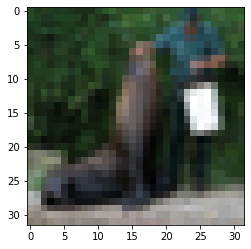

In [631]:
plt.imshow(classified_data_2[858][0]) # random index
print(y_data[858])

1.0


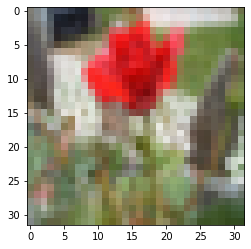

In [632]:
plt.imshow(classified_data_2[2839][0]) # random index
print(y_data[2839])

1.0


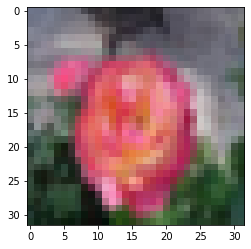

In [643]:
plt.imshow(classified_data_2[3857][0]) # random index
print(y_data[3857])

Thoughts:

We can see that there is a strict "dichotomy" between background and object. This was very obvious and intuitive in the case of the small dataset, but it also applies here, albeit in a more subtle manner. A good ReLU activation should be able to capture this dichotomy well enough for us to be able to use the large dataset. Here I think it applies. Training might take a lot longer which is why I should really think through each change I make to the architecture henceforth.

The amount of blur in the background is also quite a lot higher than in the object itself (although of course there is also some blur inside the object as well). The image inside the object appears to be "sharper" than it is on the outside. This is a subjective measure to a human, but we can make the machine learning model "learn" what a blur is. It might just require us to enlarge the kernels of some of the convolutional layers slightly. I do think a ReLU is called for, though. First layer kernel will be enlarged to 5x5 (odd size is still necessary for symmetry purposes)

In [645]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=(5, 5, 3), filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=5, input_dim=48, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=5, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=32, epochs=25, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(classified_data_2[:30000], one_hot_encode(y_data[:30000]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(classified_data_2[30000:], one_hot_encode(y_data[30000:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 30000 samples, validate on 7500 samples
Epoch 1/25
30000/30000 [==============================] - 168s 6ms/step - loss: 2.5727 - acc: 0.1316 - val_loss: 2.4693 - val_acc: 0.1703
Epoch 2/25
30000/30000 [==============================] - 141s 5ms/step - loss: 2.4262 - acc: 0.1898 - val_loss: 2.3720 - val_acc: 0.2151
Epoch 3/25
30000/30000 [==============================] - 142s 5ms/step - loss: 2.3627 - acc: 0.2183 - val_loss: 2.3315 - val_acc: 0.2404
Epoch 4/25
30000/30000 [==============================] - 141s 5ms/step - loss: 2.3134 - acc: 0.2365 - val_loss: 2.2774 - val_acc: 0.2435
Epoch 5/25
30000/30000 [==============================] - 138s 5ms/step - loss: 2.2845 - acc: 0.2428 - val_loss: 2.2926 - val_acc: 0.2372
Epoch 6/25
 4064/30000 [===>..........................] - ETA: 1:53 - loss: 2.2552 - acc: 0.2589

KeyboardInterrupt: 

Overfitting should not occur because the dataset is quite large (and 27 learnable parameters vs. 75 learnable parameters) within the first convolutional layer is not much of a change especially when considering the 5x48+15x5=315 learnable parameters in the fully connected layers.

I keyboard-interrupted the training process after only five epochs because it didn't seem to be making much progress. If anything its accuracy is slightly lower than when I set the kernel size to 3x3x3 rather than 5x5x3. It might be that it's taking longer to converge because there are more parameters involved.

But I think its low accuracy for all this time is simply because the convolutional architecture is limited and not enough to properly extract features. It *is* possible to remove the background noise and learn stuff about the object itself; we just need more layers.

Come to think of it, increasing the kernel size shouldn't have much of an effect and just increases the training time pointlessly. Instead I should probably add more convolutional layers that use the ReLU activation. Trustworthy sources from Towards Data Science state that the ReLU allows a neural network to create "folds" around the training set. This sounds like overfitting but done in moderation it (hopefully) shouldn't be a problem.

It could be that the three max-pools are too many and remove crucial parts of the image. I will reduce max-pools to two but put the network through two convolutional layers before each one.

Further, stressing the importance of the dense layers I will increase the number of neurons in the first dense layer to 16 because 5 neurons can cause information to be abstracted away.

Conducting an adequate scientific investigation into the effects of the changes described above will require controlling some of them and changing one thing at a time to understand what's really going on. Let me change the dense layer first.

In [646]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=(5, 5, 3), filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=16, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=32, epochs=25, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(classified_data_2[:30000], one_hot_encode(y_data[:30000]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(classified_data_2[30000:], one_hot_encode(y_data[30000:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 30000 samples, validate on 7500 samples
Epoch 1/25
30000/30000 [==============================] - 170s 6ms/step - loss: 2.4605 - acc: 0.1840 - val_loss: 2.3667 - val_acc: 0.2255
Epoch 2/25
30000/30000 [==============================] - 143s 5ms/step - loss: 2.3052 - acc: 0.2443 - val_loss: 2.2055 - val_acc: 0.2712
Epoch 3/25
30000/30000 [==============================] - 140s 5ms/step - loss: 2.2042 - acc: 0.2754 - val_loss: 2.1720 - val_acc: 0.2827
Epoch 4/25
30000/30000 [==============================] - 142s 5ms/step - loss: 2.1619 - acc: 0.2897 - val_loss: 2.1496 - val_acc: 0.2925
Epoch 5/25
30000/30000 [==============================] - 140s 5ms/step - loss: 2.1372 - acc: 0.3026 - val_loss: 2.1053 - val_acc: 0.3137
Epoch 6/25
30000/30000 [==============================] - 139s 5ms/step - loss: 2.1206 - acc: 0.3051 - val_loss: 2.1162 - val_acc: 0.3112
Epoch 7/25
28320/30000 [===========================>..] - ETA: 7s - loss: 2.1083 - acc: 0.3131

KeyboardInterrupt: 

It helps.

I do think that increasing the number of neurons in the first dense layer is a necessary step to take, because five is way too few. 16 seems like a good number.

Let's experiment now with the idea of removing one max-pool and adding additional conv layers.

In [647]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=16, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=16, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=32, epochs=25, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(classified_data_2[:30000], one_hot_encode(y_data[:30000]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(classified_data_2[30000:], one_hot_encode(y_data[30000:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 30000 samples, validate on 7500 samples
Epoch 1/25
30000/30000 [==============================] - 185s 6ms/step - loss: 2.5042 - acc: 0.1660 - val_loss: 2.3361 - val_acc: 0.2489
Epoch 2/25
30000/30000 [==============================] - 151s 5ms/step - loss: 2.2990 - acc: 0.2494 - val_loss: 2.2516 - val_acc: 0.2653
Epoch 3/25
30000/30000 [==============================] - 151s 5ms/step - loss: 2.2004 - acc: 0.2850 - val_loss: 2.1555 - val_acc: 0.3037
Epoch 4/25
30000/30000 [==============================] - 151s 5ms/step - loss: 2.1235 - acc: 0.3100 - val_loss: 2.1079 - val_acc: 0.3191
Epoch 5/25
30000/30000 [==============================] - 150s 5ms/step - loss: 2.0665 - acc: 0.3286 - val_loss: 2.0624 - val_acc: 0.3325
Epoch 6/25
30000/30000 [==============================] - 150s 5ms/step - loss: 2.0316 - acc: 0.3439 - val_loss: 2.0459 - val_acc: 0.3385
Epoch 7/25
30000/30000 [==============================] - 150s 5ms/step - loss: 2.0063 - acc: 0.3494 - val_loss: 2.0284 - v

KeyboardInterrupt: 

It helps more.

I have the idea of adding more neurons to the dense layer. More filters for convolutional layers in order to better the feature extraction.

In [650]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=5, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=32, epochs=25, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(classified_data_2[:30000], one_hot_encode(y_data[:30000]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(classified_data_2[30000:], one_hot_encode(y_data[30000:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 30000 samples, validate on 7500 samples
Epoch 1/25
30000/30000 [==============================] - 192s 6ms/step - loss: 2.3333 - acc: 0.2359 - val_loss: 2.1282 - val_acc: 0.3112
Epoch 2/25
30000/30000 [==============================] - 161s 5ms/step - loss: 2.0988 - acc: 0.3178 - val_loss: 2.0704 - val_acc: 0.3301
Epoch 3/25
30000/30000 [==============================] - 163s 5ms/step - loss: 1.9880 - acc: 0.3525 - val_loss: 2.0456 - val_acc: 0.3472
Epoch 4/25
30000/30000 [==============================] - 161s 5ms/step - loss: 1.9236 - acc: 0.3747 - val_loss: 1.9531 - val_acc: 0.3732
Epoch 5/25
30000/30000 [==============================] - 169s 6ms/step - loss: 1.8703 - acc: 0.3928 - val_loss: 1.9469 - val_acc: 0.3687
Epoch 6/25
  416/30000 [..............................] - ETA: 2:26 - loss: 1.9036 - acc: 0.3966

KeyboardInterrupt: 

The results from adding more filters are promising indicating that it was a problem with feature extraction. This makes a lot of sense because there were already many neurons in the dense layers (it's not shown, but I trained another model with only 5 filters but 64 neurons in the first fully-connected layer, and it got a considerably worse performance. My logic was that more filters are needed to capture *lower-level* features. You don't need as many for higher-level, although perhaps I should add more. In fact, let's try some of that.

In [652]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(classified_data_2, one_hot_encode(y_data), batch_size=32, epochs=25, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(classified_data_2[:30000], one_hot_encode(y_data[:30000]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(classified_data_2[30000:], one_hot_encode(y_data[30000:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 30000 samples, validate on 7500 samples
Epoch 1/25
30000/30000 [==============================] - 303s 10ms/step - loss: 2.3212 - acc: 0.2453 - val_loss: 2.0181 - val_acc: 0.3539
Epoch 2/25
30000/30000 [==============================] - 276s 9ms/step - loss: 1.9750 - acc: 0.3598 - val_loss: 1.9387 - val_acc: 0.3833
Epoch 3/25
30000/30000 [==============================] - 274s 9ms/step - loss: 1.8275 - acc: 0.4100 - val_loss: 1.8480 - val_acc: 0.4196
Epoch 4/25
30000/30000 [==============================] - 272s 9ms/step - loss: 1.7171 - acc: 0.4467 - val_loss: 1.8388 - val_acc: 0.4136
Epoch 5/25
30000/30000 [==============================] - 281s 9ms/step - loss: 1.6287 - acc: 0.4734 - val_loss: 1.7959 - val_acc: 0.4365
Epoch 6/25
30000/30000 [==============================] - 271s 9ms/step - loss: 1.5412 - acc: 0.4990 - val_loss: 1.8177 - val_acc: 0.4368
Epoch 7/25
30000/30000 [==============================] - 269s 9ms/step - loss: 1.4648 - acc: 0.5230 - val_loss: 1.7819 - 

KeyboardInterrupt: 

The results from adding more filters to the convolutional layers are very promising indeed! We broke the 40% barrier for the very first time on the validation set. I don't think this change should cause significant overfitting because 1) the dataset is large enough that feasibly training a model to fit to it within a low number of epochs is not doable, and 2) the kernels are only 3x3x3. Adding 22 more kernels (in the case of the first layer) barely adds any learnable parameters compared to the thousands of parameters added to the dense layers. Things are looking up!

UPD: Some small amounts of overfitting were detected. I suppose that reducing the number of kernels in convolutional layers to 24/12 instead of 32/16 could partially mitigate this issue, as it was not present with a 10/5 split.

Tomorrow there will be a meeting with an AI expert (tomorrow being 23 November). Things to discuss:

- in general, what are the things to keep in mind regarding overfitting?
- what can be said about the architecture of a convolutional neural network? Is there an industry standard for determining the number of layers?
- what effect does the number of neurons in a layer (dense) have on the quality of training? Anything to keep in mind regarding this?
- critique the approach that I have taken data science-wise.
- activation functions other than ReLU
- other stuff (ways of approaching machine learning problems using neural networks)

Insist on the fact that this project is a mechanism to learn about neural networks in general.

UPD2: Clearly there is significant overfitting happening which has to be directly caused by the additional kernels.

New best validation accuracy: 44.5%

Interview:

Works at the International Computing Center for the United Nations. Name: Adrian Errea

Notes:

- Perform error analysis
- Pretrained models
- Train on smaller datasets
- "Overfitting" does not apply where training accuracy is not high.
- Optimize train first, then validation
- Run for many epochs, increase depth and number of layers
- EDA for distribution, see some random samples

Elaboration on "error analysis". Choose some samples and run the model, see what type of sample it struggles with the most and factor in to decision-making

Training on smaller datasets should not cause too much overfitting, it allows for more epochs and deeper networks

In [655]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=50, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 660 samples, validate on 165 samples
Epoch 1/50
660/660 [==============================] - 52s 78ms/step - loss: 2.8140 - acc: 0.1000 - val_loss: 2.6514 - val_acc: 0.1273
Epoch 2/50
660/660 [==============================] - 9s 14ms/step - loss: 2.5721 - acc: 0.1621 - val_loss: 2.5170 - val_acc: 0.2121
Epoch 3/50
660/660 [==============================] - 8s 12ms/step - loss: 2.3672 - acc: 0.2530 - val_loss: 2.4295 - val_acc: 0.2424
Epoch 4/50
660/660 [==============================] - 8s 12ms/step - loss: 2.0778 - acc: 0.3242 - val_loss: 2.4615 - val_acc: 0.2667
Epoch 5/50
660/660 [==============================] - 7s 11ms/step - loss: 1.8529 - acc: 0.4076 - val_loss: 2.3376 - val_acc: 0.3091
Epoch 6/50
660/660 [==============================] - 7s 11ms/step - loss: 1.6008 - acc: 0.4803 - val_loss: 2.4765 - val_acc: 0.3212
Epoch 7/50
660/660 [==============================] - 7s 11ms/step - loss: 1.3518 - acc: 0.5848 - val_loss: 2.6166 - val_acc: 0.3030
Epoch 8/50
660/660 [==

In [656]:
#from tensorflow.keras import initializers as init

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=15, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(transposed_white_data, one_hot_encode(white_y), batch_size=32, epochs=50, validation_split=0.2)
    
    tr_acc = second_iteration.evaluate(transposed_white_data[:660], one_hot_encode(white_y[:660]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(transposed_white_data[660:], one_hot_encode(white_y[660:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 660 samples, validate on 165 samples
Epoch 1/50
660/660 [==============================] - 39s 60ms/step - loss: 2.7153 - acc: 0.0682 - val_loss: 2.6875 - val_acc: 0.0667
Epoch 2/50
660/660 [==============================] - 4s 6ms/step - loss: 2.6128 - acc: 0.1485 - val_loss: 2.4522 - val_acc: 0.2485
Epoch 3/50
660/660 [==============================] - 4s 6ms/step - loss: 2.3669 - acc: 0.2318 - val_loss: 2.3814 - val_acc: 0.2848
Epoch 4/50
660/660 [==============================] - 4s 6ms/step - loss: 2.1538 - acc: 0.3121 - val_loss: 2.2710 - val_acc: 0.2970
Epoch 5/50
660/660 [==============================] - 4s 6ms/step - loss: 1.8881 - acc: 0.4076 - val_loss: 2.3102 - val_acc: 0.2606
Epoch 6/50
660/660 [==============================] - 4s 6ms/step - loss: 1.6547 - acc: 0.4773 - val_loss: 2.3601 - val_acc: 0.2970
Epoch 7/50
660/660 [==============================] - 4s 6ms/step - loss: 1.3873 - acc: 0.5545 - val_loss: 2.5893 - val_acc: 0.3333
Epoch 8/50
660/660 [========

KeyboardInterrupt: 

The CNN that I am training has memorized the entire training set by heart, which I find very funny but is also bad news for our project. Lowering the number of filters doesn't help.

The fact that the CNN learnt the entire set by heart is not necessarily indicative of its ability to learn features that it can sustain over time, but rather it is just memorizing data. This is extremely severe overfitting and it needs to be fixed.

What samples does it struggle with?

Expected: people
Got: electronics
Confidence: 0.9976966977119446
Second option: furniture
Second confidence: 0.001933321007527411


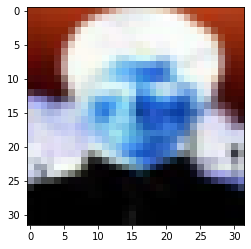

In [1067]:
class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', 'carnivores', \
               'omni/herbivores', 'small/medium mammals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 164)
plt.imshow(transposed_white_data[660 + i][0])
l = second_iteration.predict(transposed_white_data[660 + i:661 + i])
ind = [j for j in range(15) if l[0][j] == max(l[0])]
second = [j for j in range(15) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[white_y[660 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')

### Observations.

I ran the above experiment about 20-30 times (granted, it was quite fun) and I made some very useful observations about the model.

- The model succeeds at "getting the easy stuff". Pictures of a chair with very little background noise are easily identified as being furniture. A picture of a clearly identifiable pear (to a human) surrounded by nothingness is easily identified as fruit. So it's a good indication that the model has *some* idea of how to distinguish between the different classes.
- The model performs poorly when there is a lot of noise in the image or when the object in the image is pretty clearly one thing, but it is feasible for a computer model to think it's another. For instance, there's an image of a person with outstretched arms and legs that could feasibly be interpreted as an invertebrate. One particularly problematic example is where there was an image of a food container with something inside it, that the model thought was an invertebrate. Even when it predicts correctly in those cases, its "confidence" (measured by the probability) is lower.
- Oftentimes, the model fails to distinguish between very similar classes (in particular, animals). To be fair, there are few characteristics that distinguish an omnivore/herbivore from a small to medium sized mammal that can be represented in a 32x32 image. As a result, it may have picked out defining characteristics from the training set causing overfitting. I might therefore want to consider merging the animal classes together. In this case, the size of the dataset will become unreasonably low due to the need for class balance. So I might want to remove the restriction whereby all images must have a white background, and simply operate on randomly chosen samples totaling 2000-3000 images - besides, it's better for generalizability.
- Also the model likes to predict "furniture" when it sees straight lines which is all well and good but in real life we might get straight lines in other contexts or simply due to data quality. It needs to detect more subtle features for furniture, this is part of why I will switch to different data.

Plan: merge "carnivores", "omni/herbivores", and "small to medium mammals" into one class (called "land animals"), which means total 13 classes. Now take 300 random samples from each class to form train + validation sets. 80-20 split means 3120 training samples and 780 validation samples.

In [1071]:
condensed_data = np.zeros((3900, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((3900), dtype=np.uint8)

ptrs = [300] * 13
training = 0
validation = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [8, 9, 10]: val = 8
    elif val in [11, 12, 13, 14]: val -= 2
    if ptrs[val] == 0: continue
    if ptrs[val] <= 60:
        condensed_data[3120 + validation] = classified_data_2[i]
        condensed_y[3120 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1

In [1075]:
#from tensorflow.keras import initializers as init

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dense(units=13, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(condensed_data, one_hot_encode(condensed_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=True)
    
    tr_acc = second_iteration.evaluate(condensed_data[:3120], one_hot_encode(condensed_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(condensed_data[3120:], one_hot_encode(condensed_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 56s 18ms/step - loss: 2.5123 - acc: 0.1093 - val_loss: 2.4156 - val_acc: 0.1821
Epoch 2/50
3120/3120 [==============================] - 21s 7ms/step - loss: 2.3812 - acc: 0.1817 - val_loss: 2.2835 - val_acc: 0.1974
Epoch 3/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.2645 - acc: 0.2160 - val_loss: 2.2251 - val_acc: 0.2385
Epoch 4/50
3120/3120 [==============================] - 18s 6ms/step - loss: 2.1665 - acc: 0.2651 - val_loss: 2.2377 - val_acc: 0.2321
Epoch 5/50
3120/3120 [==============================] - 18s 6ms/step - loss: 2.1231 - acc: 0.2830 - val_loss: 2.2273 - val_acc: 0.2487
Epoch 6/50
3120/3120 [==============================] - 18s 6ms/step - loss: 2.0264 - acc: 0.3212 - val_loss: 2.1045 - val_acc: 0.3090
Epoch 7/50
3120/3120 [==============================] - 18s 6ms/step - loss: 1.9513 - acc: 0.3545 - val_loss: 2.1281 - val_acc: 0.2718
Epoch 8

KeyboardInterrupt: 

Expected: trees
Got: trees
Confidence: 0.7485129833221436
Second option: land animals
Second confidence: 0.0995328277349472


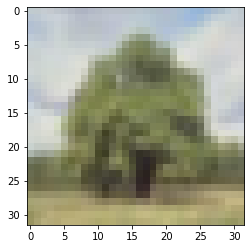

In [1104]:
class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 779)
plt.imshow(condensed_data[3120 + i][0])
l = second_iteration.predict(condensed_data[3120 + i:3121 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[condensed_y[3120 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')

Overfitting still occurs. But at least now we are using a dataset with more general images and the three similar classes of "carnivores", "omni/herbivores" and "small to medium sized mammals" are now condensed into one class.

Let's try to solve the overfitting problem using dropout. This way, we ensure that the model fully learns features rather than noise.

Source: https://towardsdatascience.com/dropout-in-neural-networks-47a162d621d9, https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

In [1108]:
#from tensorflow.keras import initializers as init

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(condensed_data, one_hot_encode(condensed_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=True)
    
    tr_acc = second_iteration.evaluate(condensed_data[:3120], one_hot_encode(condensed_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(condensed_data[3120:], one_hot_encode(condensed_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 55s 18ms/step - loss: 2.5257 - acc: 0.1067 - val_loss: 2.4337 - val_acc: 0.1667
Epoch 2/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.3557 - acc: 0.1984 - val_loss: 2.2969 - val_acc: 0.2321
Epoch 3/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.1923 - acc: 0.2654 - val_loss: 2.1385 - val_acc: 0.2846
Epoch 4/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.0608 - acc: 0.3199 - val_loss: 2.1477 - val_acc: 0.2936
Epoch 5/50
3120/3120 [==============================] - 19s 6ms/step - loss: 1.9868 - acc: 0.3391 - val_loss: 2.1586 - val_acc: 0.2808
Epoch 6/50
 512/3120 [===>..........................] - ETA: 14s - loss: 1.9309 - acc: 0.3730

KeyboardInterrupt: 

It seems that no matter what I change, at some point the loss function in validation starts getting *reverse-optimized*. Or more formally, just increasing after some period of decrease.

This is an indicator of overfitting, but it's just as much an indicator that it's probably an underlying problem with the data that is causing this issue. I'll run the investigation again.

Expected: food containers
Got: land animals
Confidence: 0.19979310035705566
Second option: food containers
Second confidence: 0.17681020498275757


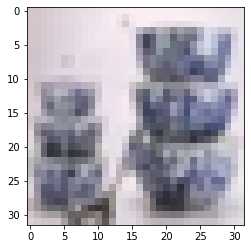

In [1145]:
class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 779)
plt.imshow(condensed_data[3120 + i][0])
l = second_iteration.predict(condensed_data[3120 + i:3121 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[condensed_y[3120 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')

In [1149]:
#from tensorflow.keras import initializers as init

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(condensed_data, one_hot_encode(condensed_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=True)
    
    tr_acc = second_iteration.evaluate(condensed_data[:3120], one_hot_encode(condensed_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(condensed_data[3120:], one_hot_encode(condensed_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 76s 24ms/step - loss: 2.5330 - acc: 0.0965 - val_loss: 2.4717 - val_acc: 0.1500
Epoch 2/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.3987 - acc: 0.1862 - val_loss: 2.2782 - val_acc: 0.2167
Epoch 3/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.2334 - acc: 0.2490 - val_loss: 2.1603 - val_acc: 0.2718
Epoch 4/50
3120/3120 [==============================] - 19s 6ms/step - loss: 2.1307 - acc: 0.2849 - val_loss: 2.1376 - val_acc: 0.2859
Epoch 5/50
3120/3120 [==============================] - 21s 7ms/step - loss: 2.0270 - acc: 0.3234 - val_loss: 2.0408 - val_acc: 0.3359
Epoch 6/50
3120/3120 [==============================] - 19s 6ms/step - loss: 1.9240 - acc: 0.3538 - val_loss: 1.9810 - val_acc: 0.3474
Epoch 7/50
3120/3120 [==============================] - 19s 6ms/step - loss: 1.8539 - acc: 0.3654 - val_loss: 2.0411 - val_acc: 0.3256
Epoch 8

KeyboardInterrupt: 

Today is Friday, 24th of November. The goal is to reduce overfitting. Previous attempts to use dropout didn't work too well, so let's try different approaches.

Firstly I'm not even sure whether "shuffle" will shuffle the entire set, or split 80-20 and then shuffle. To be completely sure...

In [1152]:
shuffled_data = np.zeros((3900, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((3900), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(3120)]
shuffled_valid = [*range(3120, 3900)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(3120):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(780):
    shuffled_data[shuffled_valid[i]] = condensed_data[3120 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[3120 + i]

In [1155]:
#from tensorflow.keras import initializers as init

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:3120], one_hot_encode(shuffled_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[3120:], one_hot_encode(shuffled_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 65s 21ms/step - loss: 2.4699 - acc: 0.1404 - val_loss: 2.3212 - val_acc: 0.2167
Epoch 2/50
3120/3120 [==============================] - 24s 8ms/step - loss: 2.3142 - acc: 0.2160 - val_loss: 2.2889 - val_acc: 0.2218
Epoch 3/50
3120/3120 [==============================] - 24s 8ms/step - loss: 2.2393 - acc: 0.2404 - val_loss: 2.1788 - val_acc: 0.2744
Epoch 4/50
3120/3120 [==============================] - 24s 8ms/step - loss: 2.1672 - acc: 0.2628 - val_loss: 2.1835 - val_acc: 0.2603
Epoch 5/50
3120/3120 [==============================] - 20s 6ms/step - loss: 2.0970 - acc: 0.2929 - val_loss: 2.1267 - val_acc: 0.2782
Epoch 6/50
3120/3120 [==============================] - 20s 6ms/step - loss: 2.0313 - acc: 0.3192 - val_loss: 2.1412 - val_acc: 0.2769
Epoch 7/50
3120/3120 [==============================] - 20s 7ms/step - loss: 2.0054 - acc: 0.3272 - val_loss: 2.0956 - val_acc: 0.2821
Epoch 8

KeyboardInterrupt: 

In [1156]:
#from tensorflow.keras import initializers as init

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=64, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=64, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=64, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:3120], one_hot_encode(shuffled_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[3120:], one_hot_encode(shuffled_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 61s 20ms/step - loss: 2.5565 - acc: 0.1010 - val_loss: 2.4730 - val_acc: 0.1692
Epoch 2/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.4080 - acc: 0.1744 - val_loss: 2.3245 - val_acc: 0.2064
Epoch 3/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.3069 - acc: 0.2221 - val_loss: 2.2039 - val_acc: 0.2590
Epoch 4/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.2053 - acc: 0.2548 - val_loss: 2.1877 - val_acc: 0.2808
Epoch 5/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.1339 - acc: 0.2792 - val_loss: 2.1346 - val_acc: 0.3026
Epoch 6/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.0733 - acc: 0.3083 - val_loss: 2.1131 - val_acc: 0.3115
Epoch 7/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.0006 - acc: 0.3327 - val_loss: 2.0590 - val_acc: 0.3192
Epoch 8

KeyboardInterrupt: 

We can see that the overfitting is somewhat mitigated when we increase the batch size. But it still manages 65% accuracy on training set.

In [1157]:
#from tensorflow.keras import initializers as init

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=64, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:3120], one_hot_encode(shuffled_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[3120:], one_hot_encode(shuffled_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 61s 19ms/step - loss: 2.5438 - acc: 0.0971 - val_loss: 2.4461 - val_acc: 0.1474
Epoch 2/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.4103 - acc: 0.1715 - val_loss: 2.3169 - val_acc: 0.1936
Epoch 3/50
3120/3120 [==============================] - 15s 5ms/step - loss: 2.3280 - acc: 0.1923 - val_loss: 2.2625 - val_acc: 0.2256
Epoch 4/50
3120/3120 [==============================] - 15s 5ms/step - loss: 2.2669 - acc: 0.2103 - val_loss: 2.1950 - val_acc: 0.2500
Epoch 5/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.2003 - acc: 0.2423 - val_loss: 2.1321 - val_acc: 0.2756
Epoch 6/50
3120/3120 [==============================] - 15s 5ms/step - loss: 2.1406 - acc: 0.2737 - val_loss: 2.1172 - val_acc: 0.2987
Epoch 7/50
3120/3120 [==============================] - 16s 5ms/step - loss: 2.0969 - acc: 0.2901 - val_loss: 2.0862 - val_acc: 0.2987
Epoch 8

KeyboardInterrupt: 

In [1174]:
# New approach: we will use more conv layers but back to batch size 32. Fewer filters in each layer. Creates hierarchy

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:3120], one_hot_encode(shuffled_y[:3120]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[3120:], one_hot_encode(shuffled_y[3120:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 3120 samples, validate on 780 samples
Epoch 1/50
3120/3120 [==============================] - 77s 25ms/step - loss: 2.5417 - acc: 0.0949 - val_loss: 2.4491 - val_acc: 0.1218
Epoch 2/50
3120/3120 [==============================] - 21s 7ms/step - loss: 2.4576 - acc: 0.1436 - val_loss: 2.3755 - val_acc: 0.1769
Epoch 3/50
3120/3120 [==============================] - 20s 6ms/step - loss: 2.3638 - acc: 0.1785 - val_loss: 2.3227 - val_acc: 0.2038
Epoch 4/50
3120/3120 [==============================] - 20s 6ms/step - loss: 2.2842 - acc: 0.2167 - val_loss: 2.2474 - val_acc: 0.2487
Epoch 5/50
3120/3120 [==============================] - 20s 7ms/step - loss: 2.1961 - acc: 0.2551 - val_loss: 2.2012 - val_acc: 0.2872
Epoch 6/50
3120/3120 [==============================] - 20s 7ms/step - loss: 2.1409 - acc: 0.2705 - val_loss: 2.1494 - val_acc: 0.2846
Epoch 7/50
3120/3120 [==============================] - 21s 7ms/step - loss: 2.0793 - acc: 0.2971 - val_loss: 2.1690 - val_acc: 0.2692
Epoch 8

KeyboardInterrupt: 

Given the small sizes of the images, the advice I was given to train on a smaller dataset can be "stretched". I would say, doubling the sizes of the datasets should rather positively affect performance. That is, 6240 training and 1560 validation. I have genuinely had it with the overfitting. I don't feel that reducing the complexity of the model can positively affect results because feature extraction is already not very strong as it is. I can add more layers but with this small a set it would probably just overfit even more. So I will double dataset size. But I do agree that training on 37500 samples is a very bad idea.

In [1291]:
condensed_data = np.zeros((7800, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((7800), dtype=np.uint8)

ptrs = [600] * 13
training = 0
validation = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    if ptrs[val] == 0: continue
    if ptrs[val] <= 120:
        condensed_data[6240 + validation] = classified_data_2[i]
        condensed_y[6240 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((7800, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((7800), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(6240)]
shuffled_valid = [*range(6240, 7800)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(6240):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(1560):
    shuffled_data[shuffled_valid[i]] = condensed_data[6240 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[6240 + i]

In [1292]:
# New approach: we will use more conv layers but back to batch size 32. Fewer filters in each layer. Creates hierarchy

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:6240], one_hot_encode(shuffled_y[:6240]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[6240:], one_hot_encode(shuffled_y[6240:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 6240 samples, validate on 1560 samples
Epoch 1/50
6240/6240 [==============================] - 85s 14ms/step - loss: 2.4723 - acc: 0.1239 - val_loss: 2.3794 - val_acc: 0.1724
Epoch 2/50
6240/6240 [==============================] - 28s 5ms/step - loss: 2.3041 - acc: 0.2090 - val_loss: 2.2303 - val_acc: 0.2385
Epoch 3/50
6240/6240 [==============================] - 28s 5ms/step - loss: 2.1778 - acc: 0.2696 - val_loss: 2.1098 - val_acc: 0.2994
Epoch 4/50
6240/6240 [==============================] - 26s 4ms/step - loss: 2.0985 - acc: 0.3013 - val_loss: 2.0406 - val_acc: 0.3365
Epoch 5/50
6240/6240 [==============================] - 26s 4ms/step - loss: 2.0245 - acc: 0.3276 - val_loss: 1.9962 - val_acc: 0.3468
Epoch 6/50
6240/6240 [==============================] - 26s 4ms/step - loss: 1.9653 - acc: 0.3391 - val_loss: 1.9621 - val_acc: 0.3571
Epoch 7/50
6240/6240 [==============================] - 28s 4ms/step - loss: 1.9211 - acc: 0.3579 - val_loss: 1.9733 - val_acc: 0.3442
Epoch 

Expected: vehicles
Got: vehicles
Confidence: 0.8211724758148193
Second option: electronics
Second confidence: 0.1554694026708603
Index: 565


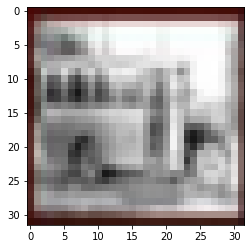

In [1408]:
'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 1559)
plt.imshow(shuffled_data[6240 + i][0])
l = second_iteration.predict(shuffled_data[6240 + i:6241 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[6240 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')''' # validation

class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 6239)
plt.imshow(shuffled_data[i][0])
l = second_iteration.predict(shuffled_data[i:1 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}') # train

One observation I just made is that there are some grayscale images which could unjustly sway the opinion of the CNN. How prevalent are these images actually?

In [1415]:
gray = [0] * 15 # back to the old classes for a second
for i in range(37500):
    if i % 100 == 0: print(i, end=" ")
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: gray[int(y_data[i])] += 1
gray

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

[17, 6, 28, 7, 69, 20, 23, 14, 21, 20, 47, 117, 19, 17, 67]

There aren't that many grayscale images, but it does little harm to remove them from the dataset, because the dataset size of 6240 train / 1560 valid is small enough that these grayscale images could contribute to the overfitting.

While we're at it, let's also remove those images, that have a white background. Our goal is to keep the images that were taken with a lot of background noise, which theoretically is a bad thing but since there are so few images *without* background noise (that there would be overfitting unless we severely reduced the model's capacity in which case there's a lack of learning) it should be the right thing to do.

In [1418]:
condensed_data = np.zeros((7800, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((7800), dtype=np.uint8)

ptrs = [600] * 13
training = 0
validation = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    if ptrs[val] == 0: continue
    
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 120:
        condensed_data[6240 + validation] = classified_data_2[i]
        condensed_y[6240 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((7800, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((7800), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(6240)]
shuffled_valid = [*range(6240, 7800)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(6240):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(1560):
    shuffled_data[shuffled_valid[i]] = condensed_data[6240 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[6240 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 

In [1419]:
# New approach: we will use more conv layers but back to batch size 32. Fewer filters in each layer. Creates hierarchy

def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:6240], one_hot_encode(shuffled_y[:6240]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[6240:], one_hot_encode(shuffled_y[6240:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 6240 samples, validate on 1560 samples
Epoch 1/50
6240/6240 [==============================] - 100s 16ms/step - loss: 2.4542 - acc: 0.1357 - val_loss: 2.2775 - val_acc: 0.2192
Epoch 2/50
6240/6240 [==============================] - 43s 7ms/step - loss: 2.2563 - acc: 0.2402 - val_loss: 2.1731 - val_acc: 0.2500
Epoch 3/50
6240/6240 [==============================] - 45s 7ms/step - loss: 2.1321 - acc: 0.2766 - val_loss: 2.0995 - val_acc: 0.2917
Epoch 4/50
6240/6240 [==============================] - 42s 7ms/step - loss: 2.0492 - acc: 0.3178 - val_loss: 2.0487 - val_acc: 0.3090
Epoch 5/50
6240/6240 [==============================] - 41s 7ms/step - loss: 1.9894 - acc: 0.3341 - val_loss: 2.0032 - val_acc: 0.3218
Epoch 6/50
6240/6240 [==============================] - 43s 7ms/step - loss: 1.9401 - acc: 0.3442 - val_loss: 2.0005 - val_acc: 0.3321
Epoch 7/50
6240/6240 [==============================] - 41s 7ms/step - loss: 1.9167 - acc: 0.3519 - val_loss: 1.9960 - val_acc: 0.3397
Epoch

KeyboardInterrupt: 

It didn't help. (Why should it have?)

In [1426]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:6240], one_hot_encode(shuffled_y[:6240]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[6240:], one_hot_encode(shuffled_y[6240:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 6240 samples, validate on 1560 samples
Epoch 1/50
6240/6240 [==============================] - 128s 21ms/step - loss: 2.5072 - acc: 0.1236 - val_loss: 2.4201 - val_acc: 0.1526
Epoch 2/50
6240/6240 [==============================] - 83s 13ms/step - loss: 2.4339 - acc: 0.1562 - val_loss: 2.3172 - val_acc: 0.2006
Epoch 3/50
6240/6240 [==============================] - 86s 14ms/step - loss: 2.3552 - acc: 0.1772 - val_loss: 2.2917 - val_acc: 0.2032
Epoch 4/50
6240/6240 [==============================] - 85s 14ms/step - loss: 2.2990 - acc: 0.1965 - val_loss: 2.2161 - val_acc: 0.2417
Epoch 5/50
6240/6240 [==============================] - 83s 13ms/step - loss: 2.2521 - acc: 0.2196 - val_loss: 2.2844 - val_acc: 0.2429
Epoch 6/50
6240/6240 [==============================] - 84s 13ms/step - loss: 2.2207 - acc: 0.2365 - val_loss: 2.2014 - val_acc: 0.2545
Epoch 7/50
6240/6240 [==============================] - 85s 14ms/step - loss: 2.1647 - acc: 0.2505 - val_loss: 2.1686 - val_acc: 0.2692

https://www.dataquest.io/blog/regularization-in-machine-learning/

A weight-decay regularization approach may be necessary to ensure that the model learns properly (and not just on the training set).

Further investigation showed that the weights aren't even that high (or maybe they are and I just don't know what "high" means). Regardless, I just got the idea of reverting to the standard stochastic gradient descent optimizer and tuning its learning rate as a hyperparameter. And obviously reducing filters in earlier layers. The reasoning is that Adam adapts its learning rate which could lead it to adapt it for the purpose of memorizing the training set.

In [1430]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=10, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.SGD(lr=0.01)

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:6240], one_hot_encode(shuffled_y[:6240]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[6240:], one_hot_encode(shuffled_y[6240:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 6240 samples, validate on 1560 samples
Epoch 1/50
6240/6240 [==============================] - 70s 11ms/step - loss: 2.5234 - acc: 0.1090 - val_loss: 2.5448 - val_acc: 0.1199
Epoch 2/50
6240/6240 [==============================] - 29s 5ms/step - loss: 2.4324 - acc: 0.1639 - val_loss: 2.3833 - val_acc: 0.1891
Epoch 3/50
6240/6240 [==============================] - 28s 5ms/step - loss: 2.3549 - acc: 0.1944 - val_loss: 2.2795 - val_acc: 0.2224
Epoch 4/50
6240/6240 [==============================] - 27s 4ms/step - loss: 2.3185 - acc: 0.2024 - val_loss: 2.3023 - val_acc: 0.1968
Epoch 5/50
6240/6240 [==============================] - 28s 4ms/step - loss: 2.2935 - acc: 0.2179 - val_loss: 2.2612 - val_acc: 0.2115
Epoch 6/50
6240/6240 [==============================] - 28s 5ms/step - loss: 2.2608 - acc: 0.2221 - val_loss: 2.1948 - val_acc: 0.2532
Epoch 7/50
6240/6240 [==============================] - 29s 5ms/step - loss: 2.2423 - acc: 0.2338 - val_loss: 2.1755 - val_acc: 0.2622
Epoch 

KeyboardInterrupt: 

It was a grave misconception.

**Date**: 26 November

I found this publicly available research paper at https://www.researchgate.net/publication/331677125_An_Overview_of_Overfitting_and_its_Solutions about overfitting. I would like to try the L2 regularization with my neural network, as opposed to L1, because this way features are still learned albeit with smaller weights.

Used documentation at https://keras.io/api/layers/regularizers/

In [1436]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-5)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:6240], one_hot_encode(shuffled_y[:6240]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[6240:], one_hot_encode(shuffled_y[6240:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 6240 samples, validate on 1560 samples
Epoch 1/50
6240/6240 [==============================] - 77s 12ms/step - loss: 2.4477 - acc: 0.1446 - val_loss: 2.3387 - val_acc: 0.1853
Epoch 2/50
6240/6240 [==============================] - 35s 6ms/step - loss: 2.3135 - acc: 0.2035 - val_loss: 2.2836 - val_acc: 0.2205
Epoch 3/50
6240/6240 [==============================] - 38s 6ms/step - loss: 2.2259 - acc: 0.2457 - val_loss: 2.1661 - val_acc: 0.2705
Epoch 4/50
6240/6240 [==============================] - 38s 6ms/step - loss: 2.1450 - acc: 0.2721 - val_loss: 2.1206 - val_acc: 0.2782
Epoch 5/50
6240/6240 [==============================] - 37s 6ms/step - loss: 2.0831 - acc: 0.2942 - val_loss: 2.1125 - val_acc: 0.2968
Epoch 6/50
6240/6240 [==============================] - 36s 6ms/step - loss: 2.0222 - acc: 0.3154 - val_loss: 2.0479 - val_acc: 0.3173
Epoch 7/50
6240/6240 [==============================] - 37s 6ms/step - loss: 1.9768 - acc: 0.3293 - val_loss: 2.0625 - val_acc: 0.3269
Epoch 

KeyboardInterrupt: 

In [1441]:
condensed_data = np.zeros((15600, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((15600), dtype=np.uint8)

ptrs = [1200] * 13
training = 0
validation = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    if ptrs[val] == 0: continue
    
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 240:
        condensed_data[12480 + validation] = classified_data_2[i]
        condensed_y[12480 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((15600, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((15600), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(12480)]
shuffled_valid = [*range(12480, 15600)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(12480):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(3120):
    shuffled_data[shuffled_valid[i]] = condensed_data[12480 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[12480 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 

In [1442]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-5)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 97s 8ms/step - loss: 2.4120 - acc: 0.1636 - val_loss: 2.1855 - val_acc: 0.2513
Epoch 2/50
12480/12480 [==============================] - 68s 5ms/step - loss: 2.1962 - acc: 0.2450 - val_loss: 2.0818 - val_acc: 0.3090
Epoch 3/50
12480/12480 [==============================] - 69s 6ms/step - loss: 2.0973 - acc: 0.2837 - val_loss: 2.0568 - val_acc: 0.3263
Epoch 4/50
12480/12480 [==============================] - 69s 5ms/step - loss: 2.0082 - acc: 0.3137 - val_loss: 1.9850 - val_acc: 0.3564
Epoch 5/50
12480/12480 [==============================] - 71s 6ms/step - loss: 1.9336 - acc: 0.3410 - val_loss: 1.9707 - val_acc: 0.3635
Epoch 6/50
12480/12480 [==============================] - 68s 5ms/step - loss: 1.8858 - acc: 0.3589 - val_loss: 1.9327 - val_acc: 0.3798
Epoch 7/50
12480/12480 [==============================] - 68s 5ms/step - loss: 1.8363 - acc: 0.3788 - val_loss: 1.9332 - val_acc:

KeyboardInterrupt: 

why does it keep overfitting

In [1446]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=8, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=48, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-5)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=20, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-5)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 67s 5ms/step - loss: 2.4418 - acc: 0.1389 - val_loss: 2.3004 - val_acc: 0.2173
Epoch 2/50
12480/12480 [==============================] - 31s 3ms/step - loss: 2.3045 - acc: 0.2046 - val_loss: 2.2424 - val_acc: 0.2474
Epoch 3/50
12480/12480 [==============================] - 31s 2ms/step - loss: 2.2270 - acc: 0.2365 - val_loss: 2.1384 - val_acc: 0.2859
Epoch 4/50
12480/12480 [==============================] - 31s 2ms/step - loss: 2.1922 - acc: 0.2506 - val_loss: 2.0974 - val_acc: 0.3003
Epoch 5/50
12480/12480 [==============================] - 31s 2ms/step - loss: 2.1623 - acc: 0.2564 - val_loss: 2.0754 - val_acc: 0.3077
Epoch 6/50
12480/12480 [==============================] - 36s 3ms/step - loss: 2.1473 - acc: 0.2644 - val_loss: 2.1096 - val_acc: 0.3064
Epoch 7/50
12480/12480 [==============================] - 33s 3ms/step - loss: 2.1354 - acc: 0.2725 - val_loss: 2.0763 - val_acc:

KeyboardInterrupt: 

Expected: sea animals
Got: vehicles
Confidence: 0.25277429819107056
Second option: electronics
Second confidence: 0.11957178264856339
Index: 605


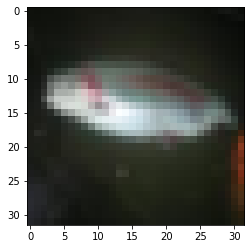

In [1475]:
'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 1559)
plt.imshow(shuffled_data[6240 + i][0])
l = second_iteration.predict(shuffled_data[6240 + i:6241 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[6240 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')''' # validation

class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 3129)
plt.imshow(shuffled_data[12480 + i][0])
l = second_iteration.predict(shuffled_data[12480 + i:12481 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[12480 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')

In [1484]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers

# Run a grid search

for c in range(-3, 4):
    r = 10**c
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(r)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(r)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(r)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=20, input_dim=48, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(r)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=16, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(r)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=30, validation_split=0.2, shuffle=False, verbose=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Regularization {r}:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Regularization 0.001:
54.2% (train) vs. 40.2% (validation)
Regularization 0.01:
47.800000000000004% (train) vs. 41.400000000000006% (validation)
Regularization 0.1:
22.700000000000003% (train) vs. 21.6% (validation)
Regularization 1:
7.6000000000000005% (train) vs. 7.6000000000000005% (validation)


KeyboardInterrupt: 

In [1490]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 86s 7ms/step - loss: 2.8147 - acc: 0.1410 - val_loss: 2.4673 - val_acc: 0.2212
Epoch 2/50
12480/12480 [==============================] - 48s 4ms/step - loss: 2.4087 - acc: 0.2271 - val_loss: 2.2406 - val_acc: 0.2917
Epoch 3/50
12480/12480 [==============================] - 53s 4ms/step - loss: 2.2863 - acc: 0.2687 - val_loss: 2.1674 - val_acc: 0.3317
Epoch 4/50
12480/12480 [==============================] - 47s 4ms/step - loss: 2.2151 - acc: 0.2934 - val_loss: 2.0754 - val_acc: 0.3615
Epoch 5/50
12480/12480 [==============================] - 50s 4ms/step - loss: 2.1574 - acc: 0.3094 - val_loss: 2.1229 - val_acc: 0.3401
Epoch 6/50
12480/12480 [==============================] - 47s 4ms/step - loss: 2.1125 - acc: 0.3279 - val_loss: 2.0711 - val_acc: 0.3696
Epoch 7/50
12480/12480 [==============================] - 45s 4ms/step - loss: 2.0926 - acc: 0.3369 - val_loss: 2.0535 - val_acc:

KeyboardInterrupt: 

KeyboardInterrupt: 

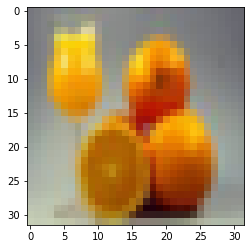

In [1775]:
'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 1559)
plt.imshow(shuffled_data[6240 + i][0])
l = second_iteration.predict(shuffled_data[6240 + i:6241 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[6240 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')''' # validation

class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 3129)
plt.imshow(shuffled_data[12480 + i][0])
l = second_iteration.predict(shuffled_data[12480 + i:12481 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[12480 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
if ind[0] != shuffled_y[12480 + i]: print(f'Confidence in the correct answer: {l[0][shuffled_y[12480 + i]]}')
print(f'Index: {i}')

**Observations, round 2**

There are certain pairs of classes that closely relate to each other, e.g. fruits and vegetables vs. flowers; and it probably should be highlighted to the model that these two classes are different. Something similar was previously happening with land animals, but it was always going to be hard for the model to distinguish between omnivores and carnivores. (how do you even do that?) But fruits and vegetables vs. flowers is not particularly hard to distinguish. Same goes with furniture vs. electronics. I will therefore experiment with the idea of adding additional penalty terms to the loss function for these common "50/50" choices. (trees vs. insects is another 50/50 choice although it's less pronounced.) 

It is important to note that for some of these 50/50s, the model only predicts one of them wrongly. So for instance, trees vs. insects: the model almsot never predicts trees on insects, but vice versa is very common. Specifications:

- model predicts "flowers" on "fruits and vegetables": common
- model predicts "fruits and vegetables" on "flowers": common
- model predicts "furniture" on "electronics": common
- model predicts "electronics" on "furniture": common
- model predicts "insects" on "trees": common
- model predicts "insects" on "invertebrates": common


In [1778]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, cce) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 83s 7ms/step - loss: 2.9504 - acc: 0.1366 - val_loss: 2.6518 - val_acc: 0.1833
Epoch 2/50
12480/12480 [==============================] - 50s 4ms/step - loss: 2.4969 - acc: 0.2074 - val_loss: 2.3151 - val_acc: 0.2689
Epoch 3/50
12480/12480 [==============================] - 48s 4ms/step - loss: 2.3205 - acc: 0.2670 - val_loss: 2.2091 - val_acc: 0.3099
Epoch 4/50
12480/12480 [==============================] - 47s 4ms/step - loss: 2.2101 - acc: 0.2981 - val_loss: 2.1532 - val_acc: 0.3362
Epoch 5/50
12480/12480 [==============================] - 45s 4ms/step - loss: 2.1514 - acc: 0.3213 - val_loss: 2.1133 - val_acc: 0.3526
Epoch 6/50
12480/12480 [==============================] - 46s 4ms/step - loss: 2.1118 - acc: 0.3377 - val_loss: 2.0586 - val_acc: 0.3737
Epoch 7/50
12480/12480 [==============================] - 46s 4ms/step - loss: 2.0736 - acc: 0.3522 - val_loss: 2.0659 - val_acc:

KeyboardInterrupt: 

Expected: insects
Got: people
Confidence: 0.17263589799404144
Second option: furniture
Second confidence: 0.14831480383872986
Index: 6645


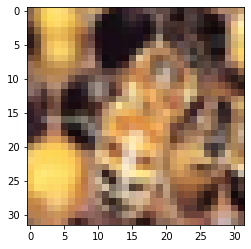

In [2100]:
class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 12479)
plt.imshow(shuffled_data[i][0])
l = second_iteration.predict(shuffled_data[i:1 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')

'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 3129)
plt.imshow(shuffled_data[12480 + i][0])
l = second_iteration.predict(shuffled_data[12480 + i:12481 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[12480 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
if ind[0] != shuffled_y[12480 + i]: print(f'Confidence in the correct answer: {l[0][shuffled_y[12480 + i]]}')
print(f'Index: {i}')''';

**Observations, round 3**

The main observation I have been able to make is that the model fails to detect very subtle images. Also there are a lot of "reptile" images of sea turtles and sea snakes and so on that could very easily be classified as sea animals (because of the blue background). Perhaps I should add this as a "50/50" pair for the loss function.

Indeed, adding a 1.2 scale factor to the loss function for the aforementioned 50/50 pairs has improved the accuracy slightly. Let's try more of that.

It seems as though the long-overdue EDA is finally coming now, with randomized analysis ;)

In [2103]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 87s 7ms/step - loss: 2.8538 - acc: 0.1414 - val_loss: 2.4724 - val_acc: 0.2202
Epoch 2/50
12480/12480 [==============================] - 52s 4ms/step - loss: 2.3820 - acc: 0.2340 - val_loss: 2.2185 - val_acc: 0.3170
Epoch 3/50
12480/12480 [==============================] - 45s 4ms/step - loss: 2.2390 - acc: 0.2751 - val_loss: 2.1901 - val_acc: 0.3314
Epoch 4/50
12480/12480 [==============================] - 52s 4ms/step - loss: 2.1678 - acc: 0.3003 - val_loss: 2.0934 - val_acc: 0.3574
Epoch 5/50
12480/12480 [==============================] - 53s 4ms/step - loss: 2.1160 - acc: 0.3234 - val_loss: 2.0502 - val_acc: 0.3718
Epoch 6/50
12480/12480 [==============================] - 53s 4ms/step - loss: 2.0912 - acc: 0.3394 - val_loss: 2.0593 - val_acc: 0.3795
Epoch 7/50
12480/12480 [==============================] - 52s 4ms/step - loss: 2.0645 - acc: 0.3522 - val_loss: 2.0665 - val_acc:

KeyboardInterrupt: 

Bruh I've been typing it in wrong the whole time ;) I genuinely don't know how it managed to improve.

We'll just have to wait and see I guess...

In [2104]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 106s 9ms/step - loss: 2.9154 - acc: 0.1334 - val_loss: 2.5273 - val_acc: 0.2048
Epoch 2/50
12480/12480 [==============================] - 46s 4ms/step - loss: 2.4871 - acc: 0.2053 - val_loss: 2.3376 - val_acc: 0.2715
Epoch 3/50
12480/12480 [==============================] - 45s 4ms/step - loss: 2.3443 - acc: 0.2542 - val_loss: 2.2712 - val_acc: 0.2894
Epoch 4/50
12480/12480 [==============================] - 44s 4ms/step - loss: 2.2095 - acc: 0.2953 - val_loss: 2.1131 - val_acc: 0.3692
Epoch 5/50
12480/12480 [==============================] - 44s 4ms/step - loss: 2.1275 - acc: 0.3345 - val_loss: 2.0855 - val_acc: 0.3702
Epoch 6/50
12480/12480 [==============================] - 45s 4ms/step - loss: 2.0709 - acc: 0.3502 - val_loss: 2.0220 - val_acc: 0.4061
Epoch 7/50
12480/12480 [==============================] - 46s 4ms/step - loss: 2.0325 - acc: 0.3696 - val_loss: 2.0567 - val_acc

KeyboardInterrupt: 

In [2107]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=30, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 106s 8ms/step - loss: 3.3143 - acc: 0.1503 - val_loss: 2.6641 - val_acc: 0.2497
Epoch 2/50
12480/12480 [==============================] - 77s 6ms/step - loss: 2.5049 - acc: 0.2278 - val_loss: 2.3239 - val_acc: 0.2920
Epoch 3/50
12480/12480 [==============================] - 78s 6ms/step - loss: 2.3128 - acc: 0.2750 - val_loss: 2.1575 - val_acc: 0.3426
Epoch 4/50
12480/12480 [==============================] - 81s 6ms/step - loss: 2.1876 - acc: 0.3212 - val_loss: 2.1176 - val_acc: 0.3769
Epoch 5/50
12480/12480 [==============================] - 80s 6ms/step - loss: 2.1367 - acc: 0.3447 - val_loss: 2.0647 - val_acc: 0.4022
Epoch 6/50
12480/12480 [==============================] - 80s 6ms/step - loss: 2.0905 - acc: 0.3642 - val_loss: 2.0763 - val_acc: 0.4013
Epoch 7/50
12480/12480 [==============================] - 75s 6ms/step - loss: 2.0577 - acc: 0.3813 - val_loss: 2.0475 - val_acc


KeyboardInterrupt



In [2108]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=40, input_dim=192, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=30, input_dim=40, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 110s 9ms/step - loss: 3.3880 - acc: 0.1552 - val_loss: 2.6938 - val_acc: 0.2074
Epoch 2/50
12480/12480 [==============================] - 68s 5ms/step - loss: 2.5314 - acc: 0.2073 - val_loss: 2.3643 - val_acc: 0.2538
Epoch 3/50
12480/12480 [==============================] - 71s 6ms/step - loss: 2.3616 - acc: 0.2353 - val_loss: 2.2419 - val_acc: 0.2782
Epoch 4/50
12480/12480 [==============================] - 70s 6ms/step - loss: 2.3020 - acc: 0.2569 - val_loss: 2.1648 - val_acc: 0.3119
Epoch 5/50
12480/12480 [==============================] - 69s 6ms/step - loss: 2.2497 - acc: 0.2820 - val_loss: 2.1617 - val_acc: 0.3154
Epoch 6/50
12480/12480 [==============================] - 68s 5ms/step - loss: 2.2254 - acc: 0.2950 - val_loss: 2.1403 - val_acc: 0.3490
Epoch 7/50
12480/12480 [==============================] - 69s 6ms/step - loss: 2.1849 - acc: 0.3095 - val_loss: 2.1226 - val_acc

KeyboardInterrupt: 

In [2135]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=80, input_dim=256, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=40, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=40, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 133s 11ms/step - loss: 2.4636 - acc: 0.1591 - val_loss: 2.3068 - val_acc: 0.2269
Epoch 2/50
12480/12480 [==============================] - 82s 7ms/step - loss: 2.2625 - acc: 0.2377 - val_loss: 2.1969 - val_acc: 0.2917
Epoch 3/50
12480/12480 [==============================] - 82s 7ms/step - loss: 2.1857 - acc: 0.2793 - val_loss: 2.1244 - val_acc: 0.3244
Epoch 4/50
12480/12480 [==============================] - 83s 7ms/step - loss: 2.1230 - acc: 0.3040 - val_loss: 2.0904 - val_acc: 0.3417
Epoch 5/50
12480/12480 [==============================] - 73s 6ms/step - loss: 2.0754 - acc: 0.3197 - val_loss: 2.0455 - val_acc: 0.3551
Epoch 6/50
12480/12480 [==============================] - 73s 6ms/step - loss: 2.0316 - acc: 0.3470 - val_loss: 2.0341 - val_acc: 0.3686
Epoch 7/50
12480/12480 [==============================] - 68s 5ms/step - loss: 1.9840 - acc: 0.3619 - val_loss: 1.9975 - val_ac

KeyboardInterrupt: 

In [2145]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=80, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=40, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=40, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=50, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:12480], one_hot_encode(shuffled_y[:12480]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[12480:], one_hot_encode(shuffled_y[12480:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 12480 samples, validate on 3120 samples
Epoch 1/50
12480/12480 [==============================] - 227s 18ms/step - loss: 2.6080 - acc: 0.1534 - val_loss: 2.3551 - val_acc: 0.2353
Epoch 2/50
12480/12480 [==============================] - 153s 12ms/step - loss: 2.3345 - acc: 0.2268 - val_loss: 2.2282 - val_acc: 0.2846
Epoch 3/50
12480/12480 [==============================] - 140s 11ms/step - loss: 2.2363 - acc: 0.2661 - val_loss: 2.1824 - val_acc: 0.2984
Epoch 4/50
12480/12480 [==============================] - 135s 11ms/step - loss: 2.1850 - acc: 0.2919 - val_loss: 2.1274 - val_acc: 0.3247
Epoch 5/50
12480/12480 [==============================] - 136s 11ms/step - loss: 2.1298 - acc: 0.3141 - val_loss: 2.0827 - val_acc: 0.3487
Epoch 6/50
12480/12480 [==============================] - 140s 11ms/step - loss: 2.0909 - acc: 0.3267 - val_loss: 2.0589 - val_acc: 0.3513
Epoch 7/50
12480/12480 [==============================] - 180s 14ms/step - loss: 2.0495 - acc: 0.3414 - val_loss: 2.0

KeyboardInterrupt: 

In [16]:
condensed_data = np.zeros((6500, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((6500), dtype=np.uint8)

ptrs = [500] * 13
training = 0
validation = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    if ptrs[val] == 0: continue
    
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 100:
        condensed_data[5200 + validation] = classified_data_2[i]
        condensed_y[5200 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((6500, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((6500), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(5200)]
shuffled_valid = [*range(5200, 6500)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(5200):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(1300):
    shuffled_data[shuffled_valid[i]] = condensed_data[5200 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[5200 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 

In [2152]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=50, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=40, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=40, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=16, epochs=25, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/25
5200/5200 [==============================] - 121s 23ms/step - loss: 2.6483 - acc: 0.0917 - val_loss: 2.4840 - val_acc: 0.1392
Epoch 2/25
5200/5200 [==============================] - 64s 12ms/step - loss: 2.4729 - acc: 0.1658 - val_loss: 2.3221 - val_acc: 0.2038
Epoch 3/25
5200/5200 [==============================] - 64s 12ms/step - loss: 2.3765 - acc: 0.1940 - val_loss: 2.2613 - val_acc: 0.2323
Epoch 4/25
5200/5200 [==============================] - 64s 12ms/step - loss: 2.3142 - acc: 0.2244 - val_loss: 2.2191 - val_acc: 0.2508
Epoch 5/25
5200/5200 [==============================] - 70s 13ms/step - loss: 2.2761 - acc: 0.2335 - val_loss: 2.1940 - val_acc: 0.2454
Epoch 6/25
5200/5200 [==============================] - 63s 12ms/step - loss: 2.2468 - acc: 0.2427 - val_loss: 2.1838 - val_acc: 0.2638
Epoch 7/25
5200/5200 [==============================] - 64s 12ms/step - loss: 2.2202 - acc: 0.2562 - val_loss: 2.1562 - val_acc: 0.2815

KeyboardInterrupt: 

In [2165]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.25)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(3e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=60, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=60, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=35, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/35
5200/5200 [==============================] - 223s 43ms/step - loss: 3.7597 - acc: 0.1413 - val_loss: 3.0044 - val_acc: 0.1962
Epoch 2/35
5200/5200 [==============================] - 145s 28ms/step - loss: 2.9046 - acc: 0.1938 - val_loss: 2.7186 - val_acc: 0.2200
Epoch 3/35
5200/5200 [==============================] - 146s 28ms/step - loss: 2.7152 - acc: 0.2221 - val_loss: 2.5587 - val_acc: 0.2569
Epoch 4/35
5200/5200 [==============================] - 146s 28ms/step - loss: 2.5334 - acc: 0.2688 - val_loss: 2.4636 - val_acc: 0.2731
Epoch 5/35
5200/5200 [==============================] - 148s 28ms/step - loss: 2.3968 - acc: 0.2942 - val_loss: 2.3390 - val_acc: 0.3362
Epoch 6/35
5200/5200 [==============================] - 152s 29ms/step - loss: 2.3032 - acc: 0.3190 - val_loss: 2.2713 - val_acc: 0.3385
Epoch 7/35
5200/5200 [==============================] - 150s 29ms/step - loss: 2.2196 - acc: 0.3419 - val_loss: 2.2111 - val_acc: 

KeyboardInterrupt: 

Combating the issue requires more regularization. Also I will add a hidden layer.

In [ ]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(5e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(5e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(5e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(5e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(5e-3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(5e-3)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=80, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=40, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=13, input_dim=40, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(1e-3)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=35, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/35
5200/5200 [==============================] - 221s 42ms/step - loss: 4.7824 - acc: 0.1121 - val_loss: 3.2069 - val_acc: 0.1754
Epoch 2/35
5200/5200 [==============================] - 159s 31ms/step - loss: 2.9881 - acc: 0.1758 - val_loss: 2.7522 - val_acc: 0.1831
Epoch 3/35
5184/5200 [============================>.] - ETA: 0s - loss: 2.6630 - acc: 0.2068

In [2187]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    
    second_iteration.add(layers.Dense(units=80, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    
    second_iteration.add(layers.Dense(units=60, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    
    second_iteration.add(layers.Dense(units=13, input_dim=60, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/40
5200/5200 [==============================] - 242s 47ms/step - loss: 2.4168 - acc: 0.1644 - val_loss: 2.2326 - val_acc: 0.2123
Epoch 2/40
5200/5200 [==============================] - 139s 27ms/step - loss: 2.2498 - acc: 0.2252 - val_loss: 2.1946 - val_acc: 0.2508
Epoch 3/40
5200/5200 [==============================] - 142s 27ms/step - loss: 2.1826 - acc: 0.2573 - val_loss: 2.0822 - val_acc: 0.2846
Epoch 4/40
5200/5200 [==============================] - 145s 28ms/step - loss: 2.0638 - acc: 0.3069 - val_loss: 2.0119 - val_acc: 0.3308
Epoch 5/40
5200/5200 [==============================] - 143s 27ms/step - loss: 1.9574 - acc: 0.3446 - val_loss: 2.0555 - val_acc: 0.3285
Epoch 6/40
5200/5200 [==============================] - 144s 28ms/step - loss: 1.8356 - acc: 0.3810 - val_loss: 2.0402 - val_acc: 0.3577
Epoch 7/40
5200/5200 [==============================] - 154s 30ms/step - loss: 1.7421 - acc: 0.4212 - val_loss: 1.9836 - val_acc: 

KeyboardInterrupt: 

Expected: flowers
Got: fruit and vegetables
Confidence: 0.7707887291908264
Confidence in the correct answer: 0.04208198934793472
Index: 450


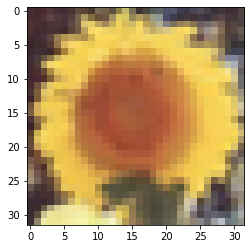

In [2289]:
'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 12479)
plt.imshow(shuffled_data[i][0])
l = second_iteration.predict(shuffled_data[i:1 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')'''

class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 1299)
plt.imshow(shuffled_data[5200 + i][0])
l = second_iteration.predict(shuffled_data[5200 + i:5201 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[5200 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
if ind[0] != shuffled_y[5200 + i]: print(f'Confidence in the correct answer: {l[0][shuffled_y[5200 + i]]}')
print(f'Index: {i}')

In [18]:


def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow import keras

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((1, 3), (3, 1), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.002)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.002)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.002)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.002)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.002)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.002)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=150, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dropout(0.15))
    second_iteration.add(layers.Dense(units=80, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dropout(0.15))
    second_iteration.add(layers.Dense(units=30, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/40
5200/5200 [==============================] - 104s 20ms/step - loss: 3.5529 - acc: 0.1163 - val_loss: 2.7514 - val_acc: 0.1631
Epoch 2/40
5200/5200 [==============================] - 99s 19ms/step - loss: 2.6529 - acc: 0.1644 - val_loss: 2.4834 - val_acc: 0.2008
Epoch 3/40
5200/5200 [==============================] - 103s 20ms/step - loss: 2.4951 - acc: 0.1967 - val_loss: 2.3792 - val_acc: 0.2031
Epoch 4/40
5200/5200 [==============================] - 103s 20ms/step - loss: 2.3899 - acc: 0.2235 - val_loss: 2.2912 - val_acc: 0.2308
Epoch 5/40
5200/5200 [==============================] - 101s 19ms/step - loss: 2.3394 - acc: 0.2390 - val_loss: 2.2791 - val_acc: 0.2415
Epoch 6/40
5200/5200 [==============================] - 105s 20ms/step - loss: 2.2965 - acc: 0.2498 - val_loss: 2.2205 - val_acc: 0.2808
Epoch 7/40
5200/5200 [==============================] - 105s 20ms/step - loss: 2.2474 - acc: 0.2788 - val_loss: 2.2183 - val_acc: 0

KeyboardInterrupt: 

In [19]:


def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow import keras

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((1, 3), (3, 1), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=150, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=80, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=30, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/40
5200/5200 [==============================] - 98s 19ms/step - loss: 3.9937 - acc: 0.1102 - val_loss: 2.9581 - val_acc: 0.1377
Epoch 2/40
5200/5200 [==============================] - 97s 19ms/step - loss: 2.7676 - acc: 0.1594 - val_loss: 2.5657 - val_acc: 0.1708
Epoch 3/40
5200/5200 [==============================] - 97s 19ms/step - loss: 2.5469 - acc: 0.1819 - val_loss: 2.4887 - val_acc: 0.1992
Epoch 4/40
5200/5200 [==============================] - 97s 19ms/step - loss: 2.4370 - acc: 0.1998 - val_loss: 2.3585 - val_acc: 0.2146
Epoch 5/40
5200/5200 [==============================] - 97s 19ms/step - loss: 2.3562 - acc: 0.2227 - val_loss: 2.2944 - val_acc: 0.2215
Epoch 6/40
5200/5200 [==============================] - 97s 19ms/step - loss: 2.3080 - acc: 0.2412 - val_loss: 2.2739 - val_acc: 0.2385
Epoch 7/40
5200/5200 [==============================] - 97s 19ms/step - loss: 2.2754 - acc: 0.2488 - val_loss: 2.2436 - val_acc: 0.2477


KeyboardInterrupt: 

In [21]:


def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

import tensorflow as tf

from tensorflow.keras import layers, models
from tensorflow import keras

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((1, 3), (3, 1), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

if True:
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(0.003)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=100, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=25, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))
    second_iteration.add(layers.Dense(units=13, input_dim=25, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.001)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'Batch size 32:')
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Train on 5200 samples, validate on 1300 samples
Epoch 1/40
5200/5200 [==============================] - 51s 10ms/step - loss: 2.8135 - acc: 0.1200 - val_loss: 2.5381 - val_acc: 0.1238
Epoch 2/40
5200/5200 [==============================] - 51s 10ms/step - loss: 2.4982 - acc: 0.1310 - val_loss: 2.5069 - val_acc: 0.1385
Epoch 3/40
5200/5200 [==============================] - 48s 9ms/step - loss: 2.4580 - acc: 0.1450 - val_loss: 2.3706 - val_acc: 0.1877
Epoch 4/40
5200/5200 [==============================] - 52s 10ms/step - loss: 2.3873 - acc: 0.1844 - val_loss: 2.3476 - val_acc: 0.1754
Epoch 5/40
5200/5200 [==============================] - 53s 10ms/step - loss: 2.3416 - acc: 0.2052 - val_loss: 2.2790 - val_acc: 0.2215
Epoch 6/40
5200/5200 [==============================] - 50s 10ms/step - loss: 2.3247 - acc: 0.2190 - val_loss: 2.3058 - val_acc: 0.2269
Epoch 7/40
5200/5200 [==============================] - 46s 9ms/step - loss: 2.2821 - acc: 0.2348 - val_loss: 2.2765 - val_acc: 0.2254
Ep

KeyboardInterrupt: 

In effect, the problem is reduced to solving the overfitting issue. I already have a model that can reach 77% accuracy on the training set in 20 epochs, now we just need to make it learn on validation as well.

Let's run another regularization grid search. 0.001, 0.004, 0.006, 0.008, 0.01.

In [29]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

for val in [0.001, 0.004, 0.006, 0.008, 0.01]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    
    second_iteration.add(layers.Dense(units=80, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    
    second_iteration.add(layers.Dense(units=60, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    
    second_iteration.add(layers.Dense(units=13, input_dim=60, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=20, validation_split=0.2, shuffle=False, verbose=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.001 regularization
61.300000000000004% (train) vs. 35.300000000000004% (validation)
Going 0.004 regularization
45.2% (train) vs. 37.9% (validation)
Going 0.006 regularization
34.9% (train) vs. 30.5% (validation)
Going 0.008 regularization


KeyboardInterrupt: 

In [40]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

for val in [0.001]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 10)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 10)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 10)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 10)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 10)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 10)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=300, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=150, input_dim=300, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=75, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.001 regularization
Train on 5200 samples, validate on 1300 samples
Epoch 1/60
5200/5200 [==============================] - 150s 29ms/step - loss: 7.7465 - acc: 0.0869 - val_loss: 4.5929 - val_acc: 0.1277
Epoch 2/60
5200/5200 [==============================] - 147s 28ms/step - loss: 4.0051 - acc: 0.1173 - val_loss: 3.5111 - val_acc: 0.1262
Epoch 3/60
5200/5200 [==============================] - 144s 28ms/step - loss: 3.2742 - acc: 0.1385 - val_loss: 3.0110 - val_acc: 0.1438
Epoch 4/60
5200/5200 [==============================] - 144s 28ms/step - loss: 2.9146 - acc: 0.1540 - val_loss: 2.7711 - val_acc: 0.1785
Epoch 5/60
5200/5200 [==============================] - 143s 28ms/step - loss: 2.6929 - acc: 0.1865 - val_loss: 2.5704 - val_acc: 0.1885
Epoch 6/60
5200/5200 [==============================] - 142s 27ms/step - loss: 2.5715 - acc: 0.2012 - val_loss: 2.4452 - val_acc: 0.2208
Epoch 7/60
5200/5200 [==============================] - 143s 28ms/step - loss: 2.4838 - acc: 0.2165 - v

KeyboardInterrupt: 

## 29 November

UPD: I found out that L1 regularization may be better for this project.

https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization

L1 is "more robust to outliers", which through my "random EDA" (which consists of taking random validation images and looking at the model's thought process on them) seem to be very common. Rockets, for instance, could be considered outliers within the set of vehicles, because they don't resemble other vehicles such as cars and trains. It makes sense from a mathematical point of view that L1 regularization would work better in outlier-heavy datasets, because L2 regularization "inflates" the outlier weights through the squaring. You know what, let's try a bit of L1 regularization in this project. It could be that the model's failure to learn is due to our use of L2 regularization because it focuses on outliers, and in particular those in the training set. It also could be why overfitting is still witnessed in spite of regularization.

In [44]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

for val in [0.00025]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=300, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=150, input_dim=300, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=75, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.00025 regularization
Train on 5200 samples, validate on 1300 samples
Epoch 1/60
5200/5200 [==============================] - 176s 34ms/step - loss: 7.0836 - acc: 0.0948 - val_loss: 5.1205 - val_acc: 0.1354
Epoch 2/60
5200/5200 [==============================] - 166s 32ms/step - loss: 4.5498 - acc: 0.1313 - val_loss: 4.0118 - val_acc: 0.1508
Epoch 3/60
5200/5200 [==============================] - 166s 32ms/step - loss: 3.7711 - acc: 0.1619 - val_loss: 3.4573 - val_acc: 0.1800
Epoch 4/60
5200/5200 [==============================] - 166s 32ms/step - loss: 3.3334 - acc: 0.1854 - val_loss: 3.2223 - val_acc: 0.1692
Epoch 5/60
5200/5200 [==============================] - 166s 32ms/step - loss: 3.0562 - acc: 0.1963 - val_loss: 2.8991 - val_acc: 0.2146
Epoch 6/60
5200/5200 [==============================] - 166s 32ms/step - loss: 2.8602 - acc: 0.2088 - val_loss: 2.7531 - val_acc: 0.2323
Epoch 7/60
5200/5200 [==============================] - 166s 32ms/step - loss: 2.7243 - acc: 0.2308 -

KeyboardInterrupt: 

Expected: electronics
Got: food containers
Confidence: 0.2391107827425003
Confidence in the correct answer: 0.20318059623241425
Index: 1237


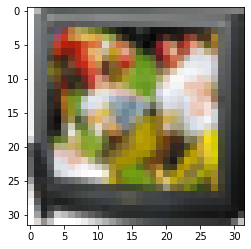

In [78]:
'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 12479)
plt.imshow(shuffled_data[i][0])
l = second_iteration.predict(shuffled_data[i:1 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')'''

class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 1299)
plt.imshow(shuffled_data[5200 + i][0])
l = second_iteration.predict(shuffled_data[5200 + i:5201 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[5200 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
if ind[0] != shuffled_y[5200 + i]: print(f'Confidence in the correct answer: {l[0][shuffled_y[5200 + i]]}')
print(f'Index: {i}')

In [79]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

for val in [0.0004]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=100, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=300, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=150, input_dim=300, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=75, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:5200], one_hot_encode(shuffled_y[:5200]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[5200:], one_hot_encode(shuffled_y[5200:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0004 regularization
Train on 5200 samples, validate on 1300 samples
Epoch 1/60
5200/5200 [==============================] - 216s 42ms/step - loss: 10.0755 - acc: 0.1013 - val_loss: 6.6721 - val_acc: 0.1338
Epoch 2/60
5200/5200 [==============================] - 203s 39ms/step - loss: 5.7217 - acc: 0.1344 - val_loss: 4.9522 - val_acc: 0.1392
Epoch 3/60
5200/5200 [==============================] - 203s 39ms/step - loss: 4.4563 - acc: 0.1463 - val_loss: 4.0082 - val_acc: 0.1769
Epoch 4/60
5200/5200 [==============================] - 202s 39ms/step - loss: 3.7399 - acc: 0.1565 - val_loss: 3.4425 - val_acc: 0.1785
Epoch 5/60
5200/5200 [==============================] - 202s 39ms/step - loss: 3.3013 - acc: 0.1769 - val_loss: 3.1448 - val_acc: 0.1923
Epoch 6/60
5200/5200 [==============================] - 202s 39ms/step - loss: 3.0352 - acc: 0.1746 - val_loss: 2.8968 - val_acc: 0.2062
Epoch 7/60
5200/5200 [==============================] - 202s 39ms/step - loss: 2.8532 - acc: 0.1973 -

KeyboardInterrupt: 

## 30 November

Today is the last day of November. I performed some more EDA and decided that reptile images with blue background should be removed as they are virtually indistinguishable from sea animals. No, genuinely.

Also, the size of the dataset will be reduced once again to 2600+650, because then less complexity is needed which 1) reduces training time and 2) reduces overfitting.

Detecting a blue background in reptile images is kind of tough. I'll experiment with different methods.

In [89]:
condensed_data = np.zeros((6500, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((6500), dtype=np.uint8)

ptrs = [500] * 13
training = 0
validation = 0

bluerept = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    if val == 10: continue
    
    if ptrs[val] == 0: continue
    blueback = False
    for k in range(30):
        for l in range(30):
            cells = []
            cells.append(classified_data_2[i][0][k][l])
            cells.append(classified_data_2[i][0][k+1][l])
            cells.append(classified_data_2[i][0][k+2][l])
            cells.append(classified_data_2[i][0][k][l+1])
            cells.append(classified_data_2[i][0][k+1][l+1])
            cells.append(classified_data_2[i][0][k+2][l+1])
            cells.append(classified_data_2[i][0][k][l+2])
            cells.append(classified_data_2[i][0][k+1][l+2])
            cells.append(classified_data_2[i][0][k+2][l+2])
            cnt = 0
            for cell in cells:
                if (int(cell[2]) / 10 >= int(cell[0]) + int(cell[1])):
                    cnt += 1
            if cnt == 9:
                blueback = True
                break
        if blueback: break
        
    if blueback: bluerept += 1
        
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 100:
        condensed_data[5200 + validation] = classified_data_2[i]
        condensed_y[5200 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((6500, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((6500), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(5200)]
shuffled_valid = [*range(5200, 6500)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(5200):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(1300):
    shuffled_data[shuffled_valid[i]] = condensed_data[5200 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[5200 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 

In [91]:
bluerept

77

Alright, then.

In [15]:
condensed_data = np.zeros((3250, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((3250), dtype=np.uint8)

ptrs = [250] * 13
training = 0
validation = 0

bluerept = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    
    if ptrs[val] == 0: continue
    blueback = False
    for k in range(30):
        for l in range(30):
            cells = []
            cells.append(classified_data_2[i][0][k][l])
            cells.append(classified_data_2[i][0][k+1][l])
            cells.append(classified_data_2[i][0][k+2][l])
            cells.append(classified_data_2[i][0][k][l+1])
            cells.append(classified_data_2[i][0][k+1][l+1])
            cells.append(classified_data_2[i][0][k+2][l+1])
            cells.append(classified_data_2[i][0][k][l+2])
            cells.append(classified_data_2[i][0][k+1][l+2])
            cells.append(classified_data_2[i][0][k+2][l+2])
            cnt = 0
            for cell in cells:
                if (int(cell[2]) / 10 >= int(cell[0]) + int(cell[1])):
                    cnt += 1
            if cnt == 9:
                blueback = True
                break
        if blueback: break
        
    if blueback and val == 10: continue
        
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 50:
        condensed_data[2600 + validation] = classified_data_2[i]
        condensed_y[2600 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((3250, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((3250), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(2600)]
shuffled_valid = [*range(2600, 3250)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(2600):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(650):
    shuffled_data[shuffled_valid[i]] = condensed_data[2600 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[2600 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 

In [95]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

for val in [0.00025]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=150, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dense(units=50, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.00025 regularization
Train on 2600 samples, validate on 650 samples
Epoch 1/60
2600/2600 [==============================] - 42s 16ms/step - loss: 3.7685 - acc: 0.1177 - val_loss: 3.0582 - val_acc: 0.1708
Epoch 2/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.9237 - acc: 0.1662 - val_loss: 2.8041 - val_acc: 0.1415
Epoch 3/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.7390 - acc: 0.1854 - val_loss: 2.6604 - val_acc: 0.1908
Epoch 4/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.6221 - acc: 0.1996 - val_loss: 2.5389 - val_acc: 0.2077
Epoch 5/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.5291 - acc: 0.2181 - val_loss: 2.4750 - val_acc: 0.2108
Epoch 6/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.4707 - acc: 0.2265 - val_loss: 2.4267 - val_acc: 0.2231
Epoch 7/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.4329 - acc: 0.2327 - val_los

KeyboardInterrupt: 

In [104]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.2)
    return cce

for val in [0.0005]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=50, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dense(units=30, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0005 regularization
Train on 2600 samples, validate on 650 samples
Epoch 1/60
2600/2600 [==============================] - 43s 17ms/step - loss: 4.2231 - acc: 0.0912 - val_loss: 3.1436 - val_acc: 0.0892
Epoch 2/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.9090 - acc: 0.1158 - val_loss: 2.7126 - val_acc: 0.1662
Epoch 3/60
2600/2600 [==============================] - 33s 13ms/step - loss: 2.6756 - acc: 0.1519 - val_loss: 2.5832 - val_acc: 0.1677
Epoch 4/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.5613 - acc: 0.1723 - val_loss: 2.4827 - val_acc: 0.1862
Epoch 5/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.4922 - acc: 0.1831 - val_loss: 2.4178 - val_acc: 0.2092
Epoch 6/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.4361 - acc: 0.1962 - val_loss: 2.3955 - val_acc: 0.2169
Epoch 7/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.4156 - acc: 0.2081 - val_loss

KeyboardInterrupt: 

In [109]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.3)
    return cce

for val in [0.0005]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=40, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=30, input_dim=40, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=30, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0005 regularization
Train on 2600 samples, validate on 650 samples
Epoch 1/60
2600/2600 [==============================] - 44s 17ms/step - loss: 4.0797 - acc: 0.0796 - val_loss: 3.0335 - val_acc: 0.0800
Epoch 2/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.8048 - acc: 0.0842 - val_loss: 2.6840 - val_acc: 0.1185
Epoch 3/60
2600/2600 [==============================] - 33s 13ms/step - loss: 2.6040 - acc: 0.1277 - val_loss: 2.5358 - val_acc: 0.1338
Epoch 4/60
2600/2600 [==============================] - 32s 12ms/step - loss: 2.5460 - acc: 0.1408 - val_loss: 2.5027 - val_acc: 0.1354
Epoch 5/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.5212 - acc: 0.1404 - val_loss: 2.4854 - val_acc: 0.1262
Epoch 6/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.5051 - acc: 0.1365 - val_loss: 2.4718 - val_acc: 0.1354
Epoch 7/60
2600/2600 [==============================] - 31s 12ms/step - loss: 2.4922 - acc: 0.1335 - val_loss

In [115]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

for val in [0.0003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=100, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=100, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0003 regularization
Train on 2600 samples, validate on 650 samples
Epoch 1/100
2600/2600 [==============================] - 49s 19ms/step - loss: 4.1914 - acc: 0.1112 - val_loss: 3.2640 - val_acc: 0.0908
Epoch 2/100
2600/2600 [==============================] - 32s 12ms/step - loss: 2.9859 - acc: 0.1569 - val_loss: 2.7907 - val_acc: 0.1862
Epoch 3/100
2600/2600 [==============================] - 33s 13ms/step - loss: 2.7415 - acc: 0.1704 - val_loss: 2.7033 - val_acc: 0.1938
Epoch 4/100
2600/2600 [==============================] - 32s 12ms/step - loss: 2.6375 - acc: 0.1938 - val_loss: 2.5614 - val_acc: 0.1985
Epoch 5/100
2600/2600 [==============================] - 32s 12ms/step - loss: 2.5576 - acc: 0.2046 - val_loss: 2.4870 - val_acc: 0.2185
Epoch 6/100
2600/2600 [==============================] - 32s 12ms/step - loss: 2.5174 - acc: 0.2027 - val_loss: 2.4878 - val_acc: 0.2062
Epoch 7/100
2600/2600 [==============================] - 33s 13ms/step - loss: 2.4757 - acc: 0.2242 - v

KeyboardInterrupt: 

In [118]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

for val in [0.0007]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=80, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=80, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val * 1.5)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=100, validation_split=0.2, shuffle=False)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'{tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0007 regularization
Train on 2600 samples, validate on 650 samples
Epoch 1/100
2600/2600 [==============================] - 91s 35ms/step - loss: 20.7730 - acc: 0.1212 - val_loss: 11.5462 - val_acc: 0.1738
Epoch 2/100
2600/2600 [==============================] - 75s 29ms/step - loss: 9.0324 - acc: 0.1773 - val_loss: 7.3397 - val_acc: 0.1754
Epoch 3/100
2600/2600 [==============================] - 75s 29ms/step - loss: 6.5371 - acc: 0.1885 - val_loss: 5.8816 - val_acc: 0.1554
Epoch 4/100
2600/2600 [==============================] - 77s 30ms/step - loss: 5.3358 - acc: 0.1900 - val_loss: 4.8231 - val_acc: 0.2123
Epoch 5/100
2600/2600 [==============================] - 76s 29ms/step - loss: 4.5456 - acc: 0.2004 - val_loss: 4.2077 - val_acc: 0.2262
Epoch 6/100
2600/2600 [==============================] - 75s 29ms/step - loss: 4.0408 - acc: 0.2142 - val_loss: 3.7783 - val_acc: 0.2185
Epoch 7/100
2600/2600 [==============================] - 76s 29ms/step - loss: 3.6667 - acc: 0.2173 -

KeyboardInterrupt: 

In [133]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1*0.1}% (train) vs. {logs["val_acc"]*100//0.1*0.1}% (validation)')

for val in [0.0001, 0.0003, 0.0005, 0.0007, 0.0009]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=40, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=40, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=40, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=40, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=40, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=40, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=150, input_dim=640, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=80, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val * 1.5)))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=13, input_dim=80, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val * 1.5)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=30, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0001 regularization
Epoch 1: 8.8% (train) vs. 11.5% (validation)
Epoch 2: 12.5% (train) vs. 16.1% (validation)
Epoch 3: 16.7% (train) vs. 19.0% (validation)
Epoch 4: 19.400000000000002% (train) vs. 21.8% (validation)
Epoch 5: 20.700000000000003% (train) vs. 22.900000000000002% (validation)
Epoch 6: 20.700000000000003% (train) vs. 23.200000000000003% (validation)
Epoch 7: 23.1% (train) vs. 23.5% (validation)
Epoch 8: 24.900000000000002% (train) vs. 25.3% (validation)
Epoch 9: 24.5% (train) vs. 23.6% (validation)
Epoch 10: 28.0% (train) vs. 26.6% (validation)
Epoch 11: 28.900000000000002% (train) vs. 26.700000000000003% (validation)
Epoch 12: 29.400000000000002% (train) vs. 25.3% (validation)
Epoch 13: 30.6% (train) vs. 26.6% (validation)
Epoch 14: 30.8% (train) vs. 27.5% (validation)
Epoch 15: 34.2% (train) vs. 29.3% (validation)
Epoch 16: 34.9% (train) vs. 30.6% (validation)
Epoch 17: 36.6% (train) vs. 28.900000000000002% (validation)
Epoch 18: 36.0% (train) vs. 28.700000000000

KeyboardInterrupt: 

In [137]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=750, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0003 regularization
Epoch 1: 9.6% (train) vs. 12.7% (validation)
Epoch 2: 15.6% (train) vs. 16.7% (validation)
Epoch 3: 17.3% (train) vs. 20.1% (validation)
Epoch 4: 18.3% (train) vs. 19.3% (validation)
Epoch 5: 21.8% (train) vs. 24.1% (validation)
Epoch 6: 23.0% (train) vs. 22.3% (validation)
Epoch 7: 24.9% (train) vs. 26.3% (validation)
Epoch 8: 24.8% (train) vs. 22.9% (validation)
Epoch 9: 27.1% (train) vs. 25.5% (validation)
Epoch 10: 28.7% (train) vs. 26.0% (validation)
Epoch 11: 28.9% (train) vs. 25.5% (validation)
Epoch 12: 31.0% (train) vs. 27.8% (validation)
Epoch 13: 30.8% (train) vs. 30.3% (validation)
Epoch 14: 34.1% (train) vs. 29.6% (validation)
Epoch 15: 34.1% (train) vs. 29.8% (validation)
Epoch 16: 35.0% (train) vs. 33.5% (validation)
Epoch 17: 36.5% (train) vs. 32.7% (validation)
Epoch 18: 38.3% (train) vs. 29.8% (validation)
Epoch 19: 37.4% (train) vs. 31.2% (validation)
Epoch 20: 39.0% (train) vs. 33.5% (validation)
Epoch 21: 40.2% (train) vs. 30.3% (validat

KeyboardInterrupt: 

In [138]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=750, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0003 regularization
Epoch 1: 11.4% (train) vs. 15.9% (validation)
Epoch 2: 16.2% (train) vs. 17.6% (validation)
Epoch 3: 18.1% (train) vs. 19.5% (validation)
Epoch 4: 19.8% (train) vs. 23.2% (validation)
Epoch 5: 21.6% (train) vs. 23.0% (validation)
Epoch 6: 21.9% (train) vs. 22.3% (validation)
Epoch 7: 24.4% (train) vs. 23.2% (validation)
Epoch 8: 24.5% (train) vs. 24.4% (validation)
Epoch 9: 25.8% (train) vs. 26.3% (validation)
Epoch 10: 27.1% (train) vs. 25.0% (validation)
Epoch 11: 27.6% (train) vs. 27.8% (validation)
Epoch 12: 29.9% (train) vs. 27.0% (validation)
Epoch 13: 29.7% (train) vs. 27.5% (validation)
Epoch 14: 31.4% (train) vs. 30.6% (validation)
Epoch 15: 33.5% (train) vs. 31.0% (validation)
Epoch 16: 34.2% (train) vs. 30.4% (validation)
Epoch 17: 36.0% (train) vs. 28.7% (validation)
Epoch 18: 35.6% (train) vs. 31.0% (validation)
Epoch 19: 39.1% (train) vs. 30.7% (validation)
Epoch 20: 38.9% (train) vs. 33.3% (validation)
Epoch 21: 41.1% (train) vs. 33.5% (valida

KeyboardInterrupt: 

In [139]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=750, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l1(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0003 regularization
Epoch 1: 6.9% (train) vs. 7.6% (validation)
Epoch 2: 10.8% (train) vs. 13.6% (validation)
Epoch 3: 13.9% (train) vs. 17.6% (validation)
Epoch 4: 16.2% (train) vs. 17.2% (validation)
Epoch 5: 17.5% (train) vs. 18.6% (validation)
Epoch 6: 19.6% (train) vs. 21.3% (validation)
Epoch 7: 21.0% (train) vs. 23.0% (validation)
Epoch 8: 22.1% (train) vs. 22.3% (validation)
Epoch 9: 23.1% (train) vs. 24.1% (validation)
Epoch 10: 25.0% (train) vs. 27.6% (validation)
Epoch 11: 24.7% (train) vs. 24.3% (validation)
Epoch 12: 26.2% (train) vs. 23.3% (validation)
Epoch 13: 26.1% (train) vs. 23.5% (validation)
Epoch 14: 26.4% (train) vs. 23.6% (validation)
Epoch 15: 27.7% (train) vs. 27.3% (validation)
Epoch 16: 29.5% (train) vs. 28.9% (validation)
Epoch 17: 29.2% (train) vs. 29.2% (validation)
Epoch 18: 28.7% (train) vs. 29.3% (validation)
Epoch 19: 29.5% (train) vs. 28.4% (validation)
Epoch 20: 31.3% (train) vs. 29.2% (validation)
Epoch 21: 30.6% (train) vs. 29.3% (validati

KeyboardInterrupt: 

In [141]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=800, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0003 regularization
Epoch 1: 7.8% (train) vs. 11.8% (validation)
Epoch 2: 12.7% (train) vs. 14.3% (validation)
Epoch 3: 15.5% (train) vs. 21.0% (validation)
Epoch 4: 20.0% (train) vs. 22.3% (validation)
Epoch 5: 21.3% (train) vs. 24.4% (validation)
Epoch 6: 21.8% (train) vs. 26.9% (validation)
Epoch 7: 24.6% (train) vs. 29.0% (validation)
Epoch 8: 27.3% (train) vs. 29.2% (validation)
Epoch 9: 27.3% (train) vs. 26.9% (validation)
Epoch 10: 30.2% (train) vs. 28.4% (validation)
Epoch 11: 31.2% (train) vs. 30.0% (validation)
Epoch 12: 33.4% (train) vs. 27.5% (validation)
Epoch 13: 34.6% (train) vs. 31.2% (validation)
Epoch 14: 35.7% (train) vs. 32.9% (validation)
Epoch 15: 38.1% (train) vs. 32.0% (validation)
Epoch 16: 39.7% (train) vs. 32.7% (validation)
Epoch 17: 41.1% (train) vs. 34.3% (validation)
Epoch 18: 45.1% (train) vs. 34.4% (validation)
Epoch 19: 46.5% (train) vs. 34.0% (validation)
Epoch 20: 50.2% (train) vs. 34.0% (validation)
Epoch 21: 48.9% (train) vs. 37.2% (validat

KeyboardInterrupt: 

In [143]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.002]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=800, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=40, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.002 regularization
Epoch 1: 10.5% (train) vs. 11.5% (validation)
Epoch 2: 14.3% (train) vs. 18.4% (validation)
Epoch 3: 14.7% (train) vs. 10.9% (validation)
Epoch 4: 15.8% (train) vs. 20.9% (validation)
Epoch 5: 18.4% (train) vs. 22.4% (validation)
Epoch 6: 19.0% (train) vs. 24.4% (validation)
Epoch 7: 21.6% (train) vs. 24.7% (validation)
Epoch 8: 23.6% (train) vs. 26.0% (validation)
Epoch 9: 25.1% (train) vs. 28.9% (validation)
Epoch 10: 25.7% (train) vs. 27.3% (validation)
Epoch 11: 28.1% (train) vs. 29.8% (validation)
Epoch 12: 29.0% (train) vs. 33.6% (validation)
Epoch 13: 31.6% (train) vs. 33.3% (validation)
Epoch 14: 32.6% (train) vs. 32.4% (validation)
Epoch 15: 34.1% (train) vs. 32.6% (validation)
Epoch 16: 35.1% (train) vs. 28.6% (validation)
Epoch 17: 37.0% (train) vs. 33.0% (validation)
Epoch 18: 37.1% (train) vs. 33.5% (validation)
Epoch 19: 41.6% (train) vs. 31.5% (validation)
Epoch 20: 42.7% (train) vs. 32.6% (validation)
Epoch 21: 45.7% (train) vs. 34.9% (validat

In [146]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=50, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=800, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=60, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.003 regularization
Epoch 1: 7.8% (train) vs. 13.8% (validation)
Epoch 2: 11.6% (train) vs. 14.0% (validation)
Epoch 3: 15.8% (train) vs. 20.3% (validation)
Epoch 4: 18.2% (train) vs. 19.8% (validation)
Epoch 5: 19.3% (train) vs. 20.1% (validation)
Epoch 6: 20.0% (train) vs. 20.9% (validation)
Epoch 7: 22.0% (train) vs. 25.2% (validation)
Epoch 8: 22.6% (train) vs. 24.0% (validation)
Epoch 9: 24.4% (train) vs. 26.1% (validation)
Epoch 10: 24.8% (train) vs. 28.6% (validation)
Epoch 11: 26.6% (train) vs. 30.3% (validation)
Epoch 12: 27.6% (train) vs. 31.0% (validation)
Epoch 13: 28.7% (train) vs. 28.1% (validation)
Epoch 14: 30.7% (train) vs. 31.8% (validation)
Epoch 15: 30.9% (train) vs. 29.8% (validation)
Epoch 16: 34.0% (train) vs. 31.0% (validation)
Epoch 17: 32.9% (train) vs. 30.6% (validation)
Epoch 18: 35.3% (train) vs. 32.3% (validation)
Epoch 19: 35.7% (train) vs. 32.9% (validation)
Epoch 20: 37.6% (train) vs. 29.8% (validation)
Epoch 21: 38.8% (train) vs. 32.9% (validati

KeyboardInterrupt: 

In [ ]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.002]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.002 regularization
Epoch 1: 7.9% (train) vs. 12.6% (validation)
Epoch 2: 12.9% (train) vs. 15.3% (validation)
Epoch 3: 15.1% (train) vs. 14.6% (validation)
Epoch 4: 16.6% (train) vs. 20.7% (validation)
Epoch 5: 18.1% (train) vs. 21.3% (validation)
Epoch 6: 17.4% (train) vs. 22.3% (validation)
Epoch 7: 19.6% (train) vs. 19.8% (validation)
Epoch 8: 21.5% (train) vs. 23.3% (validation)
Epoch 9: 22.0% (train) vs. 26.9% (validation)
Epoch 10: 23.8% (train) vs. 24.4% (validation)
Epoch 11: 25.8% (train) vs. 27.6% (validation)
Epoch 12: 26.1% (train) vs. 29.0% (validation)
Epoch 13: 26.8% (train) vs. 29.2% (validation)
Epoch 14: 29.2% (train) vs. 30.6% (validation)
Epoch 15: 30.8% (train) vs. 33.8% (validation)
Epoch 16: 32.6% (train) vs. 30.7% (validation)
Epoch 17: 32.3% (train) vs. 33.2% (validation)
Epoch 18: 35.3% (train) vs. 32.4% (validation)
Epoch 19: 38.1% (train) vs. 32.7% (validation)
Epoch 20: 36.2% (train) vs. 33.6% (validation)
Epoch 21: 39.0% (train) vs. 34.6% (validati

In [ ]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.003 regularization
Epoch 1: 9.2% (train) vs. 10.9% (validation)
Epoch 2: 12.0% (train) vs. 14.0% (validation)
Epoch 3: 13.1% (train) vs. 16.3% (validation)
Epoch 4: 15.0% (train) vs. 20.1% (validation)
Epoch 5: 16.4% (train) vs. 15.0% (validation)
Epoch 6: 17.9% (train) vs. 20.9% (validation)
Epoch 7: 18.1% (train) vs. 19.6% (validation)
Epoch 8: 19.5% (train) vs. 20.0% (validation)
Epoch 9: 22.1% (train) vs. 23.8% (validation)
Epoch 10: 22.4% (train) vs. 22.9% (validation)
Epoch 11: 23.8% (train) vs. 25.3% (validation)
Epoch 12: 23.6% (train) vs. 24.9% (validation)
Epoch 13: 25.0% (train) vs. 27.0% (validation)
Epoch 14: 26.8% (train) vs. 26.1% (validation)
Epoch 15: 26.9% (train) vs. 26.7% (validation)
Epoch 16: 26.6% (train) vs. 29.5% (validation)
Epoch 17: 28.6% (train) vs. 27.6% (validation)
Epoch 18: 28.9% (train) vs. 28.3% (validation)
Epoch 19: 30.3% (train) vs. 28.4% (validation)
Epoch 20: 31.1% (train) vs. 29.6% (validation)
Epoch 21: 33.3% (train) vs. 29.2% (validati

In [158]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.002]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.002 regularization
Epoch 1: 8.6% (train) vs. 12.6% (validation)


KeyboardInterrupt: 

In [160]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.002]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.002 regularization
Epoch 1: 6.9% (train) vs. 10.4% (validation)
Epoch 2: 9.4% (train) vs. 10.3% (validation)
Epoch 3: 10.9% (train) vs. 13.6% (validation)
Epoch 4: 11.4% (train) vs. 14.0% (validation)
Epoch 5: 13.5% (train) vs. 14.0% (validation)
Epoch 6: 13.7% (train) vs. 13.6% (validation)
Epoch 7: 14.0% (train) vs. 17.8% (validation)
Epoch 8: 13.6% (train) vs. 13.6% (validation)
Epoch 9: 14.9% (train) vs. 17.3% (validation)
Epoch 10: 13.9% (train) vs. 14.4% (validation)
Epoch 11: 13.8% (train) vs. 17.2% (validation)
Epoch 12: 14.9% (train) vs. 18.3% (validation)
Epoch 13: 14.8% (train) vs. 17.2% (validation)
Epoch 14: 15.2% (train) vs. 16.4% (validation)
Epoch 15: 15.3% (train) vs. 18.6% (validation)
Epoch 16: 16.9% (train) vs. 18.7% (validation)
Epoch 17: 16.5% (train) vs. 20.0% (validation)
Epoch 18: 18.0% (train) vs. 21.0% (validation)
Epoch 19: 17.5% (train) vs. 20.0% (validation)
Epoch 20: 18.3% (train) vs. 20.4% (validation)
Epoch 21: 18.9% (train) vs. 19.6% (validatio

KeyboardInterrupt: 

In [174]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.003, 0.004]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.003 regularization
Epoch 1: 12.8% (train) vs. 9.5% (validation)
Epoch 2: 15.9% (train) vs. 17.8% (validation)
Epoch 3: 18.9% (train) vs. 20.3% (validation)
Epoch 4: 21.6% (train) vs. 21.0% (validation)
Epoch 5: 23.1% (train) vs. 20.4% (validation)
Epoch 6: 24.5% (train) vs. 23.3% (validation)
Epoch 7: 25.6% (train) vs. 22.9% (validation)
Epoch 8: 25.7% (train) vs. 24.7% (validation)
Epoch 9: 27.1% (train) vs. 24.3% (validation)
Epoch 10: 28.2% (train) vs. 24.6% (validation)
Epoch 11: 30.6% (train) vs. 26.0% (validation)
Epoch 12: 32.5% (train) vs. 28.4% (validation)
Epoch 13: 34.1% (train) vs. 27.5% (validation)
Epoch 14: 35.8% (train) vs. 26.3% (validation)
Epoch 15: 36.3% (train) vs. 26.6% (validation)
Epoch 16: 37.3% (train) vs. 31.0% (validation)
Epoch 17: 38.4% (train) vs. 30.4% (validation)
Epoch 18: 40.4% (train) vs. 29.6% (validation)
Epoch 19: 41.8% (train) vs. 31.6% (validation)
Epoch 20: 43.7% (train) vs. 32.3% (validation)
Epoch 21: 45.1% (train) vs. 30.3% (validati

In [180]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.001]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 2)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 2)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 2)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val * 2)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=100, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=25, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=13, input_dim=25, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.001 regularization
Epoch 1: 7.9% (train) vs. 8.9% (validation)
Epoch 2: 9.8% (train) vs. 12.3% (validation)
Epoch 3: 13.1% (train) vs. 16.1% (validation)
Epoch 4: 15.1% (train) vs. 17.6% (validation)
Epoch 5: 15.3% (train) vs. 18.9% (validation)
Epoch 6: 16.8% (train) vs. 17.5% (validation)
Epoch 7: 17.9% (train) vs. 19.2% (validation)
Epoch 8: 18.3% (train) vs. 17.8% (validation)
Epoch 9: 19.3% (train) vs. 19.5% (validation)
Epoch 10: 18.5% (train) vs. 20.1% (validation)
Epoch 11: 20.3% (train) vs. 21.6% (validation)
Epoch 12: 20.0% (train) vs. 22.3% (validation)
Epoch 13: 20.9% (train) vs. 21.2% (validation)
Epoch 14: 21.1% (train) vs. 22.4% (validation)


KeyboardInterrupt: 

https://cs231n.github.io/neural-networks-2/#init

Ever initialize the biases to 0.01?

http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf

In [185]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.001]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dense(units=100, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=25, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=25, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.001 regularization
Epoch 1: 8.1% (train) vs. 7.5% (validation)
Epoch 2: 9.3% (train) vs. 11.8% (validation)
Epoch 3: 11.2% (train) vs. 14.1% (validation)
Epoch 4: 12.2% (train) vs. 14.7% (validation)
Epoch 5: 12.4% (train) vs. 15.5% (validation)
Epoch 6: 14.1% (train) vs. 14.3% (validation)
Epoch 7: 14.3% (train) vs. 16.9% (validation)
Epoch 8: 14.5% (train) vs. 16.7% (validation)
Epoch 9: 13.6% (train) vs. 15.3% (validation)
Epoch 10: 15.6% (train) vs. 15.3% (validation)
Epoch 11: 15.3% (train) vs. 10.3% (validation)
Epoch 12: 16.2% (train) vs. 17.6% (validation)
Epoch 13: 16.5% (train) vs. 16.7% (validation)
Epoch 14: 16.6% (train) vs. 20.3% (validation)
Epoch 15: 17.7% (train) vs. 19.0% (validation)
Epoch 16: 19.1% (train) vs. 18.7% (validation)
Epoch 17: 18.6% (train) vs. 19.3% (validation)
Epoch 18: 19.3% (train) vs. 21.5% (validation)
Epoch 19: 19.3% (train) vs. 21.2% (validation)
Epoch 20: 20.5% (train) vs. 23.0% (validation)


KeyboardInterrupt: 

In [222]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0001]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.25))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0001 regularization
Epoch 1: 9.9% (train) vs. 15.6% (validation)
Epoch 2: 11.7% (train) vs. 12.4% (validation)
Epoch 3: 14.3% (train) vs. 15.8% (validation)
Epoch 4: 15.3% (train) vs. 17.8% (validation)
Epoch 5: 17.6% (train) vs. 21.8% (validation)
Epoch 6: 20.5% (train) vs. 20.9% (validation)
Epoch 7: 21.0% (train) vs. 24.3% (validation)
Epoch 8: 22.6% (train) vs. 25.2% (validation)
Epoch 9: 23.8% (train) vs. 21.2% (validation)
Epoch 10: 23.0% (train) vs. 22.9% (validation)
Epoch 11: 26.2% (train) vs. 25.5% (validation)
Epoch 12: 26.6% (train) vs. 27.8% (validation)
Epoch 13: 27.9% (train) vs. 27.0% (validation)
Epoch 14: 29.8% (train) vs. 30.0% (validation)
Epoch 15: 31.0% (train) vs. 29.8% (validation)
Epoch 16: 32.8% (train) vs. 29.8% (validation)
Epoch 17: 35.0% (train) vs. 31.3% (validation)
Epoch 18: 36.9% (train) vs. 34.0% (validation)
Epoch 19: 38.3% (train) vs. 34.0% (validation)
Epoch 20: 40.0% (train) vs. 31.6% (validation)
Epoch 21: 42.1% (train) vs. 33.5% (validat

KeyboardInterrupt: 

In [223]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0003]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0003 regularization
Epoch 1: 7.4% (train) vs. 8.0% (validation)
Epoch 2: 11.1% (train) vs. 14.9% (validation)
Epoch 3: 14.5% (train) vs. 13.6% (validation)
Epoch 4: 14.5% (train) vs. 19.2% (validation)
Epoch 5: 17.3% (train) vs. 17.2% (validation)
Epoch 6: 17.8% (train) vs. 21.6% (validation)
Epoch 7: 19.0% (train) vs. 21.6% (validation)
Epoch 8: 20.3% (train) vs. 21.2% (validation)
Epoch 9: 22.4% (train) vs. 23.8% (validation)
Epoch 10: 21.8% (train) vs. 25.8% (validation)
Epoch 11: 23.4% (train) vs. 27.0% (validation)
Epoch 12: 22.4% (train) vs. 26.3% (validation)
Epoch 13: 21.6% (train) vs. 24.0% (validation)
Epoch 14: 24.2% (train) vs. 28.1% (validation)
Epoch 15: 25.8% (train) vs. 23.8% (validation)
Epoch 16: 25.4% (train) vs. 27.0% (validation)
Epoch 17: 26.2% (train) vs. 31.8% (validation)
Epoch 18: 28.5% (train) vs. 28.9% (validation)
Epoch 19: 29.1% (train) vs. 28.6% (validation)
Epoch 20: 30.6% (train) vs. 30.7% (validation)
Epoch 21: 31.7% (train) vs. 26.4% (validati

KeyboardInterrupt: 

https://pythonbasics.org/flask-rest-api/

In [225]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0002]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.2))
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/4)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/4)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/4)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/4)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0002 regularization
Epoch 1: 7.7% (train) vs. 7.8% (validation)
Epoch 2: 10.4% (train) vs. 13.2% (validation)
Epoch 3: 12.8% (train) vs. 14.0% (validation)
Epoch 4: 14.4% (train) vs. 16.4% (validation)
Epoch 5: 15.5% (train) vs. 17.8% (validation)
Epoch 6: 17.5% (train) vs. 19.5% (validation)
Epoch 7: 19.2% (train) vs. 23.2% (validation)
Epoch 8: 18.2% (train) vs. 24.0% (validation)
Epoch 9: 21.1% (train) vs. 23.8% (validation)
Epoch 10: 23.1% (train) vs. 23.2% (validation)
Epoch 11: 24.9% (train) vs. 28.6% (validation)
Epoch 12: 24.9% (train) vs. 27.3% (validation)
Epoch 13: 26.1% (train) vs. 25.6% (validation)
Epoch 14: 26.2% (train) vs. 26.6% (validation)
Epoch 15: 26.6% (train) vs. 28.4% (validation)
Epoch 16: 28.6% (train) vs. 30.4% (validation)


KeyboardInterrupt: 

In [229]:
second_iteration.save('models/model_1.keras')

In [239]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0005]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=50, input_dim=100, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=25, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=25, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0005 regularization
Epoch 1: 7.8% (train) vs. 11.0% (validation)
Epoch 2: 7.8% (train) vs. 6.0% (validation)
Epoch 3: 8.0% (train) vs. 7.8% (validation)
Epoch 4: 7.0% (train) vs. 10.7% (validation)
Epoch 5: 10.4% (train) vs. 13.0% (validation)
Epoch 6: 11.6% (train) vs. 12.7% (validation)
Epoch 7: 12.4% (train) vs. 14.9% (validation)
Epoch 8: 13.1% (train) vs. 13.5% (validation)
Epoch 9: 12.9% (train) vs. 14.6% (validation)
Epoch 10: 12.8% (train) vs. 16.1% (validation)
Epoch 11: 13.1% (train) vs. 15.0% (validation)
Epoch 12: 14.0% (train) vs. 16.1% (validation)
Epoch 13: 14.3% (train) vs. 16.9% (validation)
Epoch 14: 15.1% (train) vs. 18.0% (validation)
Epoch 15: 16.3% (train) vs. 17.6% (validation)
Epoch 16: 15.4% (train) vs. 15.0% (validation)
Epoch 17: 14.7% (train) vs. 19.5% (validation)
Epoch 18: 15.0% (train) vs. 19.3% (validation)
Epoch 19: 16.4% (train) vs. 16.9% (validation)
Epoch 20: 15.7% (train) vs. 19.6% (validation)
Epoch 21: 17.1% (train) vs. 19.0% (validation)


In [244]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0005]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=300, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=150, input_dim=300, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=50, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))
    second_iteration.add(layers.Dropout(0.5))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros'))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0005 regularization
Epoch 1: 8.1% (train) vs. 9.3% (validation)
Epoch 2: 7.4% (train) vs. 11.5% (validation)
Epoch 3: 10.1% (train) vs. 14.0% (validation)
Epoch 4: 11.0% (train) vs. 11.8% (validation)
Epoch 5: 11.6% (train) vs. 14.1% (validation)
Epoch 6: 13.1% (train) vs. 13.3% (validation)
Epoch 7: 12.4% (train) vs. 14.1% (validation)
Epoch 8: 13.1% (train) vs. 11.6% (validation)
Epoch 9: 13.8% (train) vs. 15.2% (validation)
Epoch 10: 14.0% (train) vs. 15.6% (validation)
Epoch 11: 14.9% (train) vs. 17.6% (validation)
Epoch 12: 15.1% (train) vs. 17.5% (validation)
Epoch 13: 17.3% (train) vs. 18.9% (validation)
Epoch 14: 18.7% (train) vs. 23.5% (validation)
Epoch 15: 18.3% (train) vs. 21.6% (validation)
Epoch 16: 18.6% (train) vs. 23.0% (validation)
Epoch 17: 20.8% (train) vs. 25.0% (validation)
Epoch 18: 22.2% (train) vs. 25.0% (validation)
Epoch 19: 22.1% (train) vs. 25.2% (validation)
Epoch 20: 23.3% (train) vs. 26.9% (validation)
Epoch 21: 23.9% (train) vs. 27.0% (validatio

KeyboardInterrupt: 

In [248]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    #second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=250, input_dim=1024, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    #second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=125, input_dim=250, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    #second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=50, input_dim=125, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    #second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=50, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 11.0% (train) vs. 15.5% (validation)
Epoch 2: 16.5% (train) vs. 20.0% (validation)
Epoch 3: 19.8% (train) vs. 22.0% (validation)
Epoch 4: 22.2% (train) vs. 23.5% (validation)
Epoch 5: 22.7% (train) vs. 24.1% (validation)
Epoch 6: 27.5% (train) vs. 27.6% (validation)
Epoch 7: 28.4% (train) vs. 26.4% (validation)
Epoch 8: 34.1% (train) vs. 31.0% (validation)
Epoch 9: 35.6% (train) vs. 30.9% (validation)
Epoch 10: 37.0% (train) vs. 29.8% (validation)
Epoch 11: 40.9% (train) vs. 32.6% (validation)
Epoch 12: 44.6% (train) vs. 34.6% (validation)
Epoch 13: 46.7% (train) vs. 32.3% (validation)
Epoch 14: 47.3% (train) vs. 32.0% (validation)
Epoch 15: 53.2% (train) vs. 32.0% (validation)
Epoch 16: 56.0% (train) vs. 32.9% (validation)
Epoch 17: 57.1% (train) vs. 33.3% (validation)
Epoch 18: 59.4% (train) vs. 33.3% (validation)
Epoch 19: 64.3% (train) vs. 31.5% (validation)
Epoch 20: 66.0% (train) vs. 27.2% (validation)
Epoch 21: 67.0% (train) vs. 31.2% (validation)

KeyboardInterrupt: 

In [249]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    #second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=150, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    #second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    #second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=35, input_dim=75, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    #second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=35, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 14.1% (train) vs. 16.4% (validation)
Epoch 2: 19.2% (train) vs. 18.6% (validation)
Epoch 3: 22.3% (train) vs. 22.1% (validation)
Epoch 4: 25.0% (train) vs. 23.2% (validation)
Epoch 5: 26.7% (train) vs. 21.0% (validation)
Epoch 6: 28.1% (train) vs. 25.6% (validation)
Epoch 7: 31.0% (train) vs. 28.7% (validation)
Epoch 8: 32.6% (train) vs. 28.7% (validation)
Epoch 9: 34.9% (train) vs. 29.2% (validation)
Epoch 10: 36.5% (train) vs. 29.5% (validation)
Epoch 11: 40.5% (train) vs. 32.4% (validation)
Epoch 12: 44.5% (train) vs. 29.8% (validation)
Epoch 13: 47.4% (train) vs. 30.9% (validation)
Epoch 14: 50.2% (train) vs. 30.9% (validation)


KeyboardInterrupt: 

In [250]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=150, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=35, input_dim=75, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=35, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 7.2% (train) vs. 8.3% (validation)
Epoch 2: 7.5% (train) vs. 8.4% (validation)
Epoch 3: 8.6% (train) vs. 8.4% (validation)
Epoch 4: 11.1% (train) vs. 12.7% (validation)
Epoch 5: 13.3% (train) vs. 15.3% (validation)
Epoch 6: 14.7% (train) vs. 17.3% (validation)
Epoch 7: 15.7% (train) vs. 19.2% (validation)
Epoch 8: 17.3% (train) vs. 17.0% (validation)
Epoch 9: 17.7% (train) vs. 19.2% (validation)
Epoch 10: 18.3% (train) vs. 20.7% (validation)
Epoch 11: 18.4% (train) vs. 20.3% (validation)
Epoch 12: 20.9% (train) vs. 22.0% (validation)
Epoch 13: 20.9% (train) vs. 19.6% (validation)
Epoch 14: 21.7% (train) vs. 23.0% (validation)
Epoch 15: 23.1% (train) vs. 23.3% (validation)
Epoch 16: 22.3% (train) vs. 20.6% (validation)
Epoch 17: 24.2% (train) vs. 25.6% (validation)
Epoch 18: 24.5% (train) vs. 26.7% (validation)
Epoch 19: 26.7% (train) vs. 22.9% (validation)
Epoch 20: 26.7% (train) vs. 26.3% (validation)
Epoch 21: 28.2% (train) vs. 27.2% (validation)
Epoch

KeyboardInterrupt: 

In [252]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.0005]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=150, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=35, input_dim=75, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=35, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0005 regularization
Epoch 1: 7.3% (train) vs. 9.6% (validation)
Epoch 2: 9.8% (train) vs. 11.8% (validation)
Epoch 3: 13.3% (train) vs. 11.8% (validation)
Epoch 4: 15.3% (train) vs. 18.7% (validation)
Epoch 5: 16.6% (train) vs. 20.7% (validation)
Epoch 6: 18.4% (train) vs. 17.0% (validation)
Epoch 7: 18.4% (train) vs. 20.7% (validation)
Epoch 8: 20.1% (train) vs. 19.5% (validation)
Epoch 9: 19.4% (train) vs. 21.3% (validation)
Epoch 10: 20.2% (train) vs. 20.4% (validation)
Epoch 11: 20.9% (train) vs. 23.6% (validation)
Epoch 12: 22.9% (train) vs. 23.0% (validation)
Epoch 13: 23.6% (train) vs. 24.1% (validation)
Epoch 14: 23.3% (train) vs. 23.5% (validation)
Epoch 15: 24.6% (train) vs. 25.2% (validation)
Epoch 16: 24.1% (train) vs. 24.7% (validation)
Epoch 17: 25.8% (train) vs. 24.9% (validation)
Epoch 18: 25.3% (train) vs. 25.6% (validation)
Epoch 19: 26.4% (train) vs. 25.8% (validation)
Epoch 20: 26.6% (train) vs. 25.0% (validation)
Epoch 21: 27.2% (train) vs. 27.8% (validatio

KeyboardInterrupt: 

In [254]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10)): cce = tf.multiply(cce, 1.1)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.001]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=150, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/2)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/2)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=35, input_dim=75, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/2)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=35, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/2)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.001 regularization
Epoch 1: 6.5% (train) vs. 8.1% (validation)
Epoch 2: 7.6% (train) vs. 12.4% (validation)
Epoch 3: 10.8% (train) vs. 13.5% (validation)
Epoch 4: 12.7% (train) vs. 15.3% (validation)
Epoch 5: 13.7% (train) vs. 14.1% (validation)
Epoch 6: 15.1% (train) vs. 17.0% (validation)
Epoch 7: 15.9% (train) vs. 17.0% (validation)
Epoch 8: 16.7% (train) vs. 19.0% (validation)
Epoch 9: 19.2% (train) vs. 19.8% (validation)
Epoch 10: 21.4% (train) vs. 21.8% (validation)
Epoch 11: 19.3% (train) vs. 23.0% (validation)
Epoch 12: 21.0% (train) vs. 23.0% (validation)
Epoch 13: 21.8% (train) vs. 28.0% (validation)
Epoch 14: 22.2% (train) vs. 22.7% (validation)
Epoch 15: 22.8% (train) vs. 24.0% (validation)
Epoch 16: 22.4% (train) vs. 26.7% (validation)
Epoch 17: 24.0% (train) vs. 23.5% (validation)
Epoch 18: 23.8% (train) vs. 25.6% (validation)
Epoch 19: 24.4% (train) vs. 27.0% (validation)
Epoch 20: 25.2% (train) vs. 26.3% (validation)
Epoch 21: 25.6% (train) vs. 26.3% (validation

KeyboardInterrupt: 

In [22]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks
from tensorflow.keras import models, layers
from tensorflow import keras
import tensorflow as tf

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)): cce = tf.multiply(cce, 1.2)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0.002]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=150, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=75, input_dim=150, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=35, input_dim=75, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))
    second_iteration.add(layers.Dropout(0.4))
    second_iteration.add(layers.Dense(units=13, input_dim=35, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.002 regularization
Epoch 1: 8.3% (train) vs. 12.1% (validation)
Epoch 2: 11.1% (train) vs. 13.3% (validation)
Epoch 3: 12.4% (train) vs. 13.2% (validation)
Epoch 4: 13.2% (train) vs. 13.6% (validation)
Epoch 5: 14.1% (train) vs. 14.4% (validation)
Epoch 6: 14.7% (train) vs. 16.6% (validation)
Epoch 7: 16.6% (train) vs. 18.0% (validation)
Epoch 8: 16.9% (train) vs. 20.1% (validation)
Epoch 9: 18.4% (train) vs. 20.6% (validation)
Epoch 10: 18.1% (train) vs. 19.3% (validation)
Epoch 11: 19.4% (train) vs. 24.3% (validation)
Epoch 12: 20.9% (train) vs. 22.7% (validation)
Epoch 13: 20.1% (train) vs. 22.7% (validation)
Epoch 14: 20.1% (train) vs. 22.0% (validation)
Epoch 15: 21.7% (train) vs. 22.6% (validation)
Epoch 16: 23.4% (train) vs. 22.6% (validation)
Epoch 17: 23.0% (train) vs. 21.8% (validation)
Epoch 18: 23.6% (train) vs. 23.8% (validation)
Epoch 19: 23.6% (train) vs. 21.5% (validation)
Epoch 20: 25.4% (train) vs. 24.3% (validation)
Epoch 21: 24.7% (train) vs. 21.3% (validati

KeyboardInterrupt: 

In [29]:
def one_hot_encode(arr):
    res=np.zeros((arr.size, 13), dtype=np.uint8)
    for i in range(arr.size):
        res[i][int(arr[i])]=1
    return res

from tensorflow.keras import regularizers
from tensorflow.keras import losses
from tensorflow.keras import callbacks
from tensorflow.keras import models, layers
from tensorflow import keras
import tensorflow as tf

def scaled_loss(y_true, y_pred):
    cce = losses.categorical_crossentropy(y_true, y_pred)
    chosen = tf.math.argmax(y_true)
    if (chosen, y_pred) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)): cce = tf.multiply(cce, 1.2)
    return cce

class MyCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

for val in [0]:
    print(f'Going {val} regularization')
    second_iteration = models.Sequential()

    second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
    second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
    second_iteration.add(layers.Flatten())
    second_iteration.add(layers.Dropout(0.1))
    second_iteration.add(layers.Dense(units=200, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))
    second_iteration.add(layers.Dropout(0.3))
    second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.0001)))

    opt = keras.optimizers.Adam()

    second_iteration.compile(opt, scaled_loss, ['accuracy'])
    
    cb = [MyCallback()]

    second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)
    
    tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
    valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1
    
    print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 8.4% (train) vs. 11.6% (validation)
Epoch 2: 10.3% (train) vs. 8.7% (validation)
Epoch 3: 13.1% (train) vs. 15.5% (validation)
Epoch 4: 16.6% (train) vs. 18.6% (validation)
Epoch 5: 17.5% (train) vs. 19.0% (validation)
Epoch 6: 20.0% (train) vs. 19.2% (validation)
Epoch 7: 21.0% (train) vs. 22.3% (validation)
Epoch 8: 23.5% (train) vs. 25.3% (validation)
Epoch 9: 25.8% (train) vs. 25.3% (validation)
Epoch 10: 27.2% (train) vs. 26.1% (validation)
Epoch 11: 27.9% (train) vs. 27.2% (validation)
Epoch 12: 28.7% (train) vs. 27.5% (validation)
Epoch 13: 31.0% (train) vs. 27.0% (validation)
Epoch 14: 30.1% (train) vs. 26.7% (validation)
Epoch 15: 32.1% (train) vs. 28.4% (validation)
Epoch 16: 34.6% (train) vs. 28.7% (validation)
Epoch 17: 38.0% (train) vs. 27.5% (validation)
Epoch 18: 36.9% (train) vs. 29.3% (validation)
Epoch 19: 39.4% (train) vs. 28.7% (validation)
Epoch 20: 40.1% (train) vs. 28.6% (validation)
Epoch 21: 40.7% (train) vs. 28.4% (validation)
E

In [92]:
with tf.Session() as sess:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0.005]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        second_iteration.add(layers.Dropout(0.1))
        second_iteration.add(layers.Dense(units=200, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
        second_iteration.add(layers.Dropout(0.3))
        second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
        second_iteration.add(layers.Dropout(0.3))
        second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.005 regularization
Epoch 1: 9.3% (train) vs. 14.4% (validation)
Epoch 2: 13.6% (train) vs. 15.6% (validation)
Epoch 3: 16.1% (train) vs. 17.8% (validation)
Epoch 4: 17.5% (train) vs. 20.3% (validation)
Epoch 5: 18.0% (train) vs. 20.7% (validation)
Epoch 6: 18.9% (train) vs. 20.6% (validation)
Epoch 7: 20.8% (train) vs. 21.3% (validation)
Epoch 8: 20.1% (train) vs. 22.0% (validation)
Epoch 9: 22.3% (train) vs. 19.8% (validation)
Epoch 10: 21.1% (train) vs. 22.1% (validation)
Epoch 11: 22.9% (train) vs. 21.2% (validation)
Epoch 12: 23.6% (train) vs. 21.2% (validation)
Epoch 13: 25.4% (train) vs. 22.7% (validation)
Epoch 14: 25.5% (train) vs. 24.9% (validation)
Epoch 15: 27.3% (train) vs. 23.8% (validation)
Epoch 16: 27.6% (train) vs. 25.8% (validation)
Epoch 17: 28.0% (train) vs. 27.2% (validation)
Epoch 18: 28.5% (train) vs. 24.9% (validation)
Epoch 19: 31.3% (train) vs. 25.8% (validation)
Epoch 20: 31.9% (train) vs. 29.3% (validation)
Epoch 21: 33.1% (train) vs. 31.6% (validati

KeyboardInterrupt: 

In [94]:
with tf.Session() as sess:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0.005]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        second_iteration.add(layers.Dropout(0.1))
        second_iteration.add(layers.Dense(units=200, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/10)))
        second_iteration.add(layers.Dropout(0.3))
        second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/10)))
        second_iteration.add(layers.Dropout(0.3))
        second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val/10)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.005 regularization
Epoch 1: 9.3% (train) vs. 12.3% (validation)
Epoch 2: 12.0% (train) vs. 13.6% (validation)
Epoch 3: 12.3% (train) vs. 13.5% (validation)
Epoch 4: 15.4% (train) vs. 16.7% (validation)
Epoch 5: 15.9% (train) vs. 17.3% (validation)
Epoch 6: 17.1% (train) vs. 19.6% (validation)
Epoch 7: 16.9% (train) vs. 21.0% (validation)
Epoch 8: 18.7% (train) vs. 20.1% (validation)
Epoch 9: 20.5% (train) vs. 22.1% (validation)
Epoch 10: 20.6% (train) vs. 22.0% (validation)
Epoch 11: 21.2% (train) vs. 22.6% (validation)
Epoch 12: 22.0% (train) vs. 23.5% (validation)
Epoch 13: 21.9% (train) vs. 26.0% (validation)
Epoch 14: 22.9% (train) vs. 25.6% (validation)
Epoch 15: 23.6% (train) vs. 24.9% (validation)
Epoch 16: 24.9% (train) vs. 25.6% (validation)
Epoch 17: 25.9% (train) vs. 23.5% (validation)
Epoch 18: 24.5% (train) vs. 23.6% (validation)
Epoch 19: 26.7% (train) vs. 23.3% (validation)
Epoch 20: 25.8% (train) vs. 23.5% (validation)
Epoch 21: 27.5% (train) vs. 21.2% (validati

KeyboardInterrupt: 

https://medium.com/geekculture/how-does-batch-size-impact-your-model-learning-2dd34d9fb1fa

The batch size is another hyperparameter that could be tuned. According to the article above, decreased batch sizes often result in better generalization. And it's not too difficult to see why, since lower batch size means that a network doesn't need to compute the gradient as accurately.

Let's try a network with no dense regularization but a batch size of 16 instead of 32.

In [96]:
with tf.Session() as sess:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        #second_iteration.add(layers.Dropout(0.1))
        second_iteration.add(layers.Dense(units=200, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
        #second_iteration.add(layers.Dropout(0.3))
        second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))
        #second_iteration.add(layers.Dropout(0.3))
        second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=16, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 8.8% (train) vs. 11.6% (validation)
Epoch 2: 14.0% (train) vs. 12.1% (validation)
Epoch 3: 15.3% (train) vs. 11.8% (validation)
Epoch 4: 17.6% (train) vs. 15.3% (validation)
Epoch 5: 19.8% (train) vs. 20.0% (validation)
Epoch 6: 22.3% (train) vs. 15.6% (validation)
Epoch 7: 23.0% (train) vs. 24.7% (validation)
Epoch 8: 26.3% (train) vs. 23.6% (validation)
Epoch 9: 28.6% (train) vs. 25.5% (validation)
Epoch 10: 30.8% (train) vs. 25.0% (validation)
Epoch 11: 32.0% (train) vs. 26.3% (validation)
Epoch 12: 35.3% (train) vs. 24.3% (validation)
Epoch 13: 38.5% (train) vs. 26.3% (validation)


KeyboardInterrupt: 

In [99]:
with tf.Session() as sess:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0.001]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        
        second_iteration.add(layers.Dense(units=200, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=16, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.001 regularization
Epoch 1: 9.2% (train) vs. 12.0% (validation)
Epoch 2: 11.9% (train) vs. 12.3% (validation)
Epoch 3: 12.4% (train) vs. 14.3% (validation)
Epoch 4: 13.2% (train) vs. 15.5% (validation)
Epoch 5: 14.8% (train) vs. 17.3% (validation)
Epoch 6: 16.8% (train) vs. 18.1% (validation)
Epoch 7: 17.4% (train) vs. 20.0% (validation)
Epoch 8: 19.5% (train) vs. 20.7% (validation)
Epoch 9: 20.8% (train) vs. 22.0% (validation)
Epoch 10: 22.8% (train) vs. 24.1% (validation)
Epoch 11: 23.1% (train) vs. 24.3% (validation)
Epoch 12: 24.0% (train) vs. 24.7% (validation)
Epoch 13: 24.0% (train) vs. 24.7% (validation)
Epoch 14: 24.7% (train) vs. 23.0% (validation)
Epoch 15: 25.0% (train) vs. 23.8% (validation)
Epoch 16: 25.8% (train) vs. 24.4% (validation)
Epoch 17: 26.5% (train) vs. 24.6% (validation)
Epoch 18: 26.6% (train) vs. 24.3% (validation)
Epoch 19: 27.5% (train) vs. 22.0% (validation)
Epoch 20: 28.6% (train) vs. 21.6% (validation)
Epoch 21: 27.8% (train) vs. 22.9% (validati

KeyboardInterrupt: 

In [102]:
with tf.Session() as sess:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0, 0.0005]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        
        second_iteration.add(layers.Dense(units=80, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=40, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=13, input_dim=40, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=16, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 7.3% (train) vs. 8.0% (validation)
Epoch 2: 7.7% (train) vs. 8.3% (validation)
Epoch 3: 10.1% (train) vs. 10.7% (validation)
Epoch 4: 9.8% (train) vs. 11.2% (validation)
Epoch 5: 12.9% (train) vs. 17.2% (validation)
Epoch 6: 17.6% (train) vs. 19.5% (validation)
Epoch 7: 18.5% (train) vs. 18.7% (validation)
Epoch 8: 20.8% (train) vs. 20.6% (validation)
Epoch 9: 22.7% (train) vs. 19.8% (validation)
Epoch 10: 24.7% (train) vs. 22.6% (validation)
Epoch 11: 24.3% (train) vs. 23.6% (validation)
Epoch 12: 27.0% (train) vs. 24.6% (validation)
Epoch 13: 27.1% (train) vs. 25.2% (validation)
Epoch 14: 30.0% (train) vs. 25.8% (validation)
Epoch 15: 31.1% (train) vs. 28.4% (validation)
Epoch 16: 32.7% (train) vs. 27.2% (validation)
Epoch 17: 36.0% (train) vs. 27.3% (validation)
Epoch 18: 37.5% (train) vs. 28.6% (validation)
Epoch 19: 40.3% (train) vs. 26.7% (validation)
Epoch 20: 42.8% (train) vs. 26.6% (validation)
Epoch 21: 46.2% (train) vs. 24.9% (validation)
Epoc

In [105]:
with tf.Session() as sess:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0.0001]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_normal', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        
        second_iteration.add(layers.Dense(units=50, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=25, input_dim=50, activation='relu', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=13, input_dim=25, activation='softmax', use_bias=True, kernel_initializer='random_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=16, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1*0.1
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1*0.1

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0001 regularization
Epoch 1: 9.2% (train) vs. 7.6% (validation)
Epoch 2: 7.5% (train) vs. 7.8% (validation)
Epoch 3: 7.4% (train) vs. 11.9% (validation)
Epoch 4: 8.4% (train) vs. 7.6% (validation)
Epoch 5: 9.9% (train) vs. 12.6% (validation)
Epoch 6: 11.9% (train) vs. 13.5% (validation)
Epoch 7: 12.3% (train) vs. 13.6% (validation)
Epoch 8: 14.2% (train) vs. 15.3% (validation)
Epoch 9: 14.7% (train) vs. 17.2% (validation)
Epoch 10: 16.9% (train) vs. 17.6% (validation)
Epoch 11: 17.6% (train) vs. 18.9% (validation)
Epoch 12: 18.9% (train) vs. 17.6% (validation)
Epoch 13: 18.9% (train) vs. 18.9% (validation)
Epoch 14: 20.6% (train) vs. 22.0% (validation)
Epoch 15: 21.6% (train) vs. 21.5% (validation)
Epoch 16: 23.8% (train) vs. 21.8% (validation)
Epoch 17: 24.7% (train) vs. 22.4% (validation)
Epoch 18: 24.4% (train) vs. 26.4% (validation)
Epoch 19: 26.4% (train) vs. 24.3% (validation)
Epoch 20: 28.6% (train) vs. 24.4% (validation)
Epoch 21: 28.6% (train) vs. 24.0% (validation)
Ep

KeyboardInterrupt: 

In [143]:
if True:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        #second_iteration.add(layers.Dropout(0.2))
        second_iteration.add(layers.Dense(units=80, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        #second_iteration.add(layers.Dropout(0.2))
        second_iteration.add(layers.Dense(units=40, input_dim=80, activation='relu', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=13, input_dim=40, activation='softmax', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1/10
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1/10

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 10.8% (train) vs. 9.8% (validation)
Epoch 2: 12.9% (train) vs. 13.5% (validation)
Epoch 3: 15.6% (train) vs. 16.4% (validation)
Epoch 4: 17.1% (train) vs. 18.3% (validation)
Epoch 5: 18.0% (train) vs. 18.9% (validation)
Epoch 6: 19.5% (train) vs. 19.6% (validation)
Epoch 7: 20.1% (train) vs. 20.0% (validation)
Epoch 8: 21.2% (train) vs. 20.7% (validation)
Epoch 9: 23.1% (train) vs. 21.0% (validation)
Epoch 10: 23.6% (train) vs. 23.3% (validation)
Epoch 11: 23.2% (train) vs. 25.0% (validation)
Epoch 12: 26.7% (train) vs. 26.3% (validation)
Epoch 13: 26.8% (train) vs. 26.4% (validation)
Epoch 14: 27.9% (train) vs. 24.9% (validation)
Epoch 15: 27.6% (train) vs. 24.9% (validation)
Epoch 16: 30.5% (train) vs. 25.3% (validation)
Epoch 17: 29.3% (train) vs. 27.3% (validation)
Epoch 18: 31.3% (train) vs. 25.6% (validation)
Epoch 19: 32.6% (train) vs. 25.3% (validation)
Epoch 20: 35.1% (train) vs. 28.7% (validation)
Epoch 21: 37.5% (train) vs. 26.0% (validation)


KeyboardInterrupt: 

Expected: flowers
Got: electronics
Confidence: 0.07768776267766953
Confidence in the correct answer: 0.07636738568544388
Index: 219


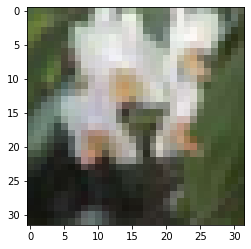

In [248]:
'''class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 12479)
plt.imshow(shuffled_data[i][0])
l = second_iteration.predict(shuffled_data[i:1 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
print(f'Second option: {class_names[second]}')
print(f'Second confidence: {l[0][second]}')
print(f'Index: {i}')'''

class_names = ['sea animals', 'flowers', 'food containers', 'fruit and vegetables', 'electronics', 'furniture', 'insects', \
               'land animals', 'invertebrates', 'people', 'reptiles', 'trees', 'vehicles']

from random import randint
i = randint(0, 649)
plt.imshow(shuffled_data[2600 + i][0])
l = second_iteration.predict(shuffled_data[2600 + i:2601 + i])
ind = [j for j in range(13) if l[0][j] == max(l[0])]
second = [j for j in range(13) if l[0][j]==sorted(l[0])[-2]][0]
print(f'Expected: {class_names[shuffled_y[2600 + i]]}')
print(f'Got: {class_names[ind[0]]}')
print(f'Confidence: {l[0][ind[0]]}')
if ind[0] != shuffled_y[2600 + i]: print(f'Confidence in the correct answer: {l[0][shuffled_y[2600 + i]]}')
print(f'Index: {i}')

## 4 December

EDA, round 4.

*Note: I know that today is supposed to be a "guiding deadline" to finish the product. But in light of the advanced nature of this project, I find it permissible to keep working on this until perhaps as late as next Wednesday night. The point is to get this thing to as high of a level as possible.*

What I find is that the model struggles to cast out irrelevant details and focus on the "main object". For instance, if one shows the model an image of an orange placed on a table, clearly the orange will be the main focus of the image. But the model instead predicts "furniture", which isn't *wrong* but is just missing the point. In other cases, an image of a table will be presented without anything else, so clearly the focus of the image is on the table and the model should predict "furniture".

So overall the model struggles with *focus*. Perhaps this is why overfitting is perceived and also why it can't be fixed with traditional methods such as regularization. Addressing the overfitting issue requires addressing far more fundamental problems with the data. No samples need to be removed; the model just needs to learn focus. And many of the images in the dataset are weird in this regard. You could show it a fishbowl with a fish inside it and it would say "food containers" instead of "sea animals".

As for how I would address this issue, regularizing the convolutions would be my immediate thought. But it hasn't worked regardless of how many times I try it. This is something that I intend to discuss tomorrow with Mr. Errea during our second meeting.

In [246]:
if True:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow import keras
    import tensorflow as tf

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["acc"]*100//0.1/10}% (train) vs. {logs["val_acc"]*100//0.1/10}% (validation)')

    for val in [0]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=32, strides=1, padding='same', kernel_initializer='random_uniform', bias_initializer='zeros', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        second_iteration.add(layers.Dropout(0.1))
        second_iteration.add(layers.Dense(units=200, input_dim=512, activation='relu', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.Dropout(0.2))
        second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))
        
        second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_initializer='random_uniform', bias_initializer='zeros', kernel_regularizer=regularizers.l2(val)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:2600], one_hot_encode(shuffled_y[:2600]), verbose=False)[1]*100//0.1/10
        valid_acc = second_iteration.evaluate(shuffled_data[2600:], one_hot_encode(shuffled_y[2600:]), verbose=False)[1]*100//0.1/10

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Epoch 1: 6.8% (train) vs. 11.8% (validation)
Epoch 2: 6.3% (train) vs. 7.6% (validation)
Epoch 3: 6.6% (train) vs. 7.6% (validation)
Epoch 4: 6.9% (train) vs. 7.6% (validation)
Epoch 5: 7.2% (train) vs. 7.6% (validation)


KeyboardInterrupt: 

In [249]:
condensed_data = np.zeros((19500, 1, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((19500), dtype=np.uint8)

ptrs = [1500] * 13
training = 0
validation = 0

bluerept = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    
    if ptrs[val] == 0: continue
    blueback = False
    for k in range(30):
        for l in range(30):
            cells = []
            cells.append(classified_data_2[i][0][k][l])
            cells.append(classified_data_2[i][0][k+1][l])
            cells.append(classified_data_2[i][0][k+2][l])
            cells.append(classified_data_2[i][0][k][l+1])
            cells.append(classified_data_2[i][0][k+1][l+1])
            cells.append(classified_data_2[i][0][k+2][l+1])
            cells.append(classified_data_2[i][0][k][l+2])
            cells.append(classified_data_2[i][0][k+1][l+2])
            cells.append(classified_data_2[i][0][k+2][l+2])
            cnt = 0
            for cell in cells:
                if (int(cell[2]) / 10 >= int(cell[0]) + int(cell[1])):
                    cnt += 1
            if cnt == 9:
                blueback = True
                break
        if blueback: break
        
    if blueback and val == 10: continue
        
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 300:
        condensed_data[15600 + validation] = classified_data_2[i]
        condensed_y[15600 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((19500, 1, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((19500), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(15600)]
shuffled_valid = [*range(15600, 19500)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(15600):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(3900):
    shuffled_data[shuffled_valid[i]] = condensed_data[15600 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[15600 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

In [253]:
if True:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    
    
    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow.keras import initializers
    from tensorflow import keras
    import tensorflow as tf
    
    from math import sqrt

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["accuracy"]*100//0.1/10}% (train) vs. {logs["val_accuracy"]*100//0.1/10}% (validation)')

    for val in [0]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(1, 32, 32, 3)))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/3072))))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/16384))))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/16384))))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/4096))))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/4096))))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/4096))))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/1024))))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/1024))))
        second_iteration.add(layers.Conv3D(activation='relu', kernel_size=3, filters=16, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/1024))))
        second_iteration.add(layers.MaxPool3D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        
        second_iteration.add(layers.Dense(units=60, input_dim=256, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/256))))
        
        #second_iteration.add(layers.Dense(units=30, input_dim=60, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(0)))
        
        second_iteration.add(layers.Dense(units=13, input_dim=60, activation='softmax', use_bias=True, kernel_regularizer=regularizers.l2(0), kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=sqrt(2/60))))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = []

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=75, validation_split=0.2, shuffle=False, verbose=True, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:15600], one_hot_encode(shuffled_y[:15600]), verbose=False)[1]*100//0.1/10
        valid_acc = second_iteration.evaluate(shuffled_data[15600:], one_hot_encode(shuffled_y[15600:]), verbose=False)[1]*100//0.1/10

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0 regularization
Train on 15600 samples, validate on 3900 samples
Epoch 1/75
15600/15600 [==============================] - 244s 16ms/step - loss: 2.4602 - acc: 0.1291 - val_loss: 2.3589 - val_acc: 0.1836
Epoch 2/75
15600/15600 [==============================] - 177s 11ms/step - loss: 2.2655 - acc: 0.2295 - val_loss: 2.2794 - val_acc: 0.2238
Epoch 3/75
12704/15600 [=======================>......] - ETA: 30s - loss: 2.1699 - acc: 0.2658

KeyboardInterrupt: 

In [254]:
condensed_data = np.zeros((19500, 32, 32, 3), dtype=np.uint8)
condensed_y = np.zeros((19500), dtype=np.uint8)

ptrs = [1500] * 13
training = 0
validation = 0

bluerept = 0

for i in range(37500):
    if max(ptrs) == 0: break
    val = int(y_data[i])
    if val in [7, 8, 9]: val = 7
    elif val in [10, 11, 12, 13, 14]: val -= 2
    
    if ptrs[val] == 0: continue
    blueback = False
    for k in range(30):
        for l in range(30):
            cells = []
            cells.append(classified_data_2[i][0][k][l])
            cells.append(classified_data_2[i][0][k+1][l])
            cells.append(classified_data_2[i][0][k+2][l])
            cells.append(classified_data_2[i][0][k][l+1])
            cells.append(classified_data_2[i][0][k+1][l+1])
            cells.append(classified_data_2[i][0][k+2][l+1])
            cells.append(classified_data_2[i][0][k][l+2])
            cells.append(classified_data_2[i][0][k+1][l+2])
            cells.append(classified_data_2[i][0][k+2][l+2])
            cnt = 0
            for cell in cells:
                if (int(cell[2]) / 10 >= int(cell[0]) + int(cell[1])):
                    cnt += 1
            if cnt == 9:
                blueback = True
                break
        if blueback: break
        
    if blueback and val == 10: continue
        
    is_grayscale = True
    for j in range(32):
        for k in range(32):
            one = classified_data_2[i][0][j][k][0]
            two = classified_data_2[i][0][j][k][1]
            three = classified_data_2[i][0][j][k][2]
            if max(one, two, three) != min(one, two, three):
                is_grayscale = False
                break
        if not is_grayscale:
            break
    if is_grayscale: continue
    
    found = False
    for k in range(31):
        for l in range(31):
            if min(classified_data_2[i][0][k][l][0],classified_data_2[i][0][k][l][1],classified_data_2[i][0][k][l][2],\
                    classified_data_2[i][0][k+1][l][0],classified_data_2[i][0][k+1][l][1],classified_data_2[i][0][k+1][l][2],\
                    classified_data_2[i][0][k][l+1][0],classified_data_2[i][0][k][l+1][1],classified_data_2[i][0][k][l+1][2],\
                    classified_data_2[i][0][k+1][l+1][0],classified_data_2[i][0][k+1][l+1][1],classified_data_2[i][0][k+1][l+1][2])==255:
                found = True
                break
        if found: break
    if found: continue
    
    if (training + validation) % 100 == 0: print(training + validation, end=" ")
    
    
    if ptrs[val] <= 300:
        condensed_data[15600 + validation] = classified_data_2[i][0]
        condensed_y[15600 + validation] = val
        validation += 1
    else:
        condensed_data[training] = classified_data_2[i][0]
        condensed_y[training] = val
        training += 1
    ptrs[val] -= 1
    
shuffled_data = np.zeros((19500, 32, 32, 3), dtype=np.uint8)
shuffled_y = np.zeros((19500), dtype=np.uint8)

from random import shuffle
shuffled_train = [*range(15600)]
shuffled_valid = [*range(15600, 19500)]

shuffle(shuffled_train)
shuffle(shuffled_valid)

for i in range(15600):
    shuffled_data[shuffled_train[i]] = condensed_data[i]
    shuffled_y[shuffled_train[i]] = condensed_y[i]


for i in range(3900):
    shuffled_data[shuffled_valid[i]] = condensed_data[15600 + i]
    shuffled_y[shuffled_valid[i]] = condensed_y[15600 + i]

0 100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200 4300 4400 4500 4600 4700 4800 4900 5000 5100 5200 5300 5400 5500 5600 5700 5800 5900 6000 6100 6200 6300 6400 6500 6600 6700 6800 6900 7000 7100 7200 7300 7400 7500 7600 7700 7800 7900 8000 8100 8200 8300 8400 8500 8600 8700 8800 8900 9000 9100 9200 9300 9400 9500 9600 9700 9800 9900 10000 10100 10200 10300 10400 10500 10600 10700 10800 10900 11000 11100 11200 11300 11400 11500 11600 11700 11800 11900 12000 12100 12200 12300 12400 12500 12600 12700 12800 12900 13000 13100 13200 13300 13400 13500 13600 13700 13800 13900 14000 14100 14200 14300 14400 14500 14600 14700 14800 14900 15000 15100 15200 15300 15400 15500 15600 15700 15800 15900 16000 16100 16200 16300 16400 16500 16600 16700 16800 16900 17000 17100 17200 17300 17400 17500 17600 17700 17800 17900 18000 18100 18200 18300 18400 18

In [255]:
if True:
    def one_hot_encode(arr):
        res=np.zeros((arr.size, 13), dtype=np.uint8)
        for i in range(arr.size):
            res[i][int(arr[i])]=1
        return res

    
    
    from tensorflow.keras import regularizers
    from tensorflow.keras import losses
    from tensorflow.keras import callbacks
    from tensorflow.keras import models, layers
    from tensorflow.keras import initializers
    from tensorflow import keras
    import tensorflow as tf
    
    from math import sqrt

    def scaled_loss(y_true, y_pred):
        cce = losses.categorical_crossentropy(y_true, y_pred)
        chosen = tf.math.argmax(y_true)
        if str(chosen.shape[0]) != '?' and (int(chosen.eval()[0]), int(y_pred.eval()[0])) in ((2, 3), (3, 2), (4, 5), (5, 4), (6, 8), (6, 11), (0, 10), (2, 4), (2, 5), (4, 2), (5, 2)):
            cce = tf.multiply(cce, 10000)
        return cce

    class MyCallback(callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            print(f'Epoch {epoch + 1}: {logs["accuracy"]*100//0.1/10}% (train) vs. {logs["val_accuracy"]*100//0.1/10}% (validation)')

    for val in [5e-4]:
        print(f'Going {val} regularization')
        second_iteration = models.Sequential()

        second_iteration.add(layers.InputLayer(input_shape=(32, 32, 3)))
        second_iteration.add(layers.RandomCrop(25, 25))
        second_iteration.add(layers.RandomZoom((0, 0.4)))
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Conv2D(activation='relu', kernel_size=3, filters=64, strides=1, padding='same', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.MaxPool2D(pool_size=2, strides=2, padding='same'))
        second_iteration.add(layers.Flatten())
        second_iteration.add(layers.BatchNormalization())
        #second_iteration.add(layers.Dropout(0.05))
        second_iteration.add(layers.Dense(units=200, input_dim=1024, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Dropout(0.2))
        second_iteration.add(layers.Dense(units=100, input_dim=200, activation='relu', use_bias=True, kernel_regularizer=regularizers.l2(val)))
        second_iteration.add(layers.BatchNormalization())
        second_iteration.add(layers.Dropout(0.2))
        second_iteration.add(layers.Dense(units=13, input_dim=100, activation='softmax', use_bias=True, kernel_regularizer=regularizers.l2(val)))

        opt = keras.optimizers.Adam()

        second_iteration.compile(opt, 'categorical_crossentropy', ['accuracy'])

        cb = [MyCallback()]

        second_iteration.fit(shuffled_data, one_hot_encode(shuffled_y), batch_size=32, epochs=5000, validation_split=0.2, shuffle=False, verbose=False, callbacks=cb)

        tr_acc = second_iteration.evaluate(shuffled_data[:15600], one_hot_encode(shuffled_y[:15600]), verbose=False)[1]*100//0.1/10
        valid_acc = second_iteration.evaluate(shuffled_data[15600:], one_hot_encode(shuffled_y[15600:]), verbose=False)[1]*100//0.1/10

        print(f'End: {tr_acc}% (train) vs. {valid_acc}% (validation)')

Going 0.0005 regularization


AttributeError: module 'tensorflow._api.v1.keras.layers' has no attribute 'RandomCrop'

In [256]:
dir(layers)

['Activation',
 'ActivityRegularization',
 'Add',
 'AlphaDropout',
 'Average',
 'AveragePooling1D',
 'AveragePooling2D',
 'AveragePooling3D',
 'AvgPool1D',
 'AvgPool2D',
 'AvgPool3D',
 'BatchNormalization',
 'Bidirectional',
 'Concatenate',
 'Conv1D',
 'Conv2D',
 'Conv2DTranspose',
 'Conv3D',
 'Conv3DTranspose',
 'ConvLSTM2D',
 'Convolution1D',
 'Convolution2D',
 'Convolution2DTranspose',
 'Convolution3D',
 'Convolution3DTranspose',
 'Cropping1D',
 'Cropping2D',
 'Cropping3D',
 'CuDNNGRU',
 'CuDNNLSTM',
 'Dense',
 'DepthwiseConv2D',
 'Dot',
 'Dropout',
 'ELU',
 'Embedding',
 'Flatten',
 'GRU',
 'GRUCell',
 'GaussianDropout',
 'GaussianNoise',
 'GlobalAveragePooling1D',
 'GlobalAveragePooling2D',
 'GlobalAveragePooling3D',
 'GlobalAvgPool1D',
 'GlobalAvgPool2D',
 'GlobalAvgPool3D',
 'GlobalMaxPool1D',
 'GlobalMaxPool2D',
 'GlobalMaxPool3D',
 'GlobalMaxPooling1D',
 'GlobalMaxPooling2D',
 'GlobalMaxPooling3D',
 'Input',
 'InputLayer',
 'InputSpec',
 'LSTM',
 'LSTMCell',
 'Lambda',
 'Layer